In [1]:
# importing tools 
import s3fs
import xarray as xr
import numpy as np 
import matplotlib.pyplot as plt 
import math
from matplotlib.patches import Ellipse
#for removing warnings
import warnings

In [2]:
# open the data with s3fs from the databucket 
fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
data_path1 = 's3://data/CREG12.L75-REF08_mesh_zgr.zarr'
data_path2 = 's3://data/vel_dataIII.zarr/vel_dataIII.zarr'
data_path3 = 's3://data/lat_lon_scalar.zarr'

remote_files1 = fsg.glob(data_path1)
remote_files2 = fsg.glob(data_path2)
remote_files3 = fsg.glob(data_path3)

store1 = s3fs.S3Map(root=data_path1, s3=fsg, check=False)
store2 = s3fs.S3Map(root=data_path2, s3=fsg, check=False)
store3 = s3fs.S3Map(root=data_path3, s3=fsg, check=False)

dzz = xr.open_zarr(store=store1, consolidated=True)
dv = xr.open_zarr(store=store2, consolidated=True)
dl = xr.open_zarr(store=store3, consolidated=True)

In [3]:
bathym = dzz.mbathy.isel(x=slice(200,1400),y=slice(650,1800)).squeeze(axis=0)

In [4]:
def open_s3fs(path):
    # open the data with s3fs from the databucket 
    fsg = s3fs.S3FileSystem(anon=False,
      client_kwargs={
         'endpoint_url': 'https://karen.uiogeo-apps.sigma2.no'
      })
    data_path = f's3://data/{path}'
    remote_files = fsg.glob(data_path)
    fileset = [fsg.open(file) for file in remote_files]
    #open the dataset 
    dset = xr.open_mfdataset(fileset, 
                             #combine='by_coords',
                             compat='override')
    return dset

In [5]:
d15 = open_s3fs('mooring_barents/A-TWAIN_2015-2017_AT200-3_22-118m_ACDP_16640.nc')
d13 = open_s3fs('mooring_barents/A-TWAIN_2013-2015_AT200-2_14-121m_ACDP_16640.nc')
d17 = open_s3fs('mooring_barents/A-TWAIN_2017-2019_AT200-4_20-167m_ACDP_16640.nc')

y1 = open_s3fs('mooring_yermark/Y1.nc')
y2 = open_s3fs('mooring_yermark/Y2.nc')
y3 = open_s3fs('mooring_yermark/Y3.nc')

MB = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MB.nc')
MW = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MW.nc')
MN = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MN.nc')
MS = open_s3fs('mooring_lofoten/PROVOLO_Mooring_MS.nc')

ANO18 = open_s3fs('moorings_/AON_Sig_ADCP_BS3_2016_2018.nc')
ANO16 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2014_2016.nc')
ANO14 = open_s3fs('moorings_/AON_LR_ADCP_BS3_2013_2014.nc')
ANO12 = open_s3fs('moorings_/AON_WH_ADCP_BS3_2012_2013.nc')

In [6]:
scalar = open_s3fs('CREG12.L75-REF08_mesh_hgr.nc')

In [7]:
p_list = [(31.13247,81.24202),
          (31.13533,81.24255),
          (31.14506,81.24587)
          ,(011.1189, 69.5289),
          (013.16845,68.58759),
          (013.19866,68.56109),
          (012.45082,68.50128),
          (5.57541,79.37209),
          (5.48733,80.03876),
          (5.56333,79.44093)]
moor_l = [(836, 440),
            (838, 440),
            (836, 439),
            (915, 157),
            (935, 143),
            (938, 144),
            (934, 141),
            (774, 344),
            (766, 358),
            (773, 346),
            (334, 978),
            (334, 978),
            (334, 978),
            (334, 978)]
c_list = ['c', 'orangered', 'g', 'r', 'm', 'y','tab:orange', 'tab:pink', 'limegreen', 'maroon', 'dodgerblue', 'gold', 'peru','deeppink']

In [8]:
# Barents sea
u13 = d13.UCUR.fillna(0).squeeze(axis=0)
v13 = d13.VCUR.fillna(0).squeeze(axis=0)
u15 = d15.UCUR.fillna(0).squeeze(axis=0)
v15 = d15.VCUR.fillna(0).squeeze(axis=0)
u17 = d17.UCUR.fillna(0).squeeze(axis=0)
v17 = d17.VCUR.fillna(0).squeeze(axis=0)

# Lofoten
ub = MB.u.isel(DEPTH=slice(19,-1)).fillna(0)
vb = MB.v.isel(DEPTH=slice(19,-1)).fillna(0)
uw = MW.u.isel(DEPTH=slice(12,-1), TIME=slice(1,-1)).fillna(0)
vw = MW.v.isel(DEPTH=slice(12,-1), TIME=slice(1,-1)).fillna(0)
un = MN.u.isel(DEPTH=slice(7,-1)).fillna(0)
vn = MN.v.isel(DEPTH=slice(7,-1)).fillna(0)
us = MS.u.isel(DEPTH=slice(8,-1)).fillna(0)
vs = MS.v.isel(DEPTH=slice(8,-1)).fillna(0)

# Yermark
u1 = y1.u.isel(DEPTH=slice(11,255), TIME=slice(1,-1)).fillna(0)
v1 = y1.v.isel(DEPTH=slice(11,255), TIME=slice(1,-1)).fillna(0)
u2 = y2.u.isel(DEPTH=slice(4,150), TIME=slice(1,-1)).fillna(0)
v2 = y2.v.isel(DEPTH=slice(4,150), TIME=slice(1,-1)).fillna(0)
u3 = y3.u.isel(DEPTH=slice(11,220), TIME=slice(1,-1)).fillna(0)
v3 = y3.v.isel(DEPTH=slice(11,220), TIME=slice(1,-1)).fillna(0)

# Beaufort
'sliter med å finne ut hvordan få gode oversiktlige'
u12 = ANO12.UCUR.isel(BINDEPTH=slice(0,5)).fillna(0) #.isel(TIME=slice(),BINDEPTH=slice())
v12 = ANO12.VCUR.isel(BINDEPTH=slice(0,5)).fillna(0)
u14 = ANO14.UCUR.isel(TIME=slice(167,-1),BINDEPTH=slice(0,11)).fillna(0)
v14 = ANO14.VCUR.isel(TIME=slice(167,-1),BINDEPTH=slice(0,11)).fillna(0)
u16 = ANO16.UCUR.isel(BINDEPTH=slice(1,11)).fillna(0)
v16 = ANO16.VCUR.isel(BINDEPTH=slice(1,11)).fillna(0)
u18 = ANO18.UCUR.interpolate_na(dim='BINDEPTH', method='nearest', use_coordinate=False)
v18 = ANO18.VCUR.interpolate_na(dim='BINDEPTH', method='nearest', use_coordinate=False)
u18 = u18.isel(BINDEPTH=slice(1,-1)).fillna(0)
v18 = v18.isel(BINDEPTH=slice(1,-1)).fillna(0)

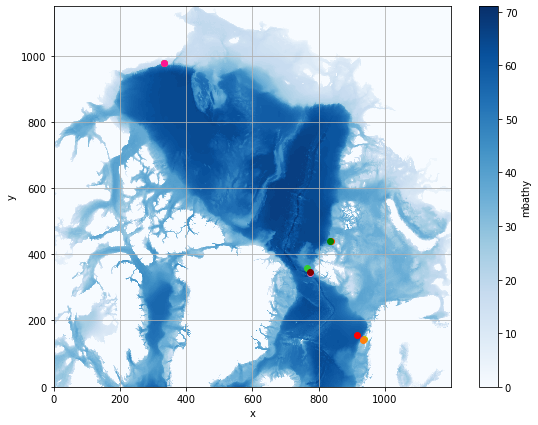

In [9]:
fig, ax = plt.subplots(figsize=(10,7))
bathym.plot(cmap=plt.get_cmap('Blues'))
for i,p in enumerate(moor_l):
    ax.plot(p[0], p[1], marker='o', color=c_list[i])
ax.grid('on')
ax.set_aspect('equal')

In [10]:
vel_l = [(u13,v13),(u15,v15),(u17,v17), 
         (ub,vb),(uw,vw),(un,vn),(us,vs),
         (u1,v1),(u2,v2),(u3,v3),
         (u12,v12),(u14,v14),(u16,v16),(u18,v18)]

# Horizontal ellipses

- Not satisfied yet... something is off.. The major and minor axis are off approximate the same size, should not be. 
- Somthing off with code or is this just how the data is?

In [11]:
def ellipser_nDEPTH(u,v,depth):
    
    s = 1
    
    covm = np.cov(np.vstack([u.isel(nDEPTH=depth).values,v.isel(nDEPTH=depth).values]))
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta

In [12]:
def ellipser_DEPTH(u,v,depth):
    
    s = 1e2
        
    covm = np.cov(np.vstack([u.isel(DEPTH=depth).values,v.isel(DEPTH=depth).values]))
    
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    #theta = np.arctan(vy/vx)#*(180/math.pi)
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta

In [13]:
def ellipser_BINDEPTH(u,v,depth):
    
    s=100
    
    covm = np.cov(np.vstack([u.isel(BINDEPTH=depth).values,v.isel(BINDEPTH=depth).values]))
    print(covm)
    values_, vectors_ = np.linalg.eig(covm)
    order = values_.argsort()[::-1]
    values, vectors = values_[order], vectors_[:, order]
    print('vec: ',vectors, 'val: ', values)
    
    # ellipser :
    major = np.sqrt(values[0])*s
    minor = np.sqrt(np.abs(values[1]))*s

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = vectors[:,0][0], vectors[:,0][1]
    theta = np.arctan2(vy, vx)*(180/math.pi)
   
    return major, minor, theta

## Moorings in Lofoten basin

3
[[ 0.02308351 -0.00068332]
 [-0.00068332  0.02477874]]
vec:  [[ 0.33277508 -0.94300623]
 [-0.94300623 -0.33277508]] val:  [0.02501988 0.02284238]
Ellipse(xy=(915, 157), width=31.63534496790766, height=30.227391038467754, angle=-70.56270170898463)
4
[[0.01703917 0.01291594]
 [0.01291594 0.02406148]]
vec:  [[-0.60731941 -0.79445776]
 [-0.79445776  0.60731941]] val:  [0.03393501 0.00716563]
Ellipse(xy=(935, 143), width=36.84291370105705, height=16.930013412181687, angle=-127.39593026995456)
5
[[0.02359162 0.01682614]
 [0.01682614 0.0204226 ]]
vec:  [[ 0.7395116  -0.67314382]
 [ 0.67314382  0.7395116 ]] val:  [0.03890769 0.00510652]
Ellipse(xy=(938, 144), width=39.45006566008651, height=14.291990051707199, angle=42.31017219462407)
6
[[0.02184024 0.01269402]
 [0.01269402 0.01989545]]
vec:  [[ 0.73361388 -0.67956654]
 [ 0.67956654  0.73361388]] val:  [0.03359906 0.00813663]
Ellipse(xy=(934, 141), width=36.660091642141566, height=18.04065852187668, angle=42.80977987812182)


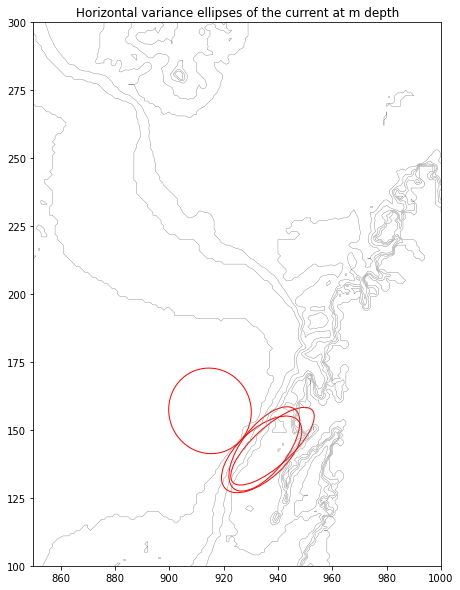

In [14]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at m depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [3,4,5,6]:
    print(i)
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 20

    #maj_, min_, theta_ = ellipser_nDEPTH(u,v,depth)
    maj_, min_, theta_ = ellipser_DEPTH(u,v,depth)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='r'
                     )
    print(ellipse)
    ax.add_patch(ellipse)

ax.set_xlim(850,1000)
ax.set_ylim(100,300)
ax.set_aspect('equal')
plt.show()

## Moorings Yermark

7
[[ 0.01687768 -0.00127147]
 [-0.00127147  0.01807876]]
vec:  [[ 0.5352206  -0.84471232]
 [-0.84471232 -0.5352206 ]] val:  [0.01888438 0.01607205]
Ellipse(xy=(774, 344), width=27.484090992859358, height=25.35511990959538, angle=-57.64112672587255)
8
[[0.01986385 0.00027458]
 [0.00027458 0.02084025]]
vec:  [[-0.25337845 -0.96736723]
 [-0.96736723  0.25337845]] val:  [0.02091217 0.01979193]
Ellipse(xy=(766, 358), width=28.922084461421388, height=28.136757612802814, angle=-104.67752185796834)
9
[[ 0.01839062 -0.00209411]
 [-0.00209411  0.01841912]]
vec:  [[ 0.70469639 -0.70950898]
 [-0.70950898 -0.70469639]] val:  [0.02049903 0.01631071]
Ellipse(xy=(773, 346), width=28.63496273268994, height=25.54268046795636, angle=-45.19497866633294)


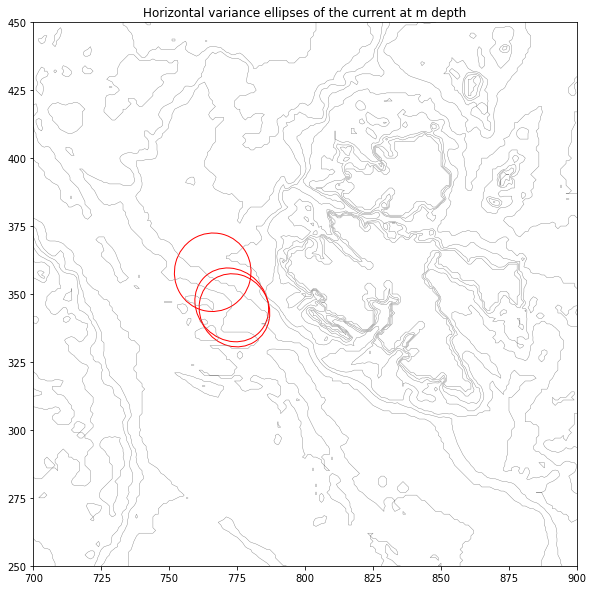

In [15]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at m depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [7,8,9]:
    print(i)
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 10

    #maj_, min_, theta_ = ellipser_nDEPTH(u,v,depth)
    maj_, min_, theta_ = ellipser_DEPTH(u,v,depth)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='r'
                     )
    print(ellipse)
    ax.add_patch(ellipse)

ax.set_xlim(700,900)
ax.set_ylim(250,450)
ax.set_aspect('equal')
plt.show()

## Moorings Barents sea

[[311.83192231 -49.76589442]
 [-49.76589442 419.74726343]]
vec:  [[ 0.36394846 -0.93141909]
 [-0.93141909 -0.36394846]] val:  [439.19309728 292.38608846]
Ellipse(xy=(836, 440), width=41.91386869642578, height=34.19860163580152, angle=-68.6571163209036)
[[266.74591146 -17.72404345]
 [-17.72404345 360.90256084]]
vec:  [[ 0.17906278 -0.98383765]
 [-0.98383765 -0.17906278]] val:  [364.12841462 263.52005767]
Ellipse(xy=(838, 440), width=38.164298218357075, height=32.46660177317772, angle=-79.68482612347175)
[[225.60016164 -41.1604994 ]
 [-41.1604994  268.52419078]]
vec:  [[ 0.51848559 -0.85508636]
 [-0.85508636 -0.51848559]] val:  [293.48205105 200.64230136]
Ellipse(xy=(836, 439), width=34.262635686905895, height=28.329652406259704, angle=-58.76927715201773)


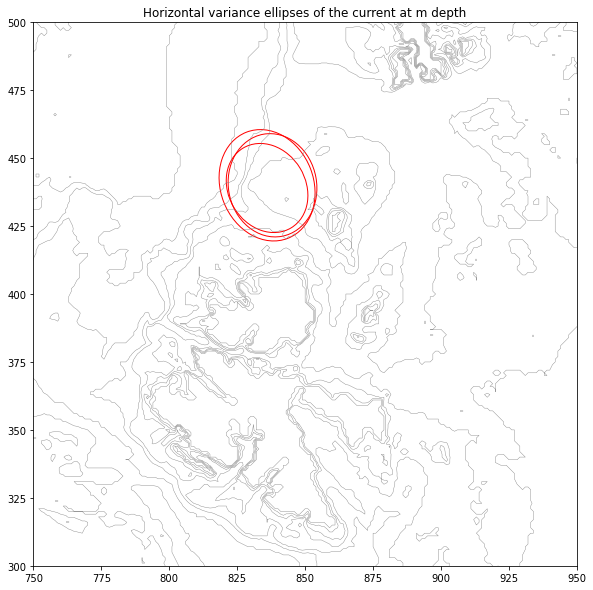

In [16]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at m depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [0,1,2]:
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 2
    
    maj_, min_, theta_ = ellipser_nDEPTH(u,v,depth)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='r'
                     )
    print(ellipse)
    ax.add_patch(ellipse)

ax.set_xlim(750,950)
ax.set_ylim(300,500)
ax.set_aspect('equal')
plt.show()

## Moorings Beaufort sea

[[ 0.03192181 -0.01010276]
 [-0.01010276  0.00737772]]
vec:  [[ 0.94128692  0.33760766]
 [-0.33760766  0.94128692]] val:  [0.03554533 0.0037542 ]
Ellipse(xy=(334, 978), width=37.7069372533912, height=12.25431146783514, angle=-19.731186576898754)
[[ 0.02942318 -0.02255391]
 [-0.02255391  0.022193  ]]
vec:  [[ 0.76100801  0.64874249]
 [-0.64874249  0.76100801]] val:  [0.04864989 0.00296629]
Ellipse(xy=(334, 978), width=44.1134401505896, height=10.892732030977825, angle=-40.44685780260725)
[[ 0.02924355 -0.02042314]
 [-0.02042314  0.01726024]]
vec:  [[ 0.80047202  0.59937012]
 [-0.59937012  0.80047202]] val:  [0.0445358  0.00196799]
Ellipse(xy=(334, 978), width=42.207013554573805, height=8.872401432243878, angle=-36.82479923024255)
[[ 0.03236038 -0.01516241]
 [-0.01516241  0.00932714]]
vec:  [[ 0.89578352  0.44449059]
 [-0.44449059  0.89578352]] val:  [0.03988401 0.00180351]
Ellipse(xy=(334, 978), width=39.941965099072505, height=8.493542278004956, angle=-26.39075132970168)


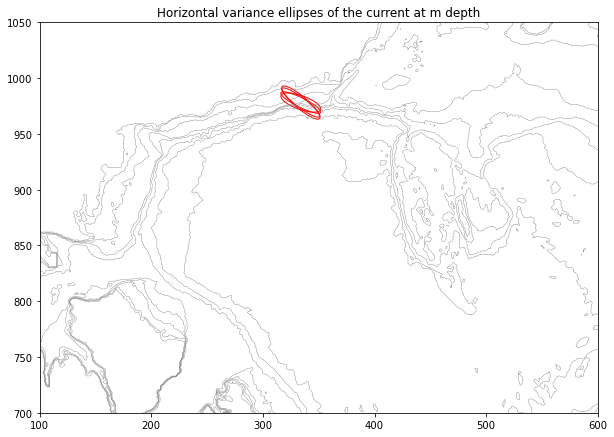

In [17]:
# Plot level 1
fig, ax = plt.subplots(1,1,figsize=(10,10))
plt.title(f'Horizontal variance ellipses of the current at m depth')
ax.contour(bathym, colors='grey',levels=8, linewidths=0.4)

for i in [10,11,12,13]:
    vel = vel_l[i]
    m = moor_l[i]
    u = vel[0]
    v = vel[1]
    y = m[0]
    x = m[1]
    depth = 2

    maj_, min_, theta_ = ellipser_BINDEPTH(u,v,depth)
    ellipse = Ellipse((y,x), 
            width = maj_*2, 
            height = min_*2,
            angle = theta_,
            facecolor = 'none',
            edgecolor='r'
                     )
    print(ellipse)
    ax.add_patch(ellipse)

ax.set_xlim(100,600)
ax.set_ylim(700,1050)
ax.set_aspect('equal')
plt.show()

# Vertical PC

In [18]:
def PCz(data):
    cov = np.cov(data.T, bias=True) # uten .T ble den en 73x73 matrise     
    values, vectors = np.linalg.eig(cov)
    order = values.argsort()[::-1]
    values, vectors = values[order], vectors[:, order]
    
    return  values, vectors

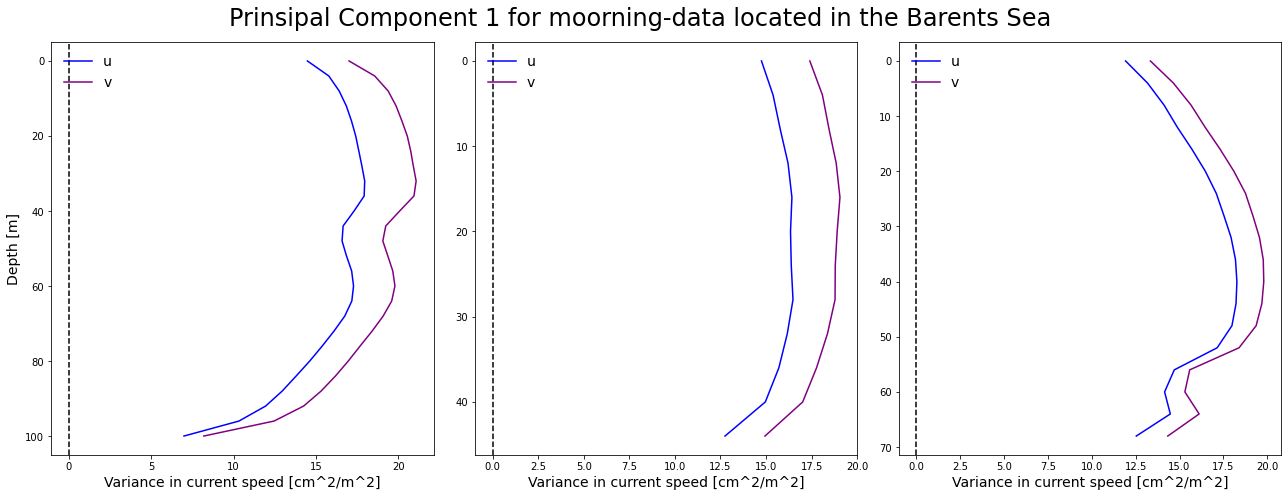

In [19]:
fig, axs = plt.subplots(1,3,figsize=(18,7))
yl = [(u13,v13),(u15,v15),(u17,v17)]
plt.suptitle('Prinsipal Component 1 for moorning-data located in the Barents Sea ', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, yl):
    U =y[0]
    V = y[1]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.nDEPTH*4, label= 'u', color='b')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.nDEPTH*4, label= 'v', color='purple')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Variance in current speed [cm^2/m^2]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

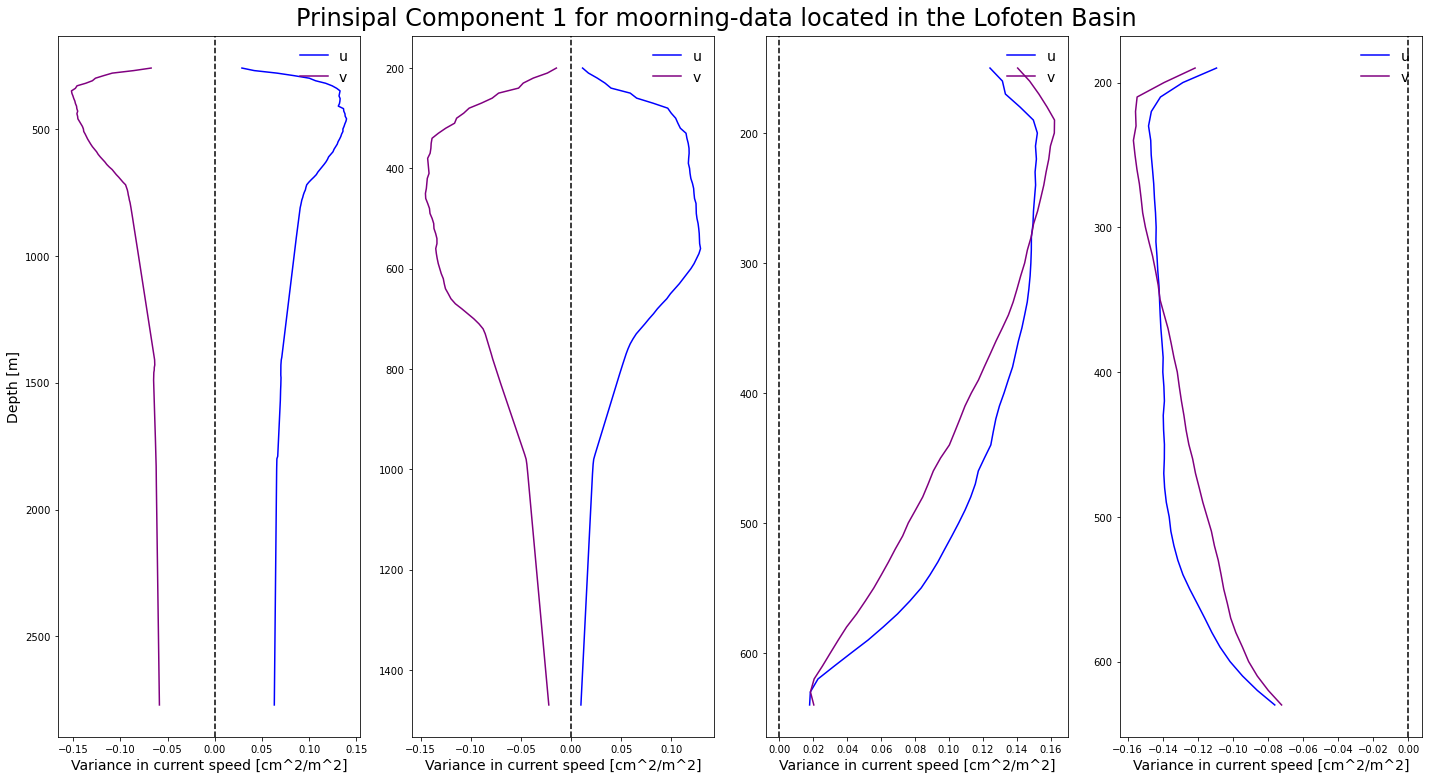

In [20]:
warnings.simplefilter("ignore")
fig, axs = plt.subplotsdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAABQgAAAHxCAYAAAAhslGsAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjMuNCwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy8QVMy6AAAACXBIWXMAAAsTAAALEwEAmpwYAADdkklEQVR4nOzdd5hU5fn/8fe9DXbpbWHpFkApClJUsKBYsGIUASv6M9GoMRpN05jERGM0UeM3sUQTe+8FbAiCJWJBKVIEFZDeO0vb3ef3xzkj47i77M7OzJkz83ld11yzOzNnnnvauWfu8xRzziEiIiIiIiIiIiLZKSfoAERERERERERERCQ4KhCKiIiIiIiIiIhkMRUIRUREREREREREspgKhCIiIiIiIiIiIllMBUIREREREREREZEspgKhiIiIiIiIiIhIFlOBUCRLmdkkM3NmdkHAcdzgx/FwkHFEM7OFfkyDg45FJBnMrI2Z/dfMFpvZLv/9PinouCR+mbrfSsccUVdmdoE+c4nhP4/OzDrXcru0/LyYWefIYwo6FhERyT55QQcgIpXzfwyNruSqzcB84G3g/5xzS1IZl9SMmeUBZwGnAP2BVkAusAaYBrwOPOWc2xBQiJIkZnYV0BR42Dm3MM77aAQchffe6eeft/Cv3t8592Ud4ssD3gH29y9aD+wE1sV7nyJh4heTLgA2OOfuDDSYEDOzG/w/71Qu2zO/GDkYmOaceznIWGrLP5j8UCVXOWAru7+X/sM5tzSFoQUuyM+BmfUDLgUOA9rjdf5ZCSwDPgYmAeOdc1tTGZeIhJcKhCLpbxe7f7gbXqHpQP/0YzM7xTn3QRz3uwiYC2xMSJTxW+PHsTzgOBLGzA4BHgf2ibp4G7AD7wtce+Bk4GYzu9Q593Tqo5QkugrohPfFfGGc9zEEeCkx4fzA8XjFwXXAIc65r5LUjqTWN8B2oDToQEKgM/BH4FvgzkAjCbc/+ucPAxuCCyMuQXxeBuM9Z48AL6ew3URbGfV3Lt7BqwP800/MbKhzbnIgkQUjkM+Bmf0J+D3ebwOACr/9tnjfQQ7F+z7yI8L9fhORFNIQY5H096Fzro1/ag00BM7H+xLQFHjOzApre6fOufOdc/s555JVhKhpHHf5cVwbZByJYmbHARPxioNLgcuAds65IudcU6ABcBJe8acpMDSYSCUEVuH1NP0TcHEC77eHfz5RxcHM4Zwb4u9LPwk6FpF0p89L/KK+k7ZxzrUC6gOn4+WsxsBjZmbV3onUiZmdBfwBrzj4LN5Ig3rOuRZAIdAL+DUwM7AgRSSU1INQJGScc6V4X74AHgXaAKcBTwUYlgBm1hZ4Eu/L8hRgqHNubfRt/NfvdeB1MzsKrzeXSKwx0UPQaju/1h5EDihsSeB9iohIFnLO7QRe8g9WP4F3gHR/YHaggWW2K/3z15xzI6OvcM6V4xUGZwJ/N7P6qQ5ORMJLPQhFwutZvOEEAH0jF0YvPmJmTc3sVjP70sxKzWxDZbeLvlMzG+xfvtD/f5CZjTWzNWa2zcymm9nPqjo6bGbFZvZ3M5tpZlvNbLu/EMKHZvZnM+sUc/sqJ6CPnnzczHqa2dNmtsK/zy/N7PdmVq+KOBqa2Zlm9oQfywY//q/N7H4z61KTJ7mWrsUbarMFGB5bHIzlnJvobxMbe46ZXWRm75rZOv/xLvDj3rey+6rkdTvezMb7228ws7fN7NCo2zcxs7+Y2Tz/eVnsv1cq7Y1al9ci6j6OMrMX/e12+ucvmdnR1WwT3W5HM/uPmS0xsx3+c3KbmTXeQ7s9zexB//bb/efjf2b2UzPLr+T235skvprHWxCz3Q3+NpH3+MSo+Gu1IIH/BT+hzOxhP74b/ItGx8TXOeb2fczscf+9scPfB7xlZmdU08Z3E/+bWTszu8fM5vvbT6thnN9bwMHMzvL3H5vMbLX/ntk/6vYlZvYvv+3t/mf8t2aWW00b9czsajP72Mw2+p+BuWZ2h5m12UN8rc3sdtu9X91oZp+Y2TVVfQYiz73/HqlnZr8zsxlmttm/vGm877uoNipddKGS5/MUM5vofw62mNlH5vVGqe4xtzezB8xsqR/LfDP7h5k1i73/eJhZNzN7ysxW+a/Fl2b2x6qez6jt9vaf9wn2/c/3R/7lP9ifmbePnOj/2ynmM/C9nGhmzc1stJm94Me02by8Ntt/r7SN9zHviZmdbmZv+u/5Hebt954ws4NqsO3xZva87d5XrvCfk+vNrEPMbWv9GG33viRiQcxz+HAl27Qys7+a2Rf++26rebn5L2bWvJrHkmNmV5j33WOb/3yMsah8Fo9kfl4qaauz/3xFhqLG7nurXGSltvuBqO0O87eLvAfWmved4CyzpPXumxH1d4NKYqr159XfLvY1Oce870dr/ctPi7l9rR67xfm9t7afAzMbZmavm9lK8xYHW2de3nnKzL5X5KuBXv752D3d0Dm3varr/Pf3K7b7e9kq//NV5cFrMzvY/yx/ZF5OiGz3ppkNr+XjEJF045zTSSed0vCEN5eJAyZVc5uV/m3uj7pskn/Zr/Dm2HF48+xswpuQPfZ2F8Tc52D/8oV4k7iXsXteExd1urOSeDrhTYwcuU0Z3jxnFVGX/TRmmxv8yx+u5P4i25yNV3RzeHMm7oi6bjLQsJJtfxYT76aY7bYAx1TxvC70bzO4Fq9XQVSM99ThdS8C3oqKc2fMc78NGFbJdtGv22X+c17uP1/R2x6GN4/lF1HPQ/TzMraKuOJ+Lfztb4q6XQXewhjR74u/7qHdYcDaqNdyV9R1nwL5VWz/M/95iH7dy6L+nwgUxWzTOer64/DmqHL+6xB9Xy/HbPdLYEXUbdb5/0dOL9bhfREd035x3sf/+XFEXr9tMfF1iLrtxTGPdX3M8/YYkFvNZ+diYDW7J7Dfgjcxf03ivMDfbhJwq//3Lv91j7S/FugKdAEWR70vomO8u4r7bwV8HnW77TH3HZmbsbJtB0S9DyNtbov6fxpQXMl2D/vX34I3cXzsZ7tpvO+7Pe23Yp7P3/t/l/PDffpVVdzvATGPeXNUbF8DV0fuP8735RH+eyRy/9H7lQ+Bm6k6R0yJ2q6y/cqnQKOYbT71X+PI87Ai5jQy6ra3xTxHG2PeY6uAA+J4zN+9JpVcl4M3R12kjTL/cbmomC+t4n4L8D6b0TFv4Pv7yxtitqn1Y2T3viRym9Uxz+H/xdz+sJj30I6o95DDmxO5WyWPJw9v7rTI7XZFPRe78Ia1Rq7rXMvXYCFJ+LxU0VYHqt/3frf/pY77Af8+bo2JdVPMtk8BOXG+Z101tzkr6vlqkYjPayWvyT+j2ljnn59Wl8dOnN97qcXnAPhLJXFF544VtXw9IvvMG2u7//G3z8ebKzv2sx/9/98q2a5hzG128v386YD74olJJ510So9T4AHopJNOlZ/YQ4EQb5hgRWwSZ3fhbzPel+6hkS9DwL6V3O6CmPuNfFHaivcl/l9Aa/+6plFfziqAHjHbPuhf9xVweFS79YCewI3RX+T8626g6h9/0T9wPgF6+ZcX+F/iIl+c769k27P8WA8FmviXGbBf1JeiVUCDSrZdSCU/HPbweg2KindoHV73f/v3sR24BG9OGfCKIROjXpuue3jd/gI09a/rjPdD2/nP4wvAl3g/2sx/Pi9i94/IExP8WoyK2v5fQEv/8hZR7ycHnFtNu+uBCUDPqPfU//OfJwdcVsm2w/zrtuD11Cz2L88HjvWfgx98meX7P9DWA8/g//jE6xXxW3Z/9ip7rmr9/qnB+yI6prgKhDX5zPnXD2T3D6rngPb+5Q2B66Ie+/XVPPbNeL1JBkZdt28N47sg6r22E28oVZF/Xa+o1+1FvGLbh8CB/vVFwO/YvY/qWcn9v+Ffvw44E7/QiTeH0wz/uhWR92nUds3YfQBkBtDfvzwXGM7uotPblbT5cNTzsh4YCRT413Xy35NJed9FPZ/r8X74Xs/ufUNr/zV2eD9Wm8dsWw9vESkHzAMG+ZfnACfgLS61nmpy1R5e62bsPtD1WdTrmI831+5Wdv9I/8H7FfiP//7YJ+r5rIe3enwk7h8UiokqCOwhvl8AfwX64B/88F/vvsCb/n3MBKyWjzvymvzgOfNf58j793r8ggnQDm/kgMP7fB5RybZ3+9eX4X3OI7k7D6+Y/kvg4kQ9xqj3a+dqHmunqPfIf4Bu/vvH8OZDjXweZxFz0IHdn+VyP/bIfmAvf7sNNYmhirgWkuDPSw3avKGq93LUbTpTt/3Alez+fnNpVOz18fZ3kX3YtXG+Z10l1+UDp+LtD6rLLfF+XiNtb/Yf+x+iHldjduf2uB47dfjeW5PPgf+aRnLqzUTlFqAYOAN4oJavx7vszpOH12Zbf/t/+NsvwPu+HPnsN8Q7wBcpFp4Vs10R8Bre97q27P6e3xTvgOxmf7szaxuTTjrplB6nwAPQSSedKj+x5wJhdA+5M6Iun8Tuo3o/+HFcye0uiLl8cNT9/qeKbSM/ov8Qc/ls//KRe3p8UdvcwJ4LhCup5Is4u780lgOdatGmAW/7246u5PqF1L5A+OOoeEvifM07RX2JvKSS64vweuw44NFqXreHKtm2I7t/VOykkmIN8IB//YOJei385/or/7qnqnjcT/rXL+SHR/Yj7c7EL5bGXP8v//p3Yi7PjXodf1RFu3vhFQ93Rb9mfP8H2jgq/2E8pprnqtbvnxq8N6JjSnaBcIJ//QdU3ksw0qNrM9C4ise+Hv8HVhzxXRD1WP9YyfWHR12/Dv9HYBWPIXYfFb3tDwr5eAWASKHvzzHX/T7qsbWpZNvjou776JjrHo667rgavMYJe9/FPJ+/q2S7+ng/qB1wfsx1F7K7GLJ3JdsezO79yqQ4XuvIc7qGmIKsf/25UbFX+n6t5r73xvtsb+WHvYQHU4MC4R7uvx5eUcsBR8b5Hp8Uc3kDdv8w/0Gvarz92vv+9e/FXNcj6rW4uDbxxPsYo16bztXcR+SA3P9VcX0BXs9bhzc1R2XPxQ17iK3aGKpoN+Gflxq0ecOe3svUYT+AV6TZ7L/vB1Rx/4f475N1+EW6Wr5nHd/vJbc66n23GO9AcKU9+vdw/9V9XqPbvrmK7eN+7NThe29NPgfACP/6ObV9Xqp5vo7h+z0j5+AdYL4I74B8lQct8A4WlOPlsh/s12NinlnLuM7zt5uYqMeqk046pfakOQhFQsQ8nc3sl8Df/Iu/xfuyGOsN51xdVy/7axWXv+Kf94y5fJN/XlLHdmP92zm3rpLLHwWW4PVG+FFN78w55/COgILX8y8RWkT9XVmsNXE63mNZAfw39krnLXASed1Pt6rnWPvB6+acW4RXqAN4zjn3dSXbTfDPY1/XaLV9LXoDkXkTb6riPv/kn3fCG8JZmTucczsqufxl/zw25sH+/S10VazU7ZxbAHyE17tmcBXt3uK/X2rabqj5c4Ed5f/7V1f5XIi34vXcbAicWMVdPeqcW1nHcHYCd1Ry+f/89gHudc5tqOQ2Vb2XI/MjTXHOvRm7kR/zv/1/R1Sx7X+dcysq2XYc3jD7yraNmOHfbk+S8b7bDtwZe6Hz5qd6q4r7Pd0/f945N7+SbT/GO9gUr8hz+h/n3JpKrn8CL8fVmh/vLLwDK73jiq76+9+Bd6AJEpdHjsPrEbWT3fv66DbL8QowAIfb9+fLPA/vgMyXzrn7ExFMXR+jP6fcmf6/lX2Wcd4CF8/7/x4bdVXkudiB19upsthuq21MtRDP5yXRarsfOANvv/yBq2J1ZufcR8B8vN67fSu7TQ20jjq1xHvfgfd6NWf3Qlg1VsPPazlVvI9I3GOv7ffemoh8N25iZkVxbP8DzrnxeAsURvaP++GNOvkv3hQyy82bD7xFJZufj/dd7eXK9uu+F/E+ez3MrDbf6SO/Rw6p5juqiKQxFQhF0t+Rtnvi+gq84QB/x/sCthxvyO7OSrabXMlltbGumi8OS/3zZjGXv+6f32pmd5u3KEWtvyhWYlJlFzrnKvB6UwD8YOJ28ybWv9XMPvMnwi6Pei4jPziSNsl8HCKP4f0qCjMA7/jnDfCGasXazu5CYKxV/nlVheNIQSf2dY02qbILq3ktIn+vds7NqmLbuex+T1U1Af+nVVxe1XtxoH/e1p98u9ITu3/0dqBytW037Prg/dhzeEOYfsA5txFvOChU/XrVdf8DXnF3cyXtV+D1OIPav5cj8U6spt3IZ6yrmTUA8BcEiPwwrMm2dX1ekvG+m+2c21rL++3jn39Qzf2+X811VfKf0x7+v1W91xzw3h7u51h/kv9vzFs0xkXt5w/0bxb3ft7M9jOzu8xbVGaTmVVE3f+Vdb3/GJH3zXTn3PoqbvMe3tDX6NuD1zsKdufhGkviY+yH10MQ4ONq9sO/8m8TvR+OPLZp/j6nMpW+bxIkns9LosWb9w7eQ97r6N+uqrxXLeecRZ/w3hun4k1rcxnwrpk1qmzbOn5ev67iQAIk5rHH8723Jj7GO3BcAkw2s4vNbK847ud7nHNj8A7AnoQ3H+JHeL29wSve/hKYbmb7xWwaea6GV/M8LcEbOg4xz5WZ5Zm3kN6bZrbcvIVgIq9hZL9Vn8z7fiSSFfKCDkBE9mgXu3ukObzhF/Pxjur/t5ofEavr2O4PfphHifTeiV0B9la8o7Kn4n1JvAwoM7NPgZfweolsiCOWpTW4rlX0hWZ2JN7qbg2jLt4YFXsh3tHuH6y0F6foFYub4xVvayvyGKp7vEsquX20lVX0OADv6DtUHVvk+h+s7Bultq9FTR4TeI+rHZU/Jqj6/Rh5PWPzWeSIdwHeF+U9qfSofmUFqph2q3uuwijy/G90zm2p5naR92FVr1dd9z9Q/Wco3vdybT5jhtc7ZiveZzpyULUm29bpeUnS+y6efXpL/7y612JZZRf6PzIrc6Vz7hm85zTSw6TS+/BV+Xyb2T+BK6IuiuTLXf7/zfEeU1z7eTMbhdc7OvK8VLB7ERXw8kuDeO+/Ent8fzrntpvZWrz9WvT7LLKfW1SbBpP8GKN7HtV2Pxx5bHG9NxIgns9LQsWxH4g834XUrBdfonqzLQfGmNkneHPE9sYrLH9v1EACPq/V7T8T8diT8po759ab2Xl4PaIPAO6D7/aR4/CGisdV7HbOleEdFHjdv88CvIWfrgROxvte9aSZ9Y36bhh5rhry/e/IVfnuuTKzhng9aAdGXb+N3UPNYfdnvQG7D+aJSEioB6FI+vvQOdfGP5U45/Z1zh3nnPt7NcVB2P0DOWWcczucc8PwFgb5G97RTBf1/zwzO7Cau4iH/eACs8jqbA2B8Xhflgqdc00jzyXeypuVbh+nOVF/1/Ux1qvmuqqKf+mguueyuseUDJH89lJsb4cqTjekOL50V9fXK+X7n1qqy+Ory7bp/rwkUusqTrXtVV7pfsXMTsArNpTjze22L948pS2i9vMfV3cf1TZq1gpvUYV8vIUi+gH1nXPNou4/0hM9UXkkIp73WDo+xsh+eH0N98OD42hDdos83/+o4fP9cCIb96doiEzd8L1pFhL0ea1u/xnoY98T59zrePNLXoy32NAyoA3ecN9JZpaoaQF2OufGO+dOwZtXGrye4L2jbhZ5rq6s4XM1KWrb3+MVB9cAo/HmGi5yzhX7r2G7qNsmer8oIimgAqGIJJxz7iPn3G+cc4fiDTE4C69XQysqmVuvBqob2hQ5Ehp9ZPlQoD3ekelhzrn3nTdvULSa9GaojU/xehqB14MyHpHH0Kma20QP9UhEL63aqu1rEfm7I9VrX8m2dREZYto9QfeXLSLPf6FfPKhKol+vVKnJZyzy2CKLZ4C3L4n0jqjJtmF7XqoSefzVzUFV6XU1+GG+jt0/+GuyX4kVmdvuv865Pznnvqmk93Rd9vMn4B1kmg2c7Zz7zDm3K+Y2ic4je3x/mll9ds95G/0+i/TYrO79GSvZj/G7of4x8yXWROSxVffeSKcpQtJBOuS9SA/WvWMuT/bnNR0ee7Wccxudc/9xzo10zrXDm2LhP/7VPzGzkxLc5ANRf3eN+rsuz1XkdbzCOfeoc25VzPWJ3ieKSIqpQCgiSeWc2+qcexrvqClA38i8XrVwZGUXmpnhrUoK8HnUVZEf6fOct7BHZY6pZQzVct48kA/7/55nZnsqiAHfPYaIyGM4uJqJrI/2z7cCc2sbZwLU9rWI/N3AzCpdgMTMurL7qPPnld0mDpG53rqZWY9qb5l4kUJSGI+eT2V3L9WjKruBmTVh9wTviXq9UiUS75Exn71okc/YPOfPQeZ/viPzHVb6vMRsG7bnpSpT/fPDqrnN4dVcVyX/OY3MS3pEZbfxX6NKr2P3fn5qZVeaWSd2L5AUqyaf0cj9z3DevJeVxXZ07OV1FHnfdDGzdlXc5gh2T6kQ/T77yD8/oRbt1fUxRvYVVT2PU9g9X+LpVdymKpHH1tvMGldxm0rzURpLdm6I5L0jrfLFKVIh8r6NLTTX5fNaE0E+9j19DirfyLnZzrmL2f3ZTfT7OXoOzei5yiPP1Sn+iJvaqPZ1JMHfrUUk9VQgFJGE8ec+qUpk4mRj96TlNXWpmTWt5PJz8XrUVeCtuBYRmdC8i9/bIjbO46j+R368/orXK6Yh8Lx5K8JWycyO4vsr5r2I91hasLugGn37InZP5v6iq3ohk2Sq7WsxDYismHxdFfd5g3++EKh09cE4TGB3T4Z/WDWr6ZlZoifSjqxY2DTB95t0zluhOrIIx2/MrLLvCb/Bm4B8C3EsiBCwyGqpPYBhsVeaWWvgp/6/z1ax7QVWyaqO/n7l0Cq2DavICuBnmFnn2CvNrD9125c+55//pIr95Si8YXmViezne1Vx/c1U/YP9u1VFq4ktcv89qygm/wTYp5rt4zEOL7Z8du/rv+Pvx37v//u++/5q2o/hFSr2M7NLatheXR9jtfs6582h94L/7/X+56tS/sIH0fOhveXffz12L5QSffsC4JpqYktHyc4Nz+EVherjLWZXpSTkPfzvBpGVqGMPktTl81oTQT72al/XPXw3ht3fj2s8tYCZHVPNQa6Is6P+nhb19yN439XaAtfuoZ3Y56rK19H//P5uDzGJSJpTgVBEEmmmmd1sZv0jX4jMMwD4l3+bT/cwd2Jl6gNvmllP/z7zzWw08G//+gecc9ETs/8PKMUrtD0a+TFvZoVm9v/wfrBELyqSEM65pcA5eJO798dbPe7S6GKCmRWZ2Qlm9gLeiqdtorb/FojMQ3OLv9JdPX+7rsBreEfYS4mZ/DuFavVa+EOIrvf/HWZm/4oc3TezFv6k5Wf5119fWS+WePjD5K7A+8F8LDDOzA6OfKH2f4z2NbNb8Bb9SaRIr6izKitQ15SZtYyc+P5qgE2jr6uiiFcXv8f78XAQ8LSZtffjaWhm1wG/9W93i3NuUxX3kZacc++ze46sB81seKR4bGZ98Qo0zfCGYP1fzOZ34S3WUYj3Gejnb5drZmcAT/u3G++ce4fM8CRegT/ymA+F7/brxwMvs/sHYzzuxltdvSXwlpkd4N9/vpmdizf8rqr7f9s/v8TM/l9UzuloZo/g7VeqyjVf4fVwauK/dpUZj7f/6An8M3JgxMwam9mv/NgTmkf8Hqs3+//+3Mx+Fyma+T0Kn8LrzVnB7v1qZNtZ+IsfAHeb2Q1mVuxvm2tmXfzLfhq1WV0fY2Rfd341B2F+y+4VXD80sx9F8prf1r5mdhXePL79oh5PKd7cxQB/NLOrzazQ36YzXvE6rlV4AxR5vg4zsy6JvnPn3Fp2F3wuNLNnI7kavOHpZnaYmd2N9z0pIfx82g8YAxT7F/8r5mZ1+bzuUVCP3benz8GlZvaWmZ0d832wqZ9TB/sXvVWLNp8GvjCzX5lZr8j3AP+z3t3M/g382r/tGOfcgsiGzrk5wJ3+v38ys7vN7Lsh4X6uP9bMHmP3QZyIyOt4h5l91xPfvINFE9i9sJWIhJVzTieddErDE95wVQdMquV2k/ztLojndnhfVBywsJptL6gsNmCDf7nDG1a0Fm9YQ+Sy1cABMdvc4F/3cCXtRLY7G+/IsPPb2BF13WSgYSXb/jzqNpHtdvl/T2V38egHzy9eTzYHDI7ztRuEV3SKbn9rzPMTeT7OiNm2CK9IEbnNTrwvzZH/t+PNqxjbZk1et2rfG9XdR11eC3/7m6JuV87u+ccil/21iu0i13eu4vrOkdtUcf2FMTFuw5tXrSz6tajNfdbguTo66r53AIv999TTtXwfuRqeKn1uqrnfG6jiMxd1m0uiXp8K//WKfs4eB3IT/dnx7+MC9rDv21M71d0H3lyoU2PeE5ui/l8HHFrF/Q7wr4/cdpO/feT/6UBxJds97F9/QzWPqa7vu0qfkxo+n1W+J/Amt4/eB23GO0jh8KY5uNr/+604X+8jo+4vsl/Z7v/9IV4v6x/EhtcTfXLUdmUxcf6eavZ5eL1oottc6J+GR93mjqjbRN4bkc/Bm+zer1X5WYrj/ZkbE1sZu+fAjOw/L6vifuvhLTYSHfN6due+H7wH6/IY8fav0Z+jb/3n8LaY2/XHW3E4cttdePvh7TFtHxmzXR5eETp6u/VRf58edV3nWr4GC0nC52UPbebjFdwj+9VVUe+79onYD/jXXx/1fnF4OTs25y6I8z3r8Oa7jD5Fv78qgD9Xsn3cn9eavCZ1eex7ej5r8Jmt9nMAXBV1vcPrfb8+5rL7avl6LI/ZPvKduyzm8g+A5lXsZ+6Jue0mP67o529izHZ74313jX68W/y/S4Hjoq6r1WdSJ510So+TehCKSCINw/sx9z+8Fdoa4hW4ZgC3AD2cczPiuN8PgYPxhu1Fij1zgT/gfbnfEruBc+6feD8eIr0J84AvgT/ircC2OY44asQ59z+gG94Kby/gfVkEr/fdEmAs3hDivZxzL8RsW4o3h9SPgff92Iv8+/gv0Ms590qyYq+BWr8WAM6564EhwCt4Pwwb4n2ZfRU4xjlX7TCXeDnnHsJ7Le7EO8pfhjescC3eUNpfUvUQxnjbfAf4EfAu3pfndngLB9R2kv7AOOfuw/tR/yTeD5GGeD253gbOdM6d64IZ4l5nzrnVeEOBr8GbI20X3o/Xr/DeJz2cc5Or2PYTvInd/wHMw/vBX+bfz6+Ag90PJ20PNefcNLyV2R/CKwbk++d34BVMI71+N8R5/+/irbL5DN4Pz3p4P65vwCu276hiu514811FegFX4L0WbwOnOOdu3EPTP8XLV3P9Njv5p++GuTrnrsbbV0/148jDG6p3FXASu+fXSxjnXLlzbjQwHO9g0QY/puV4PQgHOOfuqWLbHc65kXi5eAxeT9gGePvcj/CG//0nZpu4H6O/f/0J3tQQZXg9+joR04vIOfcpsB/e9AQf4uXfpnj7xynArUB//70QvV0ZcAbeAb8ZfhvleL3pj3TORU9nkfac17N9CN5w8KV4vZUj77u8ajatbTs34X1m78fbrxne+2A58AZwKV4ej1fsyuRleJ/Bx4BBzrk/VBJTXT+vNZKCx15Zm3v6HDzpX/8MXk/ZXez+TL+Kd9C3ptMCRHTD63V5P95w7k1432124D2/z+OtJH2486YOiY253Dl3GV6P5MfxvmMW4PUWX4TXQ3c0cFrMdvPx9vuP4xW4c/H2UU/gfYbH1fJxiEiaMedc0DGIiFTKzCI7qL2ccwuDjCXb6bUQkcr4w9DOBf7knLsh4HBEREREJE7qQSgiIiIitebPWxWZw+/t6m4rIiIiIulNBUIRERERqZSZDTNv8akeZpbvX1bPzIbhLbRUCHzkT60gIiIiIiGVsPkuRERERCTjtMJbHfRaoMLMNgCN2f0d8lu8IcYiIiIiEmLqQSgiIiIiVRkP/AVvBdIVeJPrl+JNjH8D0Ns5901g0YmIiIhIQmiREhERERERERERkSymHoQiIiIiIiIiIiJZTAVCERERERERERGRLKYCoYiIiIiIiIiISBZTgVBERERERERERCSLqUAoIiIiIiIiIiKSxVQgFBERERERERERyWIqEIqIiIiIiIiIiGQxFQhFRERERERERESymAqEIiIiIiIiIiIiWUwFQhERERERERERkSyWF3QAidSyZUvXuXPnoMMQEZEU+uyzz9Y451oFHUd1lJ9ERLJLGHITKD+JiGSb6vJTRhUIO3fuzJQpU4IOQ0REUsjMvg06hj1RfhIRyS5hyE2g/CQikm2qy08aYhxj8ODBDB48OOgwREREvkf5SURE0o1yk4hI5lCBUEREREREREREJIupQCgiIiIiIiIiIpLFVCAUERERERERERHJYioQioiIiIiIiIiIZLGMWsU4EUaMGBF0CCIiIj+g/CQiIulGuUlEJHOoQBjjsssuCzoEERGRH1B+EhGRdKPcJCKSOTTEOEZpaSmlpaVBhyEiIvI9yk8iIpJulJtERDKHehDGOPHEEwGYNGlSsIGIiIhEUX4SEZF0o9wkIpI51INQREREREREREQki6lAKCIiIiIiIiIiksVUIBQREREREREREcliKhCKiIiIiIiIiIhksbRfpMTMhgL/B+QC/3XO3ZLM9i644IJk3r2IiGSAVOcmUH4SEZE9028nERGJV1oXCM0sF7gbOBZYAnxqZq8652Ynq810S3KDBw+mZ8+e3HXXXd9ddsEFF7BmzRrGjh0bYGQiItkpiNwEyk8iIlI9/XbyKD+JiMQn3YcYDwC+ds7Nd87tBJ4GhiWzwTVr1rBmzZpkNiEiSVBeHnQEe+YqXNAhSGKkPDeB8pOIZB/nlDdrSb+dREIoFb9jKsorkt+IhF5a9yAE2gGLo/5fAhycqDu/6iqYNu37l02btgSA3r1bJqqZ7+ndG+68Myl3LZK1PvwQfvITeOQR6Ncv6Giq9vav32bTkk0c+/djadKhSdDhSPySmptA+UlE6ubdd+GSS+Dtt6FDh6Cjqb2y7WU8Pexp9jl+Hw69+tCgwwmTlOenZOcm776VnyRzffMNnHwy3H8/HH54ctpY8M4C3rjiDc5+7Wyadm6anEYkI6R7D0Kr5LLvHUo0s4vNbIqZTVm9enWKwhKRdFJeDps2waGHwk03QVlZ0BFVrrB5IXNfmctd3e7ivZveo2x7mgYqe7LH3ATKTyISnHbtYO5ceO65oCOJT179PHZs3sHUB6eqF2HtKD+JhEyDBt75CSfABx8kp42CRgVsXr6Zhw5/iLXz1ianEckI6d6DcAkQfdyzPbAs+gbOufuB+wH69etXq28QlR2JGjz4KgAmTZpUm7tKmpycnB98Mdq1a1dA0Yikp8MPhxkz4LLL4Pe/h9dfh8ceg332CTqy7zv8usPpdU4v3v7l20z8/USmPjiV424/jv1O2w+zyr7TS5raY24C5ScRCc6++0LfvvDMM3D11UFHE58DRx/Iaz99jeWfL6dt37ZBhxMWKc9P6ZabQPlJwqVNG3jnHTjqKK9I+NZbMHBgYtto178doyeO5rFjH+OhIx7i/PHnU9yzOLGNSEZI9x6EnwJdzGwvMysARgGvBhxTSrVq1Yrly5d/77Lp06cHFI1I+mrWDJ56Cp54AmbP9oajPPggpFvHg6admnLmc2dy/jvnU9CggGdPf5bHj3uc1bN1BD9Esj43gfKTSLobORI++QTmzw86kvj0GNGD3Hq5TH9U+5VaUH5C+UnCp6QEJk6Etm1h6FCYPDnxbbQ5sA0XvHsBlmM8PPhhln++fM8bSdZJ6wKhc64M+BnwFjAHeNY5NyvYqFLr6KOP5o033uDVV19l7ty5XH311SxevHjPG4pkqbPP9noT9usHF10Ep58O6Th6Zq+j9uKSqZdwwr9OYNmUZdx7wL28+Ys32b5he9ChyR4oN3mUn0TS24gR3vmzzwYbR7wKmxXS7dRuzHxyJuU7Q7ASWRpQfvIoP0kYRYqEbdrA8cfDRx8lvo1W+7fiwvcupKBBAY8c/QiLJ+tzId9nmTSvR79+/dyUKVPqdB/PPPMMACNHjkxESHW2a9currrqqu/iuuyyy1i0aBFr1qxh7NixAUcnkr4qKuCOO+B3v/N6Fz70kNdtPx2Vrinlnevf4bP7P6OoZRFDbh5C7wt7k5Ob1sdw0oaZfeacS+PlaZSfRCQYhx4K27fD1KlBRxKfea/N46mTn2LkyyPZb9h+QYdTK2HITVD3/JRuuQmUnyTcli6FwYNh1SoYNw4OTugyQ56Nizby6JBH2bx8M2ePPZvOgzsnvhFJW9XlJxUIRSSjzZgB55wDM2d6cxT+/e9QVBR0VJVbPnU5b/78TRZ9sIiSviWc8M8T6DAwhMtPplgYfoQpP4lIEO68E37xC2/Bkq5dg46m9irKKrij3R10GNSBkS+mTwGqJsKQm0D5SSQdLVniFQlXr/ZWox8wIPFtbF6+mceOeYz189cz8uWR7Hv8volvRNJSdflJ3VNiLF68WF3QRTLIAQfAp596k7Tfcw8cdBCk6/fgkj4lXPDeBZz+5OlsWbGFBwc9yEvnv8TmZZuDDk3SgPKTiNTWmWeCmbdYSRjl5OXQ65xezBs7j9K1pUGHI5VQbhJJvPbtveHGLVvCccd5v2USrVFJI0ZPGk3L/Vry9KlP8+UrXya+EQkdFQhjnHfeeZx33nlBhyEiCVS/Ptx+O4wfD1u2eEOu/vIXKCsLOrIfMjN6ndWLn335Mw677jBmPTOLu7rdxQe3fkDZjjQMWFJG+UlEaqtdOzjssPAWCMFbzbhiVwUzn54ZdChSCeUmkeTo0MErEjZvDscem5wODg1aNeD8d86nTe82PHvGs8x8RvvZbKcCoYhkjSFD4IsvYPhwuP56OPLI9F3dsaBhAUP+MoTLZl/GXkP2YsJvJ3Bvz3uZ99q8oEMTEZEQGTkSZs3yTmHU5sA2tD6wNdMf0Sq0IpJdOnaESZN2Fwk/+yzxbRQ2K+S8t8+jw8AOvHj2i0x7eFriG5HQUIFQRLJKs2bw1FPwxBPej6UDD4QHH4R0nY61+T7NGfXyKM558xws13jq5Kd48qQnWTtvbdChiYhICAwfDjk54e9FuOzTZayeszroUEREUqpjR68nYdOmXpHw888T30a9xvU4981z2WvIXrxy4St8em8SxjRLKKhAKCJZ6eyzvQVM+vWDiy6CM86ANWuCjqpq+x6/L5fOuJTjbj+Ob9//lnt63sPbv36bHZt2BB2aiIiksdat4aij4Omn0/dg2J70OrsXlmvqRSgiWalTJ69I2KgRHHNMclamzy/K56xXz6LrKV15/bLX+fD2DxPfiKQ9FQhFJGt17AgTJngrG48dC716wRtvBB1V1XILcjn06kO54qsrOOC8A/jw7x9yV7e7mP7odFxFSH/1iYhI0o0cCV99BdOmBR1JfBq2bsi+Q/dlxmMzqCivCDocEZGU69zZG24cKRImY3+eVz+PEc+PoPuZ3Xn7l2/z7o3v4sJ6ZEniogJhjGuuuYZrrrkm6DBEJEVycuCXv/RWB2vRAk48ES6/HErTeLHEhq0bMuyBYfz44x/TpFMTXh79Mg8OepClny4NOjRJIuUnEYnX6adDXl74hxlvXraZBe8sCDoUiaLcJJI6e+3l9SRs0MCbW316EjpV5xbkcsaTZ3DAeQcw6Q+TmHDdBBUJs4hl0ovdr18/NyUZy/uISFbYvh2uuw7+8Q/o1s2bp7Bv36Cjqp6rcEx/bDrjfzOerau20vvC3gy5eQgNWzcMOrSUMbPPnHP9go6jOspPIhK0E06AL7/0FucyCzqa2ivbXsbtJbfT5aQunP746UGHs0dhyE2g/CQSRt98A4MHw7Zt8M47cMABiW/DVTheu+w1PrvvMwb8fABD7xyKhTF5yA9Ul5/UgzDG3LlzmTt3btBhiEgA6teHO+6A8eNhyxY45BB47LGgo6qe5Ri9R/fminlXMPCXA5nx2Azu6noXc8doP5ZplJ9EpC5GjoSFC70e82GUVz+PHqN6MOfFOZp/N40oN4mk3j77eD0J69f3ehJ+8UXi27Ac46R7T+Lgqw7mk39+wthLxmqKhyygAmGMSy65hEsuuSToMEQkQEOGeAuYDBoEP/2pN29TuqvXuB7H/u1YLv3iUpp3ac7zI55n0f8WBR2WJJDyk4jUxWmnQUFByIcZn38gZdvKmP387KBDEZ9yk0gw9t3XKxIWFMDRR8PMmYlvw8w4/o7jOfx3h/P5fz7n5dEvU1GmImEmU4FQRKQSzZt7Q4wLCuD886GsLOiIaqZlt5ac88Y5NO7QmKdOeYrVc1YHHZKIiKSBpk3h+OPh2WehIqS/79of0p7mXZprNWMREaBLF2/hkvx8r0g4a1bi2zAzjr7paI666Si+eOILnh/1POU7yxPfkKQFFQhFRKrQrh3ccw989BH87W9BR1NzDVo14Ny3ziW3IJfHj3+cTUs3BR2SiIikgVGjYMkS+PDDoCOJj5lx4OgD+fa9b1m/YH3Q4YiIBK5LF68nYV6eVyScnaQO1kf87giO/8fxzHlhDs+c/gxl20PSe0JqRQXCNHfffffRunVrymK6L5199tkMGzYsoKhEsseoUTBiBPzxjzB1atDR1FyzvZpxzhvnsH3Ddp444Qm2b9gedEiSQZSbRMLplFO8OatCPcz4vAMBmPHYjIAjkXSk/CTZqFs3r0iYk+MVCefMSU47h1x1CCf9+yS+eu0rnjz5SXZu3ZmchiQwKhCmuREjRrBhwwbGjx//3WVbt27llVde4dxzzw0wMpHsYOb1ImzVCs47z1vpOCxK+pQw8sWRrPlyDU+f9rSO9EnCKDeJhFOjRnDSSfD881Ae0hFiTTo2ofNRnZn+6HScc0GHI2lG+UmyVaRICHDUUd6q9cnQ75J+nPbIaSycuJAnhj6hRaMyjGVSYu3Xr5+bMmVKjW//5lVvsmLaiu9dtn69N1yhWbNmCY0tok3vNgy9c2ittvnRj35Ew4YNecxfTvXxxx/n8ssvZ+XKldSvXz8ZYYpIjDfegBNPhF/+Ev7+96CjqZ0vnvyCF895ke5ndmf408OxHAs6pIQys8+cc/2CjqM6mZiflJtEwum557ye8e+84/2IDKNpj0zjlQte4cL3L6TjYR2DDqdSYchNUPf8lOzcBMpPIrUxZw4MHuz1Jpw0ySscJsOs52bx4tkv0qZPG85981wKmxcmpyFJuOryk3oQxmjWrFlSE1w8zj33XF5++WVKS0sBeOKJJxg+fLgSnEgKnXACXHIJ3H47vPde0NHUTq+ze3Hsbccy+7nZvPmLN9XjIqTSLT8pN4mE00knQYMG4R5m3P2M7uQ3yGfaI9OCDiXrpVtuAuUnyW777+/1JCwv9w4CffttctrpcWYPRrw4gpXTV/LI0Y+wfWOIhllJlbK6B2Flpk2bBkDv3r3rHlCC7NixgzZt2nDPPfcwZMgQ2rVrx7hx4zgqrId9RUJqyxbo3dtLuDNmeEO1wuStq9/io398xDG3HsOgXw8KOpyECUMvjUzMT8pNIuF11lkwfjwsX+5NbB9GL49+mS9f/pJrVlxDfmF+0OH8QBhyE9Q9P6VbbgLlJxHwVjQeONArGL73HhQUJKedr9/6mqdOfop9h+7LqFdGZdxIpUykHoS1cNVVV3HVVVcFHcb31KtXj+HDh/PEE0/wzDPP0KZNG4488sigwxLJOg0bwiOPwKJF8ItfBB1N7R1323H0HNWT8b8Zz/THpgcdjtRSuuUn5SaR8Bo5Etas8YYZh9WBow9kx6YdzH1lbtChZLV0y02g/CQC0KMH/Pe/8PHHcN11yWtn3+P35fh/HM+8sfOY9KdJyWtIUiKkxwyzz7nnnssxxxzDggULOPvss8nJUW1XJAiDBsGvfw233ALDhnkrQoaF5RjDHh7G1lVbefX/vUqD4gbse/y+QYclIabcJBJOQ4dC48bw9NNw3HFBRxOfzoM707hDY6Y/Mp2eo3oGHY6kGeUnETjzTLj8cm+KpCOOgFNPTU47/S/vz/LPlvPen9+jpE8J+522X3IakqTTnjIkjjjiCNq1a8fs2bO1ApdIwP70JzjwQPjxj2H16qCjqZ28enmMfGkkrXq04tkznmXZlGVBhyQhptwkEk7163sHuV56CXbuDDqa+FiOccB5B/DNuG/YvGxz0OFImlF+EvHcfjscdBBccEHy5iM0M0669yTa9m/LS+e9xOo5IfuBJN9RgTAkzIyFCxfinKNXr15BhyOS1QoK4NFHYcMG+OlPIWxTudZrXI9z3jiHopZFPHnSk6z7Zl3QIUlIKTeJhNeoUV4eGzcu6Ejid+D5B+IqHDOemBF0KJJmlJ9EPPXqwbPPenOojxyZvINCefXzGPniSPKL8nnmtGe0aElIqUAoIhKHAw6AG2+EF1+Exx8POpraa1TSiHPfOpeK8goeP/5xtq7aGnRIIiKSQsccA82ahXs145bdWtL+kPZMf2Q6mbTwoohIIu2zDzzwgDcf4bXXJq+dxu0bc+bzZ7J+/npeOvclXIX2y2GjAmGMm2++mZtvvjnoMEQkBK65Bg47DH72M1i8OOhoaq9lt5acPfZsNi/bzJMnPcnOLSEdZ5YllJ9EJJEKCuD00+GVV2B7iDt6HHD+AayetZoVU1cEHUpWUm4SCYfhw73fLHfc4e33k6XT4Z04/k5/0ZIbJiWvIUkKFQhjDBw4kIEDBwYdhoiEQG6ut6pxRYU3H2EYtT+kPWc+eybLpy7nhbNfUA+MNKb8JCKJNnIkbN4Mb7wRdCTx6zmyJ7kFuUx7ZFrQoWQl5SaR8Ljttt3zES5cmLx2+l/Wn94X9ua9G99jzktzkteQJJwKhDE+/PBDPvzww6DDEJGQ2Htvb6jxuHHw/vtBRxOfrid35ZhbjmHemHl8M+6boMORKig/iUiiHXUUtGoV7mHGhc0L6XZqN2Y+OZPyneVBh5N1lJtEwiMyH2FFhTcPbbLmIzQzTrrnJNoNaMfL57/M6tlatCQsVCCMcd1113HdddcFHYaIhMjFF3s/sMI8wubgnx9M085NmXDtBM0XkqaUn0Qk0fLy4IwzYMwY2BriqWgPHH0gpWtK+eqNr4IOJesoN4mES6rmI8yrn8eIF0aQX5TP06c9zfYNIZ7LIouoQCgiUkdFRXD11fDmm/DZZ0FHE5/cglyOuvEoVkxdwaznZgUdjoiIpMjIkVBaCmPHBh1J/PY5fh8aFDdgxqNazVhEZE9SNR9hZNGSDQs28OK5L6oTQgioQCgikgCXXQZNmoS7F2HPs3pS3KuYiddPpHyXhmmJiGSDww+HNm3CPcw4Nz+Xnmf3ZO6YuZSuLQ06HBGRtJeq+Qg7Hd6Jof83lK9e+4qJf5yYvIYkIVQgFBFJgMaN4Yor4MUXYfbsoKOJT05uDkNuHsK6r9cx7aFpQYcjIiIpkJsLp5wCEyd681KFVfczulOxq4LFHy4OOhQRkbSXqvkIAfpd2o/e/68379/0PnNe1KIl6UwFQhGRBLnySm+48S23BB1J/Lqc1IUOAzvw7p/eZVfprqDDERGRFBgwADZsgK+/DjqS+LXp3QYMVkxdEXQoIiKhsM8+8OCDyZ+P0Mw46W5/0ZLRWrQknalAGOPOO+/kzjvvDDoMEQmhli3hpz+FJ5+E+fODjiY+ZsaQW4awedlmPrnrk6DDkSjKTyKSLAMGeOeffhpsHHVR0LCAFl1bsPzz5UGHklWUm0TC7YwzvFFQyZ6PMK9+HiNeHEF+Ay1aks5UIIzRu3dvevfuHXQYIhJS11zjDdf629+CjiR+nQ7vRJcTu/DBXz9g2/ptQYcjPuUnEUmW7t29HvCfhPy4UEmfEvUgTDHlJpHw+/vfoW/f5M9H2LhdY0a8MIINCzfw4jkvUlEe4nktMpQKhDHGjx/P+PHjgw5DREKqbVu48EJ46CFYtizoaOJ39M1Hs33Ddj78+4dBhyI+5ScRSZa8PG+y+rAXCNsc1IaNizZqoZIUUm4SCb/o+QhHjkzufIQdB3XkhH+ewFevf8WkP05KXkMSFxUIY9x0003cdNNNQYchIiH2619DeTncfnvQkcSvzYFt6HV2Lz668yM2L98cdDiC8pOIJNeAATB1KuwK8fSzJX1KAM1DmErKTSKZYe+9vfkIP/kEfvvb5LbV95K+9PlxH97/y/vMfiGkqztmKBUIRUQSbO+94ayz4N//hjVrgo4mfoP/PJiKXRW8d+N7QYciIiJJNmAA7NgBX3wRdCTxa9OnDQDLp2oeQhGR2orMR/iPfyR3PkIz48S7TqT9Ie15efTLrJq5KnmNSa2oQCgikgTXXgulpfDPfwYdSfya79Ocgy4+iM//8znrvl4XdDgiIpJE/ft752EeZlzUoogmHZuw4nP1IBQRiUeq5iPMq5fHiBdGUK9RPZ4+7WnNe54mVCAUEUmC7t3h9NPhX/+CTZuCjiZ+R1x/BLkFuUz8w8SgQxERkSTaay9o0SLcKxmD14tQPQhFROKTyvkIG7VtxIgXRrBx0UZePFuLlqQDFQhFRJLkuutgwwa4556gI4lfo5JGHHzVwcx8aiYrpqlHhohIpjLzhhmHuQchQMlBJaydt5adW5L4q1ZEJINFz0d47bXJbavDwA6c8K8T+PrNr7VoSRpQgTDGfffdx3333Rd0GCKSAfr2heOPhzvugO3bg44mfoN+NYj6zerzzvXvBB1KVlN+EpFkGzAAZs+GLVuCjiR+bfq0AQcrpuugViooN4lkpjPOgJ/+1JuP8PPPk9tWv0v60fuC3nzw1w9Y9tmy5DYm1VKBMEa3bt3o1q1b0GGISIb4xS9g9Wp4442gI4lf/ab1OfjKg/nqta9Yv2B90OFkLeUnEUm2/v29YWXJ/jGYTFrJOLWUm0Qy11//Cq1aweWXe7khmY7/x/E0KG7AmJ+MoaJMQ42DogJhjDFjxjBmzJigwxCRDDFkiJdYn3466Ejqps+FfcBg2kPTgg4layk/iUiyZcJCJY3aNaKoVRHLP9c8hKmg3CSSuZo2hb/9DT76CB5+OLlt1W9anxP+dQIrpq5g8j8mJ7cxqZIKhDFuv/12br/99qDDEJEMkZcHZ54JY8aEe8hWk45N2Oe4fZj20DRNIBwQ5ScRSbbiYujcOdwFQjOjpE+JehCmiHKTSGY77zwYNAh+8xtYn+SBRPufsT/dTu3GpD9OYv18jVoKggqEIiJJNmoUbNvmFQnDrM9Ffdi0ZBPz354fdCgiIpIk/ftnxkrGq2atomxHWdChiIiEWk4O3H03rFsHv/99ctsyM068+0Ry8nIY+9OxOOeS26D8gAqEIiJJNmgQtGsX/mHG3U7tRmGLQqY+MDXoUEREJEkGDICFC2HVqqAjiV/JQSVU7Kpg9azVQYciIhJ6Bx4Il10G994LU5P8M6Bx+8YM+esQ5r89nxmPz0huY/IDKhCKiCRZTg6MHOktVJLsrvnJlFcvjwPOO4AvX/mSrau3Bh2OiIgkwYAB3nmYexG26dMGgOVTNQ+hiEgi3HgjtGiRmgVL+v20H+0Pac9bv3hLvzlSTAVCEZEUGDUKdu2Cl18OOpK6Oeiig6jYVaEjeiIiGeqgg7wDW2EuEDbfpzkFjQq0UImISIJEFiyZPBkeeSS5beXk5nDKf05hx6YdjLtmXHIbk+9RgTDGY489xmOPPRZ0GCKSYfr1g733Dv8w4+KexbQb0I6pD0zVvCAppvwkIqnQsCF07x7yhUpyjDa922TsQiVm9qCZrTKzmVGXNTezt83sK/+8WSpiUW4SyR7nnw8DB6ZmwZLinsUM+s0gZjw2g2/GfZPcxuQ7KhDG6NChAx06dAg6DBHJMGZeL8IJE8I9rxN4i5WsnrWapZ8sDTqUrKL8JCKpMmCAVyAM83GgNn3asHL6SirKkzwWLhgPA0NjLvstMME51wWY4P+fdMpNItkjsmDJ2rXJX7AE4IjfHUGLbi0Y+9Ox7Ny6M/kNigqEsZ555hmeeeaZoMMQkQw0ahSUl8MLLwQdSd30HNWT/KJ8LVaSYspPIpIqAwZ4PwAXLgw6kviVHFTCrtJdrJ23NuhQEs459x6wLubiYUBk4N8jwGmpiEW5SSS79O6dugVL8urncfJ9J7NhwQYm3TApuY0JoALhD9x7773ce++9QYchIhmoZ09v2FbYhxnXa1yPHiN6MPPpmTqal0LKTyKSKv37e+dhHmZc0qcEIGOHGVeitXNuOYB/XlzVDc3sYjObYmZTVq+u20rPyk0i2SeVC5Z0PrIzfX7ch4/u+EjzyqaACoQiIikSGWb8/vuwZEnQ0dRNn4v6sHPzTmY/NzvoUEREJMF69YJ69cJdIGy5f0ty6+XqB2UlnHP3O+f6Oef6tWrVKuhwRCRkohcsefTR5Ld37N+OpahVEWN+MoaKsoycNiJtqEAoIpJCI0d6czo991zQkdRNh0EdaNGthYYZi4hkoPx8bzXjMK9knJufS+terbOpB+FKMysB8M9DPuOxiKSz88+HQw+FX/8aNmxIbluFzQo54V8nsPzz5Xz0fx8lt7EspwKhiEgKde3q/egK+zBjM6PP/+vDog8WsWbumqDDERGRBOvfHz77DMrKgo4kfm36tGH51OW4MK+2UnOvAqP9v0cDrwQYi4hkuFQvWNJ9eHe6ntKVSX+YxPoFSV5COYupQCgikmKjRnnDtubPDzqSujnw/AOxXGPqg+pFKCKSaQYMgNJSmB3imSRKDiph+/rtbPx2Y9ChJJSZPQVMBrqZ2RIzuwi4BTjWzL4CjvX/FxFJmj594NJL4Z57YNq05LZlZpx494lYjvHapa9ly4GflFOBMMbzzz/P888/H3QYIpLBTj/dO3/ttWDjqKuGbRrS5cQufPHEF1SUaz6QZFN+EpFUGjDAOw/zPIRt+rQBYPnUzJqH0Dl3lnOuxDmX75xr75x7wDm31jk3xDnXxT+PXeU4KZSbRLJbKhcsadKhCUfffDTfvPUNXzz5RXIby1IqEMZo2bIlLVu2DDoMEclg++wD++4Lb70VdCR11+ucXmxeuplv3/026FAynvKTiKTSvvt6E9GHeR7C1r1aYzmmhUqSSLlJJLs1awa33goffgiPPZb89vpf1p92B7fjraveonRNafIbzDIqEMZ4+OGHefjhh4MOQ0Qy3NChMHEibN8edCR10+2UbhQ0KmDGEzOCDiXjKT+JSCqZefMQhrkHYX5RPi33b5lNC5WknHKTiIweDYccAr/6VfIXLMnJzeGU/5zC9g3bGXfNuOQ2loVUIIyhJCciqTB0qDe30wcfBB1J3eQX5bP/6fsz5/k5lG0P8Uz2IaD8JCKpNmAAfPGFl6/CqqRPiQqESaTcJCLRC5b84Q/Jb691r9YM/PVApj86nfnjQz6pe5pRgVBEJACDB0NBQeYMM96xaQfzxs4LOhQREUmgAQOgvDz5k88nU5uD2rB52Wa2rNwSdCgiIhnroIPgpz/1CoWpyBlH/v5ImndpzthLxrKrdFfyG8wSKhCKiASgQQM4/HB4882gI6m7vY7ei4ZtGvLFE5osWEQkk/Tv752HeZhxSZ8SAPUiFBFJsptugubNU7NgSV79PE65/xTWz1/PpBsmJbexLKICoYhIQIYOhZkzYcmSoCOpm5zcHHqe1ZOvXv+Kbeu2BR2OiIgkSEkJtG8f7gJhm97+SsZaqEREJKmaNYO//91bsOTee5PfXufBnenz4z5Mvn0yiycvTn6DWUAFQhGRgAwd6p1nyjDj8p3lzH5+dtChiIhIAg0YEO4CYf2m9Wm2dzP1IBQRSYHRo+G44+A3v4EFC5Lf3vG3H0/j9o15efTLGmqcACoQxnj99dd5/fXXgw5DRLJAjx7Qrl1mFAhLDiqh5X4tNcw4iZSfRCQIBx8M33wDq1cHHUn8Sg4qYdmUZUGHkZGUm0Qkmhn85z/ewiUXXZT8ocb1Gtdj2MPDWPfVOsb/dnxyG8sCKhDGKCoqoqioKOgwRCQLmMHxx8Pbb0NZyBcANjN6ndOLb9/7lo2LNgYdTkZSfhKRIAwc6J1PnhxsHHXRdkBbNizcwNbVW4MOJeMoN4lIrI4d4fbbYeJEuP/+5Le311F7MeDnA/jkX58wf4JWNa4LFQhj3HPPPdxzzz1BhyEiWWLoUNiwIdzDtyJ6nd0LgC+eVC/CZFB+EpEg9O0L+fnwv/8FHUn82g1oB8CyT9WLMNGUm0SkMj/+MRxzDPzqV7BwYfLbO+avx9Ciawte/X+vsn3j9uQ3mKECLxCaWQczm2hmc8xslpld6V/e3MzeNrOv/PNmqYjn2Wef5dlnn01FUyIiHHOM1wU/E4YZN9u7GR0GdtAw4yRRfhKRIBQWekXCDz8MOpL4te3bFssxln6yNOhQMo5yk4hUJjLUGOAnPwHnktteflE+pz1yGpuWbOKtX2TAD6uABF4gBMqAa5xz+wOHAJebWXfgt8AE51wXYIL/v4hIRmnWzJvf6c03g44kMXqd04tVM1excsbKoEMREZEEGTQIPv0UduwIOpL4FDQsoFX3VioQioikUOfO3qrG48fDf/+b/PbaH9KeQb8dxLSHpjF3zNzkN5iBAi8QOueWO+c+9//eDMwB2gHDgEf8mz0CnBZIgCIiSTZ0qPfDa82aoCOpux4jepCTl8OMx2cEHYqIiCTIwIFecfDzz4OOJH5tB7Rl6SdLccnuxiIiIt+5+GI4+mi45hpYtCj57R35hyNpfUBrxvxkDKVrSpPfYIYJvEAYzcw6A32Aj4HWzrnl4BURgeIAQxMRSZqhQ71u9+MzYOGtopZF7Dt0X2Y+NRNXoR9hIiKZYNAg7zzMw4zbDWjHtrXb2LBgQ9ChiIhkjZwcr/dgRUVqhhrn1cvjR4/9iG3rtvHaZa/poFAtpU2B0MwaAi8AVznnNtViu4vNbIqZTVm9enXyAhQRSZK+faFhw3BPAB+t22nd2LRkE2vmZkCXSBERoXVr2GefcOepyEIlGmYsIpJae+0Ft94K48bBgw8mv73WB7Rm8J8GM/u52cx6ZlbyG8wgaVEgNLN8vOLgE865F/2LV5pZiX99CbCqsm2dc/c75/o55/q1atWqzrFMmjSJSZMm1fl+RERqKjfXKxJmwkrGAB0HdQRg8YeLA44ksyg/iUiQBg70CoRh7YxR3LOYvPp5KhAmmHKTiNTEpZfCkUfC1VfDkiXJb2/QrwbR/pD2vHbZa2xetjn5DWaIwAuEZmbAA8Ac59wdUVe9Coz2/x4NvJLq2EREUqV/f5g2DXbuDDqSumvRrQWFLQpZ/D8VCEVEMsWgQbBqFcyfH3Qk8cnNz6XkoBIVCEVEApCTAw88AGVl3ryEyT7YlJOXw2mPnEbZ9jJe/fGrGmpcQ4EXCIFBwHnA0WY2zT+dCNwCHGtmXwHH+v8n3W233cZtt92WiqZERL4zYIBXHPzii6AjqTszo8PADioQJpjyk4gEaeBA7zzMw4zbDmjL8s+XU76rPOhQMoZyk4jU1D77wC23wBtvwCOP7Pn2ddWiawuOufUYvn7ja6Y+MDX5DWaAwAuEzrkPnHPmnDvAOdfbP73unFvrnBvinOvin69LRTxjx45l7NixqWhKROQ7/ft755kyzLjDoA6snbdWq4clkPKTiASpRw9o0iTcBcJ2A9pRtq2M1bM0b3miKDeJSG1cfjkcfjhcdRUsTUGH7gGXD6DzUZ156xdvsX7B+uQ3GHKBFwhFRAQ6dYKWLeHTT4OOJDE6DOwAaB5CEZFMkZMDhx4a/pWMQQuViIgEJTLUeOdOuOSS5A81thxj2EPDwOCVC1/BVWiocXVUIBQRSQNmXi/CTCkQtu3Xlpz8HBUIRUQyyMCBMGsWbNgQdCTxabZ3MwqbF6pAKCISoC5d4Oab4bXX4PHHk99e005NGfp/Q/n23W/5+J8fJ7/BEFOBUEQkTQwYALNnw5YtQUdSd/mF+bTt2zb08xCa2YNmtsrMZkZd1tzM3jazr/zzZkHGKCKSKoMGeb09Pvoo6EjiY2a0G9BOBUIRkYBdcYWXU37+c1i+PPnt9b6gN11P7sqEayew5ss1yW8wpFQgjFFYWEhhYWHQYYhIFurfHyoq4PPPg44kMdoPbM/ST5dStqMs6FDq4mFgaMxlvwUmOOe6ABP8/5NO+UlEgjZgAOTmhnsewrYD2rJ61mp2btkZdCgZQblJROKRmwsPPgjbt6doqLEZp/znFPKL8nnp/JeoKKtIboMhpQJhjDfeeIM33ngj6DBEJAtFFirJlGHGHQd1pHxHOSumrgg6lLg5594DYhfJGgZE1l57BDgtFbEoP4lI0Bo2hAMPDHeBsN2AdrgKx/LPU9BlJQsoN4lIvLp2hZtugjFj4Mknk99ewzYNOenek1j26TI+uOWD5DcYQioQioikieJi6NgxcwqEkYVKFv1vUcCRJFxr59xyAP+8uLIbmdnFZjbFzKasXq0VM0UkMwwaBB9/DGUh7Rzerr8WKhERSRdXXQWHHOINOV6Rgj4FPUb0oOeonrz7p3dZPlUHimKpQBjjxhtv5MYbbww6DBHJUgMGwCefBB1FYjRs05BmezcL/TyE8XLO3e+c6+ec69eqVas635/yk4ikg4EDobQUpk8POpL4NChuQNPOTVUgTBDlJhGpi9xceOghL69cemnyhxoDnHj3iRS1LOLl818O+1RICacCYYwJEyYwYcKEoMMQkSzVvz8sWABrMmTu3A6DOrD4w8W4VGT71FlpZiUA/vmqVDSq/CQi6WDQIO887MOMVSBMDOUmEamr/faDP/8ZXn4Znnkm+e0VNi/k1AdOZdXMVUz8w8TkNxgiKhCKiKSRyDyEU6YEG0eidBjUga0rt7J+/vqgQ0mkV4HR/t+jgVcCjEVEJKU6dPBOH34YdCTxazugLRu/3ciWlVuCDkVERICrr/Z+B115JWzYkPz2upzYhT4X9WHy7ZM11DiKCoQiImmkb18wy5xhxpF5CMM6zNjMngImA93MbImZXQTcAhxrZl8Bx/r/i4hkjYEDw9+DEGDZp8sCjkRERADy8uDf//ZGUV1/fWraPPbvx1LUooixl4ylolyrGoMKhCIiaaVxY6+bfab0ICzuUUx+UX5oj8w5585yzpU45/Kdc+2dcw8459Y654Y457r457GrHIuIZLRBg2DJElgU0jWoSg4qwXJMw4xFRNLIQQfBZZfBPffAZ58lv73CZoUcf+fxLPt0GVPuzZAfX3WkAmGMFi1a0KJFi6DDEJEs1q9f5hQILcdo1aMVq2dqFd+6Un4SkXQxcKB3HtZhxgUNCijuWawCYQIoN4lIIt14IxQXewuWlJcnv72eo3qyz3H7MOG6CWxauin5DaY5FQhjvPDCC7zwwgtBhyEiWaxfP1i+HJZmyO+W4p7FrPxiZdBhhJ7yk4ikiwMPhAYNwj3MuO2Atiz9ZGmmLaKVcspNIpJITZvC7bfDp5/Cf/+b/PbMjBPvOZGKXRW8eeWbyW8wzalAKCKSZjJtoZLiXsVsXbmVrau3Bh2KiIgkQF4eHHxweHsQgjcP4fb121n/TUYtoiUiEnpnnw2DB8O118KqVclvr/k+zTniD0cw54U5zB0zN/kNpjEVCGNce+21XHvttUGHISJZ7MADITc3gwqEPYsBWDUzBRk+gyk/iUg6GTgQpk+HLSFdCDiyUImGGdeNcpOIJJoZ3H03bN4Mv/lNatoceM1AWvVoxRs/e4OdW3amptE0pAJhjMmTJzN58uSgwxCRLFZUBD16ZE6BsHWv1gCs+kIFwrpQfhKRdDJokDc/1McfBx1JfIp7FJNXmKcCYR0pN4lIMnTvDtdcAw8/DB98kPz2cgtyOfm+k9m4aCOTbpiU/AbTlAqEIiJpqF8/b+6NTJgaqUHrBhS1LFIPQhGRDHLIIV4vj7AOM87Jy6Ft37YqEIqIpKnf/x46dPAWLNm1K/ntdRzUkYMuPoiP7vyI5VOXJ7/BNKQCoYhIGurfH9auhW+/DTqSujMzinsWqwehiEgGadrU6+0e9oVKln++nPJdKVgqU0REaqVBA/jnP2HmTPjXv1LT5jG3HENRiyLGXjKWivKK1DSaRlQgFBFJQ/36eeeZMsy4uFcxq2auwlVkQJdIEREBvGHGkyd7Q43DqN2AdpTvKNcBLBGRNDVsGJx0Evzxj7BkSfLbK2xWyPF3Hs+yT5cx5d4M+SFWCyoQxmjfvj3t27cPOgwRyXK9ekF+vjfMOBMU9ypm55adbFy0MehQQkv5SUTSzcCBsGkTzJ4ddCTx0UIldafcJCLJZOb1Iiwrg6uvTk2bPUf1ZJ/j9mHCdRPYtHRTahpNEyoQxnj88cd5/PHHgw5DRLJcvXreasYZ04PQX8l45RcrA44kvJSfRCTdDBrknYd1mHHTzk0palmkAmEdKDeJSLLtvTdcdx089xyMG5f89syME+85kYpdFbx55ZvJbzCNqEAoIpKm+vWDzz6DigyY/iJSINRCJSIimWPvvaF16/AuVGJmtBvQTgVCEZE096tfQZcucPnlsH178ttrvk9zjvjDEcx5YQ5zx8xNfoNpQgXCGFdddRVXXXVV0GGIiNCvH2zcCN98E3QkdVevUT2adm6qeZ7qQPlJRNKNmbeo1rRpQUcSvzZ92rBmzhotVBIn5SYRSYX69eGuu+Drr+Hvf09NmwOvGUirHq1442dvsHPLztQ0GjAVCGNMmzaNaWH+liMiGSOyUEnGzEOolYzrRPlJRNJRp06weHHQUcSvSccmuArHlhVbgg4llJSbRCRVjjsORoyAm2+G+fOT315uQS4n33cyGxdtZNINk5LfYBpQgVBEJE316OEdLcuYAmGvYtZ8uYbyneqlISKSKTp0gA0bYEtI62uN2zcGYNOS7JqIXkQkjO64A/Ly4IorwLnkt9dxUEcOuvggPrrzI5ZPXZ78BgOmAqGISJrKy/MWKsmUA/OtD2hNRVkFa75cE3QoIiKSIB06eOdh7UWoAqGISHi0awd/+hO8/jq88kpq2jzmlmMoalHE2EvGUlGeAZPDV0MFQhGRNNa7t1cgTMURsmRr07sNACumrQg4EhERSRQVCEVEJJWuuAJ69YKf/xy2bk1+e4XNCjn+zuNZ9ukyptw7JfkNBkgFwhhdu3ala9euQYchIgJ4BcING2DRoqAjqbvmXZqTV5inAmGclJ9EJB2FvUBYv1l98grzQlUgNLMOZjbRzOaY2Swzu9K/vLmZvW1mX/nnzZIdi3KTiKRafj7cc4+Xd268MTVt9hzVk32O24cJ101g09Lw5IvaUoEwxv3338/9998fdBgiIoBXIITMGGack5tD6wNaq0AYJ+UnEUlH7dp5qxmHtUBoZjRu35jNSzYHHUptlAHXOOf2Bw4BLjez7sBvgQnOuS7ABP//pFJuEpEgHHYYXHgh3H47zJ6d/PbMjBPvOZGKXRW8eeWbyW8wICoQioiksV69vB9emVAgBG+Y8YppK3CZMGZaRETIz4c2bcJbIARvmHGYehA655Y75z73/94MzAHaAcOAR/ybPQKcFkiAIiIpcOut0KgRXH55aqZjar5Pc474wxHMeWEOc8fMTX6DAVCBMMbFF1/MxRdfHHQYIiIANGgAXbtmToGw9YGt2b5+O5sWh+eHWLpQfhKRdNWxY7inwghbgTCamXUG+gAfA62dc8vBKyICxVVsc7GZTTGzKatXr65T+8pNIhKUVq3gL3+BSZPgjTdS0+bAawbScv+WjLtmHBVlmbdgiQqEMebNm8e8efOCDkNE5DuRhUoywXcLlUzXMOPaUn4SkXTVoUP4exBuXrY5dKtTmllD4AXgKudcjSuczrn7nXP9nHP9WrVqVacYlJtEJEg//jF06uStbJyKXoS5BbkM+esQ1n21jmmPTEt+gymmAqGISJrr3RsWLvQWKwm71r1ag2klYxGRTBIpEIZ19ojG7RtTUVbB1lUpWA4zQcwsH684+IRz7kX/4pVmVuJfXwKsCio+EZFUyM+H666DTz6Bt95KTZvdTu1Gu4Pb8e4N71K2vSw1jaaICoQiImkuslDJ9OmBhpEQBQ0LaNGlBSunrQw6FBERSZAOHaC0FNavDzqS+DRu3xggNMOMzcyAB4A5zrk7oq56FRjt/z0aeCXVsYmIpNoFF3hTXaSqF6GZMeTmIWxasokp/56S/AZTSAVCEZE0l0krGcPuhUpERCQzdOjgnYd1mHHYCoTAIOA84Ggzm+afTgRuAY41s6+AY/3/RUQyWkEBXHstfPQRjB+fmjb3Onov9hqyF+/f/D47Nu9ITaMpoAJhjN69e9M78mtcRCQNtGkDrVtnToGwde/WrJ+/nu0btwcdSqgoP4lIulKBMLWccx8458w5d4Bzrrd/et05t9Y5N8Q518U/X5fsWJSbRCQdXHghtG+ful6EAEf/5WhKV5fy0Z0fpabBFMgLOoB0c+eddwYdgojID2TiQiUrZ6yk0+GdAo4mPJSfRCRdhb1AWNSyiNyC3NAUCNOJcpOIpIN69eC3v4Wf/QzeeQeGDEl+m+0Pbs9+p+3H5Nsm0/+y/hS1KEp+o0mmHoQiIiHQuzfMmgU7dwYdSd19t5KxhhmLiGSE1q0hLy+8BULLMRq1a8TmJZuDDkVEROJ00UXQtm1qexEedeNR7Ni8g//d+r/UNJhkKhDGOPfcczn33HODDkNE5Ht694Zdu2DOnKAjqbuGbRrSoLiBCoS1pPwkIukqNxfatYNFi4KOJH6N2zdWD8I4KDeJSLqoX9/rRfj++/Duu6lps7hnMQecewCf/OsTNi8L/0EmFQhjLFmyhCVLlgQdhojI92TSQiVmRpvebbSScS0pP4lIOuvYMbw9CEEFwngpN4lIOvnJT6CkxOtFmCqDbxhMRVkF7930XuoaTRIVCEVEQqBVK+98w4ZAw0iYnPwcKsoqgg5DREQSpEOHzCgQulSNSxMRkYSrXx9+8xuYNAneS1G9rtnezTjoJwfx+X8+Z903SV8bKqlUIBQRCYFt27zzovDPfQvA2nlrad6ledBhiIhIgnToAEuWQEVIj/00bt+Y8p3llK4pDToUERGpg4sv9ubGTWUvwiN+fwQ5+Tm8e0OKxjYniQqEIiIhUOr/XiksDDaORKgoq2DDgg0qEIqIZJAOHby5cletCjqS+DRu3xhAw4xFREKusBB+/WtvNeMPPkhNm41KGjHgigHMeGIGq2aGNBGiAuEPHHrooRx66KFBhyEi8j2RHoSZUCDcsHADFWUVtOjSIuhQQkX5SUTSWYcO3nlYhxmrQBgf5SYRSUc//SkUF8Of/5y6Ng/7zWHUa1SPd65/J3WNJlhe0AGkm7/+9a9BhyAi8gOZNMR47VdrAdSDsJaUn0QknUUXCPv3DzaWeKhAGB/lJhFJR0VF8KtfeafJkyEVxzEKmxcy8FcDmfj7iSz5eAntD26f/EYTTD0IRURCIJN6EK77ypu8t0VX9SAUEckUYe9B2KB1AyzXVCAUEckQl14KLVumdi7CQ646hKJWRbzzu3D2IlSBMMYZZ5zBGWecEXQYIiLfk0lzEK79ai0FjQpoUNwg6FBCRflJRNJZixbe6pGLFgUdSXxycnNo1LYRm5dsDjqUUFFuEpF01aAB/PKX8NZb8PHHqWmzoGEBh//ucBZMWMD8CfNT02gCqUAYY+3ataxduzboMEREvieThhiv+2odLbq0wMyCDiVUlJ9EJJ2ZQceO4e1BCN4wY/UgrB3lJhFJZ5df7h3ASuVchP0u6UfjDo1557p3cM6lruEEUIFQRCQEMm2IseYfFBHJPB06qEAoIiLpo2FDuOYaeP11+PTT1LSZVz+PwTcMZuknS5n76tzUNJogKhCKiIRAphQIy3eWs2HhBhUIRUQyUKYUCMPW40NERKp2+eXQrFlqexEeeP6BtOjWgnd+9w4V5RWpa7iOVCAUEQmBTJmDcP2C9bgKR4suWqBERCTTdOgAy5dDWVnQkcSncfvG7CrdxfYN24MORUREEqRxY7j6ahg7Fj77LDVt5uTlcNSNR7F61mpmPjUzNY0mgAqEMYYMGcKQIUOCDkNE5HsyZQ7CyArG6kFYe8pPIpLuOnSAigpYtizoSOLTuH1jAA0zrgXlJhEJgyuugKZNU9uLsPsZ3WnTpw0T/zCR8p3lqWu4DvKCDiDd/P73vw86BBGRH9i2zZsAvl69oCOpm7VfeROZqwdh7Sk/iUi669DBO1+82FuwJGyiC4Ste7UOOJpwUG4SkTBo0gR+/nOvQPjtt9CpU/LbtBzjqD8fxVOnPMW8sfPY//T9k99oHakHoYhICGzbBvXre0XCMFv31TrqN61PYYuQj5UWEZEfiC4QhpF6EIqIZK7Ro73zZ59NXZv7Dt2XolZFzH5uduoarQMVCGOccMIJnHDCCUGHISLyPRs3hn/+QVfhWDF1Bc27NMfCXukMgPKTiKS7SIFw0aJg44hXw5KGYCoQ1oZyk4iExd57w4AB8PTTqWszJy+H/X60H3PHzGXXtl2pazhOKhDG2LZtG9sik32JiKSBr7+GJ56Aww8POpL4Oed48xdvsuSjJfQY2SPocEJJ+UlE0l3jxt4prD0Ic/NzadimoQqEtaDcJCJhMmoUfP45zJuXujZ7nNmDXVt38fWbX6eu0TipQCgiksYqKuDCCyE/H+6+O+ho4vfO9e/wyT8/4ZCrD+HQqw8NOhwREUmS4mJYsyboKOJX2LyQ7eu0irGISCYaMcKbsumZZ1LXZufBnSlqGY5hxioQioiksX/+Ez74wDtv1y7oaOLz/s3v88HNH9D3kr4cd9txGl4sIpLBduwI95QY29Zt0zy5IiIZql07b1TWU0+Bc6lpMzLMeN6YeZRtL0tNo3FSgVBEJE3NmwfXXgsnnwznnRd0NPH5+J8f887v3uGAcw/gpHtOUnFQRCTDbd0KRUVBRxEf5xyla0opahXSByAiIns0ahTMmQMzZ6auze5ndmfnlp18/VZ6DzPOCzqAdHPyyScHHYKICOXlcMEFXi+M++4L5+rFnz/wOW9e+Sb7/Wg/hj00DMsJ4YNII8pPIhIGpaXQoEHQUcRnx6YdVOyqoKilCoQ1pdwkImFzxhlwxRXeYiW9eqWmzc6DO1PYvJDZz81mv2H7pabROKhAGOOXv/xl0CGIiPCPf8DkyfD449C2bdDR1N4XT33BmJ+MYd+h+3LGU2eQk6cO63Wl/CQi6a68HLZvD28PwtLVpQA0aBXSCmcAlJtEJGyKi2HIEK9AeNNNqemIkZufy34/2o9Zz86ibHsZefXTsxSnX2wiImlmzhy4/no47TQ4++ygo6m9L1/5kpfOe4lOR3RixAsjyKuXnglQREQSK7KYbVh7EG5dvRVAQ4xFRDLcqFEwfz5MmZK6Nruf2Z2dm3fyzbhvUtdoLalAGGPw4MEMHjw46DBEJEuVlXlDixs2hH//O3xDi795+xueH/E8bfu15awxZ5FflB90SBlD+UlE0t1Wr76mHoRZRLlJRMLoRz+C/HyvF2Gq7HX0Xt8NM05XKhCKiKSR226DTz6Bu++G1q2DjqZ2vn3/W54e9jQt92/JOW+cQ71G9YIOSUREUqjUq6+pB6GIiKS1pk3hhBPgmWegoiI1bebm59LttG7MfXUuZTvSczVjFQhFRNLEzJnwxz/C8OEwYkTQ0dTO0k+X8uRJT9K0U1POG3cehc0Kgw5JRERSTD0IRUQkLEaNgqVL4X//S12b3Yd3Z8emHcx/e37qGq0FFQhFRNLArl3e0OImTeCee8I1tHjljJU8fvzjFLUs4rzx59GgWD+sRESyUSb0IMwrzNP0GCIiWeCUU6CwMLXDjPcesjf1m9ZP22HGKhCKiKSBW2+Fzz6De++FVq2Cjqbm1s5by2PHPkZ+UT7nTzifxu0aBx2SiIgEJOw9CLet2abegyIiWaJhQ69I+Nxz3jzwqZBbkMt+p+3Hl698mZbDjNNmaUkzywWmAEudcyebWXPgGaAzsBAY4Zxbn+w4RoRtXJ+IhN706fDnP3vd3M84I+hoam7Dwg08OuRRAM6fcD7N9moWcESZTflJRNJdJvQg1PyDtaPcJCJhNmoUPPssTJwIxx6bmja7n9mdaQ9PY/74+XQ9qWtqGq2htCkQAlcCc4BI95PfAhOcc7eY2W/9/3+T7CAuu+yyZDchIvKdyNDi5s3hrruCjqbmNi/bzKNDHmXn1p1cMOkCWnZrGXRIGU/5SUTSXdh7EJauLlUPwlpSbhKRMDvhBGjUyBtmnKoC4d7H7E29JvWY8/yctCsQpsUQYzNrD5wE/Dfq4mHAI/7fjwCnpSKW0tJSSiOHP0VEkuymm2DaNLjvPmjRIuhoaqZ0TSmPHvMoW1dt5dw3z6X1ASFbbjmklJ9EJN2pB2H2UW4SkTCrXx9+9CN48UXYsSM1beYW5LLfsP348uUvKd9ZnppGaygtCoTAncCvgegFpls755YD+OfFlW1oZheb2RQzm7J69eo6B3LiiSdy4okn1vl+RET25L33vALh+efDsGFBR1MzOzbv4IkTnmDDgg2cNfYs2g1oF3RIWUP5SUTSXSb0IFSBsHaUm0Qk7EaNgg0bYNy41LXZ/czubN+wnfkT0ms148ALhGZ2MrDKOfdZPNs75+53zvVzzvVrFaaZ/UUkq61dC+ecA3vvHZ6hxWXby3h62NMsn7qcM587k85Hdg46JBERSSNh7kG4q3QXu0p3UdRSBUIRkWxyzDHedE8pXc342L2p17he2q1mHHiBEBgEnGpmC4GngaPN7HFgpZmVAPjnq4ILUUQkcZyDiy6ClSu9RNSoUdAR7VlFWQUvnPUCCycu5LRHTqPryek1X4aIiAQv0oOwsDDYOOKxdbUXvOYgFBHJLvn5MHw4vPLK7gNdyZZXL49uw7p5w4x3pc8w48ALhM65a51z7Z1znYFRwDvOuXOBV4HR/s1GA68EFKKISELdc4+XgG69Ffr2DTqaPXMVjjE/GcOXL3/JCf86gQPOOSDokEREJA2VlnrFwZzAf2HUXuka71ehhhiLiGSfUaO8g1yvvZa6NrsP78729dtZMGFB6hrdgypXMTazGbW8Lwec6JxbWreQvnML8KyZXQQsAs5M0P2KiARm+nS45ho48US46qqgo9kz5xzjfjWOaQ9P48gbjmTAzwYEHZKIiKSprVvDPf8gqAehiEg2OuIIaNPGG911ZooqT/sctw8FjQqY8+Ic9h26b2oa3YMqC4RAT+B2YEsN7seA3wL16hKMc24SMMn/ey0wpC73F48LLrgg1U2KSJbYutU7OtW8OTz8MJgFHdGeffDXD/jojo8Y8PMBHPmHI4MOJ6spP4lIuistDef8g7B7iLF6ENaOcpOIZILcXDj9dHjoIe83WypyWV79PPYdui/zxs7DVTgsJ/gfh9UVCAH+7pyr0dx/ZnZNAuIJnJKciCTLlVfC3LkwfjyEYU2lKf+ewju/e4cDzj2Aof8YioWhopnBlJ9EJN2pB2H2UW4SkUwxfLg3FdSbb8IZZ6Smza6ndGX2c7NZ9tky2vVvl5pGq1HdDCF7AatrcV/dgW/rFk7w1qxZw5o1a4IOQ0QyzDPPwAMPwLXXwtFHBx3Nns18eiavXfYaXU/pyqkPnpoWR7SynfKTiKS7sPcgzMnLoV6TOg2IyjrKTSKSKQ4/3OvE8fzzqWuzy4ldsBxj3ph5qWu0GlUWCJ1z3zrnXE3vyDm32DmXPsuvxGn48OEMHz486DBEJIMsWAAXXwyHHgo33BB0NHv29Ztf89J5L9Hp8E4Mf2Y4ufm5QYckKD+JSPoLew/CopZF6i1fS8pNIpIp8vLgRz+CsWNh27bUtFnUoogOgzow99W5qWlwD2q8xpiZFZjZQWY21MxOjD4lM0ARkTDbtQvOOsubb/DJJyE/P+iIqrf4w8U8c/ozFPcqZtSro8gvTPOARUQkbZSWhrxAqPkHRUSy2hlnwJYtMG5c6trsdmo3Vk5fycZFG1PXaBVqVCA0s2PxVhKeArwOjI06jUladCIiIff738PHH8N//wudOwcdTfVWzljJkyc9SZMOTTj3zXOp36R+0CGJiEiIpGpi92QoXVOq+QdFRLLcUUdBs2bwwgupa7PrKV0BmDsm+F6ENe1BeDdeMXAvoAgojDrpUJuISCXefhtuvdUbXpzuo2/WfbOOx457jIKGBZw77lwaFOtHkoiI1E6YexBuXb1VPQhFRLJcfj6cdhq8+irs2JGaNlt2a0mLri3SYh7CmhYIS4Cb/XkJtzvndkSfkhmgiEgYrVwJ550HPXrAP/4RdDTV27xsM48d+xgVZRWcO+5cmnZqGnRIIiISQqHuQejPQRgGZlbfzD4xs+lmNsvM/uRf3tzM3jazr/zzZkHHKiISNsOHw8aNMGFC6trsekpXFk5cyI7NwZbX8mp4u7HAQGB+EmNJC5deemnQIYhIyFVUwOjRXmIZPz69e1NsW7eNx49/nNLVpZz/zvm02r9V0CFJFZSfRCTdhbUHYfmucrZv2B6mHoQ7gKOdc1vMLB/4wMzeAE4HJjjnbjGz3wK/BX6TzECUm0Qk0wwZAo0be6sZn5iiFTe6ndqNybdP5ptx39D9jO6pabQSNS0Q/hR4wsz6AjOBXdFXOuceTXRgQRk5cmTQIYhIyN17L7z1Fvz739CzZ9DRVM05x9OnPc3aeWs5541zaNe/XdAhSTWUn0QknTnnFQjD2IOwdE0pQGjmIHTOOWCL/2++f3LAMGCwf/kjwCSSXCBUbhKRTFOvHpx6Krz8Mtx3X2oWmewwsAP1m9Vn3qvzQlEgPB4YApwIlOIloAgHZEyBcPHixQB06NAh4EhEJKzeeQe6dPHmHkxnmxZvYtH7izjmb8ew19F7BR2O7IHyk4iksx07vB70YexBWLraKxCGqAchZpYLfAbsC9ztnPvYzFo755YDOOeWm1lxFdteDFwM0LFjxzrFodwkIplo+HB4/HGYNAmOPTb57eXk5dD1pK7Me20eFeUV5OTWdDbABMdRw9vdBtwFNHLONXTONYo6NU5ifCl33nnncd555wUdhoiE2Pr10KYNmAUdSfWWf74cgE5HdAo4EqkJ5ScRSWelXo0tlD0It67eCoSnByGAc67cOdcbaA8MMLMaj1lwzt3vnOvnnOvXqlXdphZRbhKRTHTccdCwoTfMOFW6ntKVbWu3sWTyktQ1GqOmBcKmwL+dc1uTGIuISEZYtw6ahWBa8OWfL8dyjdYHtA46lLRkZh3MbKKZzfEngb/Sv1yTwIuIxNjq/0oIZQ/CNeHrQRjhnNuAN5R4KLDSzEoA/PNVwUUmIhJehYVw0knw0ktQVpaaNvc5fh9y8nOY++rc1DRYiZoWCF8AjklmICIimWLdOmjePOgo9mz558tptX8r8gtTMLFGOJUB1zjn9gcOAS43s+54k75PcM51ASb4/4uIZLUw9yD8bohxeFYxbmVmTf2/C/F+p30JvAqM9m82GnglkABFRDLA8OGwejW8/35q2qvfpD6dj+zMvDHzUtNgJWo6B+F84C9mdgQwgx8uUnJHogMTEQmrMBUI9zl2n6DDSFv+PE6RuZw2m9kcoB0BTAIvIpLuwtyDMDLEuKhFaIIvAR7x5yHMAZ51zo01s8nAs2Z2EbAIODPIIEVEwuyEE7yehC+8AEcdlZo2u57alTd//iZrv1pLiy4tUtNolJoWCP8fsBkY6J+iOUAFQhERvEnat25N/wLh5uWb2bJ8C20OahN0KKFgZp2BPsDHQMongRcRSXfbt3vn9esHG0c8SteUUr9ZfXLygpkUvracczPwclLs5WvxFpYUEZE6atDAKxK+8AL885+Qk4IU0e2Ubrz58zeZN2Yeh159aPIbjFGjAqFzLmuWt7zmmmuCDkFEQmz9eu883QuEK6auAKDkoJKAI0l/ZtYQb6qNq5xzm6yGq8845+4H7gfo16+fq2scyk8iks7y/F8VqZqrKZF2btpJ/aYhrGymAeUmEclkw4fDiy/Chx/CYYclv72mnZtS3KuYua/OTd8CYTY55ZRTgg5BREJs3TrvPN0LhJEVjNv0Vg/C6phZPl5x8Ann3Iv+xSvNrMTvPZiySeCVn0QknRUUeOe7dlV/u3S0feN26jWuF3QYoaTcJCKZ7KSToF49bzXjVBQIwVvN+H+3/o9t67ZR2LwwNY36quwkaWa/9ie9rREzu8rMGicmrODMnTuXuXODWzVGRMItLD0Il3++nOZdmlOvkX4QVcW8roIPAHNi5toNZBJ45ScRSWf5/npXO3cGG0c8dmzaoQJhnJSbRCSTNW4Mxx/vDTOuqEhNm91O7YYrd3z1xlepaTBKdaOo/wo0rMV9/RloWbdwgnfJJZdwySWXBB2GiIRUmHoQanjxHg0CzgOONrNp/ulE4BbgWDP7CjjW/z/plJ9EJJ2FuQfhjo07qN9EQ4zjodwkIpnujDNgyRL49NPUtNeufzsatG4QyGrG1Q0xNuBdM6vpTCKp7fsoIpKGwlAgLF1bysZvN9L/sv5Bh5LWnHMf4OXCymgSeBGRKOpBKCIimeiUU7wc9/zzcPDByW/PcoyuJ3dl9nOzKd9ZTm5BbvIb9VVXIPxTHPe3Lt5AREQyQaRA2KxZsHFURwuUiIhIooW6B+GmHdRrogKhiIj8ULNmcPTR8Npr8Pe/p6bNLid1YeoDU1n66VI6DuqYmkappkDonIunQCgiktXWrYOcHG++inT13QIlfbRAiYiIJEakQBi2HoTOOS1SIiIi1Ro4EMaNg82boVGj5LfXtm9bAFZ9sSqlBcLq5iAUEZFaWrfOO8qUk8Z71+WfL6dJpyYUtSgKOhQREckQYR1iXL6jnIpdFSoQiohIlfr2Bedg2rTUtNe4Q2MKGhWwauaq1DToq26IcVa6/vrrgw5BREIsUiBMZyumrqCkj4YXh43yk4iks7AOMd6xaQeAhhjHSblJRLJB377e+WefweGHJ789M6O4Z7EKhEE75phjgg5BREKsuNhb5aq0FIrStINeQaMCtqzYEnQYUkvKTyKSzsLag3D7xu0A6kEYJ+UmEckGbdpA27YwZUrq2mzVoxVfvvQlzjnMqlo3MbHSeBBcMKZNm8a0VPUbFZGMc9JJsH07TJwYdCRV6z68O0s+WsKGbzcEHYrUgvKTiKSz3FwwC3EPQhUI46LcJCLZom9frwdhqhT3LGbb2m1sXbk1ZW2qQBjjqquu4qqrrgo6DBEJqSOPhAYNYOzYoCOpWvczuwMw+/nZAUcitaH8JCLpzMzrRRi2HoSRAmH9JvUDjiSclJtEJFv06wdz53oLlaRCcc9iAFbNSt0w4xoXCM3sYDO7zszuNLN/Rp+SGaCISJjUqwfHHecVCJ0LOprKNd+nOSV9S5j9rAqEIiKSOAUFIexBuFE9CEVEZM9SvVDJdwXCFM5DWKMCoZn9EpgMXAD0BnpFnXomKTYRkVA6+WRvHsIZM4KOpGo9RvRg6SdL2bBwQ9ChiIhIhigoCG8PQi1SIiIi1YleqCQVGhQ3oKhlUfoVCIErgZ8757o65wY7546KOh2dzABFRMLmxBO98zAMM5713KyAIxERkUwR5iHG6kEoIiLViSxUkqoCoZnRqkcrVs9cnZoGqXmBsDHwejIDERHJFG3aQP/+6V0gbLZXM9r2b6thxiIikjBhHGKsVYxFRKSmglioZNWsVbgUzV2VV8PbPQUMBe5JYixp4eabbw46BBHJACefDDfcAKtWQXFx0NFUrvuZ3Rn/6/Gsn7+eZns3Czoc2QPlJxFJd2HtQZhbL5e8ejX9WSTRlJtEJJv07et1AtmyBRo2TH57xT2L2bl5J5sWb6JJxyZJb6/KTGhmV0f9uxj4k5kNAmYA3zs26Jy7Iznhpd7AgQODDkFEMsDJJ8Mf/whvvAGjRwcdTeV6nNmD8b8ez6znZnHYbw4LOhzZA+UnEUl3YexBuGPjDvUerAPlJhHJJpGFSqZOhcMPT3570QuVpKJAWN0Q4yuiTj8GtgADgZ/GXPezJMeYUh9++CEffvhh0GGISMj16ePNUZHOw4ybdm5KuwHtNMw4JJSfRCTdhbUHYf0m9YMOI7SUm0Qkm6R6oZJWPVoBqVvJuMoehM65vVISQZq57rrrAJg0aVKwgYhIqJnBSSfB0097P5YKCoKOqHLdR3Tn7V++zbqv19F83+ZBhyPVUH4SkXQXyh6Em9SDsC6Um0Qkm5SUpHahksJmhTRq2yhlBcIaLVJiZn8ws6JKLi80sz8kPiwRkfA7+WTYvBnefz/oSKrWfbhWMxYRkcQIZQ9CDTEWEZFaCGKhktWzUrOScU1XMf4jUNkUjEX+dSIiEmPIEKhXL82HGXdqSvtD2muYsYiI1FlBQQgLhJt2UK+JCoQiIlIzffvCl196C5WkQquerVg9ezUV5RVJb6umBUIDKltXuQ+wLnHhiIhkjgYN4OijYcwYbzLbdNV9RHdWTFvB2nlrgw5FRERCTEOMRUQk00UWKpk2LTXtFfcspmx7Gevnr096W9UWCM1ss5ltwisOzjezTVGnrcBbwLNJj1JEJKROPhm++Qbmzg06kqppmLGIiCRCGIcYb9+4XQVCERGpsVQvVBK9knGyVblIie9neL0HHwR+B2yMum4nsNA5NzlJsQXizjvvDDoEEckgp54Kl18OL7wAv/td0NFUrkmHJrQ/tD1znp/DEb87IuhwpArKTyKS7sLWg9A5pyHGdaTcJCLZpqTEO6VsJeP9vZWMV89azf4/2j+pbVVbIHTOPQJgZguAD51zIUr58endu3fQIYhIBmnfHg47zFvNOF0LhOD1Ihx3zTitZpzGlJ9EJN2FrQdh2bYyXLlTD8I6UG4SkWyUyoVKChoW0HSvpinpQVijOQidc+8CuWb2/8zsNv/0/8ysMMnxpdz48eMZP3580GGISAYZNQpmzvRO6SoyzHj2C1qsJF0pP4lIugvbIiXbN24HoH6T+gFHEl7KTSKSjfr2hTlzUrdQSXHP4vQpEJrZQcB84HZggH+6DW9ewoOSF17q3XTTTdx0001BhyEiGWT4cMjJgWeeCTqSqjXp2IR2A9ox5/k5QYciVVB+EpF0l58friHGOzbtAFAPwjpQbhKRbNSnj7dQyawUTeHecv+WrJ27FpfklS9ruorx/cAHQHvn3BHOuSOADsB7/nUiIlKF1q3hqKO8YcbpvJrx/sP3Z9mUZWxYuCHoUEREJITC1oNQBUIREYlHmzbe+Zo1qWmvXqN6VJRVUFFWkdR2alog7AHc4JzbGrnA//vP/nUiIlKNUaPg669h6tSgI6la9zM0zFhEROIXtkVKdmz0C4RapERERGqhaVPvfMOG1LSXW5ALQPnO8qS2U9MC4ZdA20ouLwHmJS4cEZHMdPrpkJfn9SJMV832bkbJQSUaZiwiInEJ2yIl6kEoIiLxaNbMO1+/PjXtpVuB8Hrgn2Y2ysw6+6dRwJ3A78yseeSUtEhFREKseXM4/nhvHsKK5PYMr5P9h+/Pko+WsHHxxqBDERGRkAlbD8LIIiUqEIqISG1EehBmWoEwr4a3G+OfPwlEZtAy//yVqP8dkJuY0IJx3333BR2CiGSokSPhtdfgo49g4MCgo6lc9zO688517zDnxTkccuUhQYcjUZSfRCTdhbUHoVYxjp9yk4hko4ICKCpK4RDjeulVIDwqqVGkkW7dugUdgohkqGHDoF49b5hxuhYIW3RtQesDWjPneRUI043yk4iku4ICr5d8WZk3rUa627nZq2YWNCwIOJLwUm4SkWzVrFmW9iB0zr2b1CjSyJgxXmfJU045JeBIRCTTNG4MJ50Ezz0H//gH5KZpf+v9h+/PpD9OYvOyzTRq2yjocMSn/CQi6a5hQ+98y5bdw6/SWUW5N+dHTn5NZ12SWMpNIpKtMrFAWONsaGa9zOwuM3vDzEr8y04zsz7JCy/1br/9dm6//fagwxCRDDVqFKxYAe+9F3QkVes+vDs4mPOSFitJJ8pPIpLuGvnHlDZvDjaOmnIV3sxJZraHW0pVlJtEJFs1bZqlqxib2XHAp0A74Gig0L9qH+CPyQlNRCTznHQSNGiQ3qsZt9q/Fa26t9JqxiIiUithKxDi2D2ruoiISC0E0oNwRxoUCIEbgaudcz8CoqcengQMSHRQIiKZqqgITj0Vnn8+vVd63H/4/nz73rdsWbkl6FBERCQkwlYgdBVOvQdFRCQuzZplaQ9CoAfweiWXrwOaJy4cEZHMN2oUrFsH48cHHUnVug/vjqtwfPnyl0GHIiIiIRG6AqFzWI4KhCIiUntNm2bvHITr8YYXxzoIWJK4cEREMt8xx3jnn38ebBzVKe5ZTIPiBiybsizoUEREJCRCVyCscBpiLCIicWnWDDZtgvLk1uwAyKvnrS+cFqsYA08CfzezEXizdeSZ2ZHAbcBDyQouCI899ljQIYhIhisqgtatYeHCoCOpmpnRvEtz1n21LuhQxKf8JCLpLowFQvUgrBvlJhHJVs2aeecbN0LzJI+rTVUPwpoWCK8HHga+xTvONts/fxL4S1IiC0iHDh2CDkFEskDnzuldIARo0aUF34z7JugwxKf8JCLpLmwFQhwqENaRcpOIZKumTb3z9eszp0BYoyHGzrldzrlzgK7ACOBsYD/n3HnOuRR0qEydZ555hmeeeSboMEQkw4WhQNhs32ZsXraZnVt37vnGknTKTyKS7sJWINQiJXWn3CQi2SrSgzAV8xCmWw9CAJxz3wAZ3Z3k3nvvBWDkyJEBRyIimaxzZ3jxRaiogJyazgabYi26tABg3dfraHNgm4CjEeUnEUl3hYVeTgtNgVCLlNSZcpOIZKtID8JUrGScNj0IzazQzP5oZjPMbIuZbTaz6WZ2vZkVJjU6EZEM1bkz7NoFy5cHHUnVmnfx+sqv+1rzEIqIyJ6Zeb0IQ1Mg1CIlIiISp6zrQWhmecA7eKsVvwm8hpdGuwN/AE4wsyOdc2VJjVJEJMN07uydL1wI7SpbIz4NNN/XLxBqoRIREamhMBUINQehiIjEK1IgTGUPwrIdyS297WmI8cXAvsBBzrlZ0VeYWU9gon+be5ITnohIZoouEA4aFGQkVavXqB4N2zRk7Vdrgw5FRERCIkwFwrDPQWhmucAUYKlz7mQzaw48A3QGFgIjnHMp6NsiIpJ9ohcpSbbceukxxHg48JfY4iCAc24m8Ff/NiIiUgudOnnn6b5QSfN9m6sHoYiI1FioCoThn4PwSmBO1P+/BSY457oAE/z/RUQkCRo0gLy8LBpiDPQArqrm+vFkWOJ5/vnngw5BRLJAYSG0bh2CAmGX5nz9xtdBhyEoP4lIOISqQBjiOQjNrD1wEvAX4Gr/4mHAYP/vR4BJwG+SGYdyk4hkKzNvmHFKhhjnp0eBsBmwuprrVwNNExZNGmjZsmXQIYhIlujcORwFwi0PbWHH5h3Ua1Qv6HCymvKTiIRBo0awcmXQUdSMqwh1D8I7gV8DjaIua+2cWw7gnFtuZsXJDkK5SUSyWePGsHFjChoyb87cil0VSW1mT0OMc4HqZkGs8G+TMR5++GEefvjhoMMQkSwQhgJhiy4tAK1knA6Un0QkDMLUgzCsi5SY2cnAKufcZ3Fuf7GZTTGzKatXV9cXZM+Um0Qkm+3aBQUFyW9nx6YduApHYfPCpLazpx6EBjxuZjuquD4h3UnMrCnwX6An4ID/B8wlgEl2IwnuggsuSHZTIpLlOneGF1+EigrI2dPhmoA07+KvZPz1Okr6lAQcTXZTfhKRMAhTgTDEi5QMAk41sxOB+kBjM3scWGlmJX7vwRJgVWUbO+fuB+4H6Nevn6tLIMpNIpLNSku9uQiTbeuqrQA0KE5uY3v6SfoIsAxYW8VpGfBoAuL4P+BN59x+wIF4k+1qkl0RyWidO3tHnZYvDzqSqjXfxy8QaqESERGpgVAVCEO6SIlz7lrnXHvnXGdgFPCOc+5c4FVgtH+z0cArAYUoIpIVtm6FoqIUtLMyNQXCansQOucuTGrrgJk1Bo4ALvDb3AnsNLOUT7IrIpJKnTt75wsWQLt2gYZSpYKGBTQsaagCoYiI1EijRt7Brx07oF6aT10b5kVKqnAL8KyZXQQsAs4MOB4RkYxVUQHbtqWoQBjpQdg6wAJhiuyNt9jJQ2Z2IPAZcCU1nGTXzC4GLgbo2LFjaiIWEUmAyLBiV6fBPcnlKhxl28rIKUjTMdAiIpJWGvlLZmzenP4FwrDOQRjNOTcJryMFzrm1wJAg4xERyRbbt3vn2TTEOBXygIOAe51zfYCt1GI4sXPufudcP+dcv1atWiUrRhGRhFu82Dvv0CHYOKqzdt5atm/YTvuD2wcdioiIhEB0gTDdhXgOQhERCdhWr2aX0h6ERS2T21g69CBcAixxzn3s//88XoGwRpPsJtrrr7+eimZERFi0CMzSd3gxwJKPlwDQ7uA0DjJLKD+JSBiEqUCYCT0Ig6bcJCLZqrTUO09FgXDLyi0UNi8kNz83qe0E3oPQObcCWGxm3fyLhgCzCWiS3aKiIopS8QqLSNZbvBhKSiA/P+hIqrb046UUNCqg5X4tgw4l6yk/iUgYhKlAmIFzEKaccpOIZKtIgTAVQ4xLV5UmfXgxpEcPQoArgCfMrACYD1yIV7xM+SS799xzDwCXXXZZKpoTkSy2eHF6Dy8GWPLREtoNaEdObuDHk7Ke8pOIhEHYCoTqQVg3yk0ikq1SPcQ42QuUQBr0IARwzk3z5xE8wDl3mnNuvXNurXNuiHOui3+ekiU0n332WZ599tlUNCUiWW7RovQuEO4q3cXKGSs1vDhNKD+JSBiEqkDoVCCsK+UmEclWqRxivHXV1pT0IEyLAqGISLZxzutBmM6Lry//fDmu3GmBEhERqbFQFQi1SImIiMQplUOMVSAUEclg69bBtm3p3YNQC5SIiEhthalAqEVKREQkXqkaYly+q5xt67apQCgikqkWL/bO07lAuPSjpTTt3JSGrRsGHYqIiIREmAqEWqRERETilaohxqWrvYayZg5CEZFss2iRd57OBcIlHy9R70EREamVggLvFIoCoeYgFBGROKVqiPHWVV5XxWxaxThtTJo0KegQRCQLRHoQpuschJuXbWbT4k20P0TzD6YL5ScRCYtGjUJSINQchHWm3CQi2SpVQ4xTWSBUD0IRkQAsXgz5+VBcHHQkldP8gyIiEq9QFQjVg1BEROKQqiHGW1ZuAVQgDMRtt93GbbfdFnQYIpLhFi+G9u0hJ033wks/XkpOfg4lfUqCDkV8yk8iEhZhKRDi0ByEdaTcJCLZqrTU6/CRn5/cdtSDMEBjx45l7NixQYchIhlu0aL0nn9w6cdLadO7DXn1NRNFulB+EpGwKCzc3bMinZXtKCMnVz+H6kK5SUSy1datye89CF6BMLdeLvUa10t6W8qIIiIB+Pbb9J1/sHxnOcumLNPwYhERicuCBemb4yKcc6yYtoJW3VsFHYqIiIRQaWlqCoSlq0ppUNwgJXPmqkAoIpJiH3zgDTE+9NCgI6ncJ3d9ws4tO9lv2H5BhyIiIiGzerV36tEj6Eiqt2HBBrau3Er7Q7UYl4iI1F5pafJXMAavB2EqhheDCoQiIil3yy3QsiVccEHQkfxQ6ZpS3v3zu+w7dF/2PmbvoMMREZGQmTXLO0/3AuHiyYsB6DAwjef7EBGRtJWqIcZbVm5JWYFQk0vFKCwsDDoEEclgX3wBr70Gf/5zahJKbU26YRI7t+zkuNuPCzoUiaH8JCJhEJYC4ZLJS8hvkE9xz+KgQwk15SYRyVabNye/B6Fzjs1LN9O6V+vkNuRTgTDGG2+8EXQIIpLB/vY3L5FcfnnQkfzQ6tmrmfLvKfS9pK/mZEpDyk8iEgazZkGTJtC2bdCRVG/J5CW0G9COnDwNqKoL5SYRyVZz5sBxSe5TsX7+eras2ELb/qlJqsqIIiIpsnAhPPUUXHIJNG8edDQ/NO6acRQ0LOCoPx0VdCgiIhJSs2dD9+6QgrnU47Zz605WTF+h+QdFRCQuq1bB8uVw4IHJbWfBhAUA7HX0XsltyKcCYYwbb7yRG2+8MegwRCQD3X475OTAL34RdCQ/9PWbX/P1m19z5B+OpKhlGo59FuUnEQmFWbPSf3jxsinLcOWODodq/sG6Um4SkWw0fbp3nvQC4TsLaNS2ES26tUhuQz4VCGNMmDCBCRMmBB2GiGSY1avhgQfg3HOhfZp1WKgoq2DcNeNovm9zBvxsQNDhSBWUn0Qk3a1aBWvWpH+BcMnkJQC0PyTNEnIIKTeJSDaaNs07T2aB0FU4FryzgL2O3gtLUbd8FQhFRFLgX/+C7dvhV78KOpIf+uz+z1g9ezXH/v1Ycgtygw5HRERCKkwLlDTv0lw95kVEJC7Tp3udPloksWPfqpmrKF1dyl5DUjO8GFQgFBFJus2b4a674LTTYP/9g47m+7Zv2M7EP0yk8+DOdBvWLehwREQkxMJQIHTOsXjyYg0vFhGRuE2fDr17J7eNBe+kdv5BUIFQRCTp/vMfWL8efvOboCP5ofdueo9t67Zx/D+OT1nXdRERyUyzZkHTplBSEnQkVVs/fz2lq0u1QImIiMRl+3ZvBeNULFDSfN/mNOnYJLkNRclLWUsh0SKZfURFJOvs3Al33AGDB8PBBwcdzfet+3odH//zY3pf2Js2vdsEHY7sgfKTiKS7MKxg/N38gyoQJoRyk4hkm9mzobw8uQXCirIKFr67kF5n90peI5VQgTDGCy+8EHQIIpJBnngCli71FihJN2//6m1yC3I5+qajgw5FakD5SUTSmXNeD8LTTw86kuotnryYgoYFFPcsDjqUjKDcJCLZJrJASTKHGC+bsoydm3emdP5B0BBjEZGkqaiAW2/1ksdxxwUdzfctmLiAL1/+ksOuPYxGJY2CDictmVl9M/vEzKab2Swz+5N/eXMze9vMvvLPmwUdq4hI0FatgrVr03v+QfB6ELY7uB05ufoZJCIitTd9OjRoAPvsk7w2IvMPdh7cOXmNVEKZMca1117LtddeG3QYIpIBXnkF5s715h5Mp+FWFeUVjLt6HE06NuHQqw8NOpx0tgM42jl3INAbGGpmhwC/BSY457oAE/z/k075SUTSWRgWKNm5ZScrp6/U8OIEUm4SkWwzfToccADkJLGatmDCAlof2JoGrRokr5FKaIhxjMmTJwcdgohkgPJyuPlm2HtvGD486Gi+b+qDU1kxbQWnP3k6+YX5QYeTtpxzDtji/5vvnxwwDBjsX/4IMAlI+hI0yk8iks7CUCBc+ulSXIXTCsYJpNwkItnEOW+I8VlnJa+NXdt2seh/i+h/Wf/kNVIFFQhFRJLgtttgyhR49FHIS6M97dp5a3nrF2/R6chO9BzVM+hw0p6Z5QKfAfsCdzvnPjaz1s655QDOueVmpomsRCTrzZoFzZpBmzRe8+q7BUoOUQ9CERGpvUWLYOPG5C5QsmTyEsp3lKd8/kHQEGMRkYSbMgWuvx7OPBPOPTfoaHYr21HG8yOfJ69eHqc/fjqWTuOe05Rzrtw51xtoDwwwsxpXVc3sYjObYmZTVq9enbQYRUTSwezZXu/BdE4tSyYvoUW3FhQ2Lww6FBERCaFULFAyf8J8LNfodESn5DVSBRUIRUQSaMsWOPtsKCmB++5Lrx9Kb//6bVZMW8Gwh4fRuH3joMMJFefcBryhxEOBlWZWAuCfr6pim/udc/2cc/1atWqVqlBFRFIusoJx9+5BR1I15xxLPlqi4cUiIhK36dO933e9eiWvjYXvLKTdgHbUa1QveY1UQQXCGO3bt6d9ew07EJH4XHklfP01PPaYN9QqXcx9dS6f/PMTBvx8AN1O6RZ0OKFgZq3MrKn/dyFwDPAl8Cow2r/ZaOCVVMSj/CQi6WrlSli3Lr3nH1z39TpK15RqgZIEU24SkWwyfTp06eKtYpwMOzbtYOmnSwMZXgyag/AHHn/88aBDEJGQev55ePBBuO46OPLIoKPZbdOSTbxy4Su06dOGY/92bNDhhEkJ8Ig/D2EO8KxzbqyZTQaeNbOLgEXAmakIRvlJRNJVGBYo+W7+QRUIE0q5SUSyybRp0Ldv8u7/2/e+xZU79h6yd/IaqYYKhCIiCbB4MfzkJzBgANxwQ9DR7FZRVsELZ79A2Y4yhj89nLx62u3XlHNuBtCnksvXAkNSH5GISHoKQ4Fw8eTFFDQqoFV3TfkgIiK1t2kTzJ8PF12UvDbmT5hPXv28wBbT0i/FGFdddRUAd955Z6BxiEh4lJfDeedBWRk88QTk5wcd0W7v3fQei95fxGmPnkaLri2CDkfqQPlJRNLVrFnQvDm0bh10JFVbMnkJ7Q9pT06uZlhKJOUmEckWM2Z458lcwXjBhAV0PKwjefWDKdWpQBhjWmRZGhGRGrr1Vnj3XXjoIdh336Cj2W3hpIW8d+N7HHj+gRx4XhIzmaSE8pOIpKt0X8F4x+YdrPpiFYdff3jQoWQc5SYRyRbTp3vnySoQbl21lVVfrKLnWT2T00AN6BCaiEgdfPIJ/PGPMGIEjB6959unSumaUl4850Wa7dOME+8+MehwREQkQ4VhBeNlny7DVTitYCwiInGbPh1atIB27ZJz/wsmLgAIbP5BUIFQRCRumzfD2WdDSQn8+9/p03PCOccrF75C6ZpShj8znIKGBUGHJCIiGWrFCli/Pv3nHwRod3CSftWJiEhG27XLGzF24IHJ+c3nnOOLJ76gXpN6lBxUkvgGakhDjEVE4vTzn8OCBTBpEjRrFnQ0u338z4+ZN3YeQ/9vKCV9gkswIiKS+cKwQMmSD5fQcv+WFDYrDDoUEREJoVtugXnzvPNk+ORfnzBvzDyOufUYcvKC68enAmGMrl27Bh2CiITAM8/Aww/D9dfD4Wk0pdGyz5bx9q/epuspXRlwxYCgw5EEUn4SkXSU7gVC5xxLPlpCt9O6BR1KRlJuEpFMN3063HgjnHUW/OhHib//xR8uZtw14+g2rBsDfzUw8Q3UggqEMe6///6gQxCRNPftt3DJJXDwwfCHPwQdzW47Nu/ghVEv0KC4AcMeGoaly5hnSQjlJxFJR7NmeXMyFRcHHUnl1s5by7Z12zT/YJIoN4lIJtu1Cy64AJo3h3/9K/H3v3XVVp478zmadGrCaQ+fFvjvNxUIRURqobwczjvPO3/iCcjPDzoij3OO1y59jfXz1zN64miKWhQFHZKIiGSBdF/BeMnkJQC0P7R9wJGIiEjY3HwzTJsGL7/sHQxLpIqyCp4f9Tzb1m3joo8uon7T+oltIA5apCTGxRdfzMUXXxx0GCKSpv7yF3j/fbj7bthnn6Cj2W3aw9P44okv/n979x0dVbW3cfy7Q++9h6IgIIK0CIgKKCggIEgRUQQBRXzVK/Z6Fb1eRb0q9gIqFkBAASkqIBgUJXSkSFMETCihtxAgyX7/OIMJYwIpM3POJM9nrVmTTDnnmZPJ/Gb27ELbp9tSs01Nt+NIEKg+iYjXhMMKxn8t+otCpQpR4cIKbkfJlVSbRCS3WrUKnnsO+veH7t0Dv/0fnvqBrT9spct7XajcuHLgd5AN6kHoZ9OmTW5HEBGPmj0bRoyAm292ehF6RdzSOGbdOYtaV9biiic8NCGiBJTqk4h4zc6dcPCgd+cfBKcHYWTLSEyER7s4hjnVJhHJjU6ehIEDoXx5eP31wG9/4/SNLHxhIc2GNqPJwCaB30E2qQehiEgm/PmnMzFtw4bw/vveGUp1dPdRJvWcRPHKxek9sTcR+fSyLiIioeH1BUpOHD5B/Np4IltreLGIiGTec8/B6tXwwQfO/IOBtP+P/UwdMJUqzavQ+fXOgd14DqkHoYjIOSQkQM+ezlCqqVOhWDG3EzmSTyYzufdkEvYlMPjnwRSr4JFgIiKSJ6xd65x7tYEwNiYWLLlygRJjzFbgCJAMJFlro4wxZYGJQC1gK3CDtfaAWxlFRMLRihXO3IMDBkC3boHd9qnjp5jUaxImwnDDlzeQv7C3muTU1URE5CyshWHDnOXtx43z1ryD3933HdsXbue6D6+jStMqbscREZE8ZuFCqFXLuysYb5y+kfxF8lP9stzXQOhzpbW2ibU2yvf7o8A8a+0FwDzf7yIikkknTjhDiytVglGjAr/9b+76ht2rd9NzXE9K1yod+B3kkLeaKz2gSZMmbkcQEQ95+2347DN45hm49lq306RaMWYFy95ZRuuHWtOoXyO340gIqD6JiJekpMCPP0LXrm4nSZ9NsWyYuoE6nepQsFhBt+OESnegne/nT4Bo4JFg7lC1SURyk//8x+kdP3MmlCkT2G2v+HAFqz5eRZun2nBB5wsCu/EAUQOhn1HBaCYWkbC0cCHcd5/z4efJJ91Ok+qvRX/xzV3fUPua2rR/ob3bcSREVJ9ExEt++w327oW2bd1Okr64JXEc2XGEC3te6HaUYLHAHGOMBd631n4AVLLW7gSw1u40xgS9b6dqk4jkFsuWwciRcOut0KVLYLe9c8XOvz+/tX3Ko4UTNRCKiKRrxw7o08cZOvXZZxDhkQkZjuw4wqRekygZWZJeE3ppURIREXHFggXOuVcbCNdPWU9E/gjqdq3rdpRgucxau8PXCDjXGLMhs3c0xgwFhgLUqFEjWPlERMLGiRNOw2DlyvDaa4Hd9vH9x5nUaxLFKhaj57ienv785t1kLunfvz/9+/d3O4aIuOjkSadx8PBhZ1GS0qXdTuRIOpHEpN6TOHHoBH2n9aVI2SJuR5IQUn0SES9ZsACqV3e+SPMaay3rp6znvPbnUbh0YbfjBIW1dofvPB6YCrQAdhtjqgD4zuMzuO8H1tooa21UhQoVcpRDtUlEcoNnnoF162D06MB+9rMplqkDpnI47jB9JvehaPmigdt4EKiB0E9sbCyxsbFuxxARF91/P/zyC3z0ETRs6HYah7WWb+7+hthFsfT4pAeVGlVyO5KEmOqTiHiFtU4DYbt2YIzbaf4pfk08B/44kGuHFxtjihljSpz+GbgGWAtMBwb6bjYQ+DrYWVSbRCTcLVkCL74IQ4ZA586B3fZPL/zE5lmb6TSqE5EtIwO78SDQEGMRkTQ++cRZmOSBB6BvX7fTpFr+/nJWjlnJ5Y9fToPeDdyOIyIiediGDRAf7+3hxRio172e21GCpRIw1Tits/mB8dba74wxS4FJxpghwHagj4sZRUQ8LzHRGVpctSq88kpgt/3H3D/44d8/0OjmRkTdGXXuO3iAGghFRHxWrIBhw5weESNHup0m1baftvHtPd9ywbUXcOWzV7odR0RE8rhwmH+wxuU1KF6puNtRgsJauwVonM7l+wCtXiYikklPPw3r18N330GpUoHb7qG/DjHlpilUaFCBru93xXixu306NMRYRATYtw969oTy5WHiRMjvka9PDsceZnLvyZQ+r7TnJ7UVEZG8IToaqlWD2rXdTvJP+zbvI35NfK4dXiwiIoEREwP/+x/cfjt07Bi47SafTGZyn8kknUjihq9uoGCxgoHbeJB55COwd1x66aVuRxCREEtOhn79YOdO+OknqFjR7USOpMQkJvacyKmEUwz8YWCunWhdMkf1SUS84PT8g1dd5c35BzdMdRbzrX99fZeT5A2qTSISjo4fd4YWR0Y6jYSBNPuB2cQtjqPPl30oX698YDceZGog9PPCCy+4HUFEQuzf/4a5c51Vq1q0cDuNw1rLzGEz2bF0B32n9qVCg5ytMijhT/VJRLxg82bYtcvbw4urNK9C6Zql3Y6SJ6g2iUg4euop2LjR+QxYsmTgtrtm/BqWvrWUSx+4lAa9wm/eeI1VE5E87auv4IUXnK7lt93mdppUS95awq+f/Erbp9tSv4d6QYiIiDd4ef7Bw7GHiVscp+HFIiKSoV9+cRYkueMO6NAhcNuNXxfPjNtnUOOKGrR/ITyng1UDoZ9evXrRq1cvt2OISAisXAkDBkDLlvDmm26nSbXtx23MuX8OdbvVpe1THvwEJq5QfRIRL4iOhsqVoW5dt5P804ZpzvBiNRCGjmqTiIST48dh0CCoUQNefjlw2z1x+ASTek6iYImC9J7Ym3wF8gVu4yGkIcZ+9u3b53YEEQmBnTvhuuugbFmYNg0KFXI7keNw3GEm3+AsSnL9Z9djIjw4wZO4QvVJRNx2ev7Btm29Of/g+inrKX9hecrXD685n8KZapOIhIulS+Hhh2HTJpg3D0qUyPk2U5JS+O2r3/h55M/s/2M/A+cPpESVAGzYJWogFJE8JzERrr8e9u+HhQudnhBekHQiicm9J3Py6EkGzBtA4VJalERERLxjyxaIi/Pm8OKEvQlsW7CNyx+73O0oIiLiIatXO3MOfv01lCsH773nLLSVE4mHEln54UoWv76YQ9sPUfaCsvT+ojc129QMTGiXqIFQRPIUa2HIEFi82Jl/sGlTtxOlmn3fbGJjYukzuQ8VL/LIUsoiIiI+0dHOebt2bqZI38bpG7EpVsOLRUQEgPXrYcQImDQJSpWC//wH7r03Zz0HD247yOI3FrNi9ApOHjlJzbY16fxmZ+p2rZsrRn6pgVBE8pQXXoDx4+G556BnT7fTpFr58UqWvbuM1g+3pkHv8FvxSkREcr8FC6BiRajvwbWz1k9ZT6mapajc1CPDAkRExBV//AHPPguffw5Fi8KTT8L990OZMtnfZtySOBa9uojfvvwNgIZ9G9LqvlZUjaoaoNTeoAZCP+3bh+dqMyJyblOmwBNPwE03weOPu50m1Y5lO5h15yzOa38e7f+r1yBJn+qTiLjp9PyDbdp4b/7BE4dPsGXuFi656xKM18LlcqpNIuIV27c7nUA+/hjy53caBR9+GCpUyN72UpJT2Dh9IzGvxrB94XYKlSrEpfdfSot7WlCqeqnAhvcINRD6+fe//+12BBEJgpUr4ZZbnBWLx4zxzoebY3uOMbHnRIpXKk6vCb2IyK/F5SV9qk8i4qatW50PXw895HaSf9r8zWaSTyZreLELVJtExG07dzqjxN5/3/n9zjvhscegSpXsbe/k0ZOsGruKmFExHPjjAKVrlabjqI40HdyUQiU8srJlkKiBUERyvV27zlyxuEgRtxM5UpJS+KrfVxyLP8bghYMpVqGY25FERETStWCBc+7F+QfXT1lPsUrFiLw00u0oIiISInv3wosvwttvw8mTMHiwM5y4Ro3sbe9w3GGWvLWE5e8vJ/FAIpGtIukwsgP1e9TPM5041EDop3PnzgB8++23LicRkUBITIQePby3YjHAvCfm8ee8P7nuo+ty3fwVEniqTyLipgULnNUfG3hsmtxTx0+x+ZvNXNz/YiLy5Y0PcF6i2iQioXbwILzyCowaBQkJcPPNzirFdepkb3u7Vu1i0auLWDth7d+LXbW6vxXVL60eyNhhQQ2Efo4fP+52BBEJEGvhttu8uWLxusnr+OWlX4i6M4qmgzwUTDxL9UlE3BQd7cw/GOGxNrgtc7dw6tgpDS92iWqTiITKkSPw+uvwv//BoUNwww3OKsUXZuPl36ZYNn+7mZhXY/hz/p8UKFaAS+66hJb/akmZ83OwmkmYUwOhiORaL7wA48Z5b8Xi+HXxfD3oayJbRdJpVCe344iIiJzV9u3OHIT33ed2kn9aP2U9hUsXpla7Wm5HERGRIEhIgHfegZEjYd8+Z+qoZ5+Fxo2zvq1Tx0+x+rPVxLwWw94NeykZWZIOL3Wg+e3NKVy6cODDhxk1EIpIrjR1qjdXLE48lMjE6ydSsHhB+nzZh3wF87kdSURE5KxOzz/Ytq27Ofwln0pm4/SN1O1WV/VURCSXOXECPvgAnn/emVO+Y0enYbBFi6xv6+juoyx9ZynL3llGwt4EqjSrQs9xPWnQpwH5Cqh+nOaJBkJjzH3AbYAF1gCDgKLARKAWsBW4wVp7wKWIIhJGVq2C/v2d4uGlFYttimXagGkc/PMgA+YPoGS1km5HEhEROafoaChTBho1cjvJmbb9uI3EA4kaXiwikoucOgVjx8J//gN//eVMbzFpElxxRda3Fb8unpjXYlj9+WqSTyZTr1s9Wt3fipptamK88iHRQ1xvIDTGVAP+BTSw1h43xkwCbgQaAPOstSONMY8CjwKPBDtP165dg70LEQkir65YDPDT8z+xcfpGOr3eiZpX1HQ7joQZ1ScRccuCBc4HM6/NP7h+ynoKFC1A7Wtqux0lz1JtEpFASU52pod65hnYsgVatYKPPoL27bPW4cNay5bvtxDzagy/f/c7+Yvkp+ngprQa3opydcsF7wHkAq43EPrkB4oYY07h9BzcATwGtPNd/wkQTQgaCB988MFg70JEgiQhAa6/3pmbYuFCqFLF7USpNs3axA9P/UCjmxvR4p5s9IuXPE/1SUTcEBsLf/wBd93ldpIz2RTLhqkbqNO5DgWKFnA7Tp6l2iQiOZWSAl9+CU8/DRs2OAtLzpwJ116btYbBpBNJrJ2wlkWvLiJ+TTzFKhXjyueuJOqOKIqWLxq8B5CLuN5AaK2NM8b8D9gOHAfmWGvnGGMqWWt3+m6z0xhTMb37G2OGAkMBatSoEarYIuIxSUlw443OisVffumtFYt3/bqLr278ispNKtPtg27qzi4iImHDq/MPxi6O5ejOoxpeLCISpqyFGTPg3/+G1auhQQP46ivo0SNrPdYT9iWw7L1lLH1rKUd3HaVio4p0/7g7Dfs1JH8h15u8worrR8sYUwboDpwHHAQmG2P6Z/b+1toPgA8AoqKibE7ztGvXDoDo6OicbkpEQsRauOMOp8C88463Viw+svMIE7pOoFCpQvSb0U+9HCTbVJ9ExA0LFkCpUtlbLTKY1k9ZT0SBCC7ocoHbUfI01SYRySprYc4cp2Fw6VKoU8cZWty3L+TLwnoh+zbtI2ZUDKvGriLpeBK1O9amx6c9OL/D+eqQkU2uNxACHYA/rbV7AIwxU4DWwG5jTBVf78EqQLybIUXEu5580pmf4qmn4M473U6T6uSxk0zoNoHjB44zeOFgLUoiIiJh5/T8g1n50BZs1lo2TNnA+R3Op3Cpwm7HERGRTFqwwPnstnAh1KzpfIa75RbIn8mWKWst237cRsyrMWycsZF8BfLRqH8jLr3vUio2THfQqWSBFxoItwOtjDFFcYYYtweWAceAgcBI3/nXriUUEc964w14/nkYOhRGjHA7TaqU5BSm9p/KrpW7uPHrG6ncpLLbkURERLJk507YtAluv93tJGfavXo3B7Yc4PLHLnc7ioiIZMKiRU6PwXnzoGpVZ9TXkCFQsGDm7p98KpnfJv/GolcXsXP5ToqUK0KbJ9twyV2XULxS8eCGz0NcbyC01i42xnwJrACSgJU4Q4aLA5OMMUNwGhH7uJdSRLzoiy9g+HBnYZJ33snaJLbB9v0j37Nh2gY6jupI3a513Y4jIiKSZV6df3D9lPWYCEO96+q5HUVERM5ixQpnlNesWVChArz6KgwbBkWKZO7+iQcTWT56OUveWMLh2MOUq1eOru935eJbLqZAEU3dFGiuNxACWGufBp72u/gETm9CEZF/+P57GDDAGfY0fry3hj4te38Zi15ZxCV3XULLf7V0O46IiEi2LFgAJUp4a+EvgA1TNlDjihoUq1jM7SgiIpKOtWudVYmnTIEyZeCFF+Duu6F4Jjv7HfjzAItfX8zKD1dy8uhJal1Ziy7vdeGCzhdgIjzUKySX8UQDoZfccMMNbkcQkXNYvtzpNVi/Pnz9NRT20PRDf8z5g2/u+oY6nevQaVQnTZArAaP6JCKhZC3Mnw+XX575uaFCYe/GvcSvjafT653cjiKoNonImTZtgmeegQkTnMbAp5+G++5zFrvKjL8W/UXMqzF/9xRveGNDWt3fiipNqwQ3uABqIPyH//u//3M7goicxebN0LkzlCsH330HpUu7nShV/Np4JveZTMWLKtJ7Ym8i8ke4HUlyEdUnEQmlJUucD3r33+92kjOtGLOCiPwRNOjTwO0ogmqTiDi2boVnn4VPP4VCheCRR+DBB53PbOeSkpzChqkbWPTqImIXxVK4dGFaP9SaFve00CKPIaYGQj8JCQkAFC1a1OUkIuJv1y7o2NHp1TBnjjPBrVcc3X2U8V3HU6BYAfrN7EehEoXcjiS5jOqTiITSBx9AsWLQr5/bSVIlJSax6uNV1O9RnxJVSrgdR1BtEhGYPh1694aICLjnHnj0UahUKXP3TT6VzJiWY9i1chdlzi9Dpzc60XRQUwoWz+TqJRJQaiD0c+211wIQHR3tbhAROcOhQ9CpE8THO0Oe6npo3Y9TCaf44rovSNiTwK0/3kqp6pnsQy+SBapPIhIqhw87C4H16wclPdR547evfuP4vuM0H9bc7Sjio9okkrdZ66xOXLs2zJ0LkZFZu//uX3eza+Uurnr+Ki57+DIi8mkElpvUQCginpeYCD16wLp1MHMmtGjhdqJUNsUydcBU4pbG0XdKX6o291C3RhERkWwYPx4SEmDoULeTnGn5e8spW6cs5115nttRREQEiI6G1athzJisNw4CxMbEAnBx/4vVOOgB+guIiKclJ8MttzjFZ+xYZ4ixl8x7Yh7rv1rP1S9fTf0e9d2OIyIikmOjR8PFF8Mll7idJFX82ni2L9xO8zuaawVLERGPGDUKypeHm2/O3v1jY2IpUbUEJSM91F09D1MDoYh4lrXwr3/Bl1/Cq69mv/AEy8qPVvLzyJ9pfkdzLr3/UrfjiIiI5Njy5bBihdN70HioHW7Z+8vIVzAfTW5t4nYUEREBfv8dZsyAO++EwoWzt43YmFgiW0VivFRw8jA1EIqIZz33HLzzDjz0ENx3n9tpzrRl3hZm3jGT2tfUpvObnVXUREQkVxg9GooU8daXciePnWT1Z6tp0KcBRctrMQwRES944w3Inx+yu5j5sfhjHPjjANVaVQtsMMk2zUHo59Zbb3U7gogA778PTz0FAwbAyJFupzlT/Np4JvWaRLl65eg9qTf5CuRzO5LkAapPIhJsR4/CuHFwww1QurTbaVKtm7iOE4dOEDUsyu0o4ke1SSRvOngQPvrIWcyqcuXsbSN2sTP/YPVLqwcumOSIGgj9qMiJuG/SJKer+rXXOhPeRnior/O+zfv47OrPKFC0ADfNvInCpbLZn14ki1SfRCTYJk50Gglvv93tJGda9t4yKlxUgeqX6UOk16g2ieRNH34Ix47B8OHZ30ZsTCwR+SOo0qxKwHJJznjoY7c37N27l71797odQyTPmj0b+veHyy6DyZOhQAG3E6U6uO0gn7b/lJSkFAZ8P4DStUq7HUnyENUnEQm2Dz6ABg2gdWu3k6TasXwHO5buIGpYlKbz8CDVJpG8JynJGV7cti00bZr97cTFxFGpcSUKFPXQB748Tj0I/fTu3RuA6Ohod4OI5EGLFkHPns6HkxkzoKiHphk6svMIn3X4jBOHTzDwh4FUaFDB7UiSx6g+iUgw/forLFkCr73mrcVJlr+/nAJFC3DxLRe7HUXSodokkvdMmwbbtzuNhNmVkpxC3JI4Gg9sHLBcknPqQSginrBmjTOkuGpVpxehl+Y+StiXwGdXf8aRnUe4+dubqdJU3eBFRCR3GT0aChWCW25xO0mqxEOJrBm/hob9GmpKDxERj3jtNTj/fOjaNfvb2PPbHk4ePUlkq8jABZMcUwOhiLhuyxa45hqnx+DcuVCpktuJUiUeSuTzjp+z//f99JveT5PoiohIrpOQAJ9/Dr16QblybqdJtWbcGk4dO0XzO5q7HUVERHB6mv/yC9x7L+TLwTqNsTHOAiVqIPQWDTEWEVft3AlXXw0nT8KPP0KtWm4nSnXy2EnGdxnP7l9303daX8676jy3I4mIiATc5Mlw6BAMHep2klTWWpa9t4wqzapQNaqq23FERAQYNQpKloRBg3K2ndhFsRQpV4QytcsEJJcEhnoQiohrDhyAjh1h92745hu46CK3E6VKSkxiYo+JxC6Kpef4ntTtUtftSCIiIkExejTUrQtt2ridJFVsTCzxa+JpPqy5FicREfGA2FjnC6XbboMSJXK4rZhYIltF6vXdY9SD0M+dd97pdgSRPOHYMejSBTZuhFmzoGVLtxOlSj6VzOQbJrPl+y10H9udi/p4qOVS8izVJxEJhnXr4Oef4eWXPbY4yXvLKViiII36NXI7ipyFapNI3vH225CSAvfck7PtJB5MZO/6vTS6Sa/vXqMGQj99+/Z1O4JIrnfypDPP0eLFMGkSdOjgdqJUKckpTL1lKptmbOLat6+lycAmbkcSAVSfRCQ4xoyBAgVg4EC3k6Q6vv84ayeupemQphQsXtDtOHIWqk0ieUNCArz/Plx/fc6nhIpbEgdo/kEvUgOhn7/++guA6tW1EIFIMCQnw4ABzkrFY8Y4DYVeYVMsM26fwbqJ6+jwUgcu+b9L3I4k8jfVJxEJtMRE+OQT5wNfhQpup0m16pNVJJ9IJuqOKLejyDmoNonkDZ9+6kwPNXx4zrcVGxMLBqq1qJbzjUlAqYHQzy233AJAdHS0u0FEciFr4a67YOJEeOklGDLE7USprLV8N/w7Vn28ijZPteGyhy5zO5LIGVSfRCTQvvrK+cB3++1uJ0llrWX5e8up3ro6lS6u5HYcOQfVJpHcLyUFXn8doqLgsgB8RIqNiaXiRRUpVLJQzjcmAaVFSkQkZJ580uma/sgj8NBDbqc50/wn5rPkzSW0ur8V7Ua0czuOiIhI0I0eDeefD1dd5XaSVFujt7Jv0z6aD2vudhQREcEZ+bVhg9N7MKdz1doUS2xMLNVaqfegF6mBUERC4pVX4PnnnV4KL7zgdpoz/fT8Tyx8YSHNhjbjmv9do9W0REQk19u4ERYscFajjPDQJ4Ll7y2ncJnCNOjdwO0onmaMKW2M+dIYs8EYs94Yc6kxpqwxZq4xZrPvvIzbOUUk/I0aBVWrQp8+Od/Wvs37SDyQqPkHPcpDbwdEJLf6+GN48EGnqLz7rrdWSYx5PYb5T8yn0c2N6PJOFzUOiohInjBmDOTPD4MGuZ0k1dHdR1k/ZT1Nbm1CgSIF3I7jda8D31lr6wONgfXAo8A8a+0FwDzf7yIi2bZuHcyZ40wTVTAAa0bFxsQCWqDEq9RAKCJBNWmS0zvh6qvhs88gXz63E6Va+s5SZg+fTf3r69NjbA8i8uklUUREcr8TJ2DsWOjWDSpXdjtNqlUfryIlKYXmd2h48dkYY0oCbYAPAay1J621B4HuwCe+m30C9HAjn4jkHq+/DoULwx13BGZ7sTGxFCpZiAoXemhlLPmbFinx88ADD7gdQSTXePttuOceZzLbKVOgkEfmobUplrkPz2XRK4uo27UuvSb0IiK/GgfF21SfRCRQvv4a9u6FoUPdTpLKpliWv7+cWlfWony98m7H8brzgT3Ax8aYxsBy4F6gkrV2J4C1dqcxpmKwg6g2ieReR444HTwGDIBy5QKzzR1Ld1C5SWVMhEZteZEaCP1069bN7QgiYc9aeOopeO45p3fCF19A0aJup3KcSjjFlP5T2DB1A5fcdQmdRnVS46CEBdUnEQmUDz6AGjWc3v1e8cecPzi49SAdXuzgdpRwkB9oBtxjrV1sjHmdLAwnNsYMBYYC1KhRI0dBVJtEci9jICkJygfwO5uKDSuyZvwa4tfFU/GioH+HIVmkT8V+Nm7cyMaNG92OIRK2kpKcHgnPPQdDhjg9B73SOHh011HGth3Lhmkb6DiqI53f7KzGQQkbqk8iEgh//AHz5jnTf3hp2o9l7y2jWMVi1O9R3+0o4SAWiLXWLvb9/iVOg+FuY0wVAN95fHp3ttZ+YK2NstZGVaiQs2F+qk0iuVfx4tCihVMzAuXql6+mUMlCzLhtBinJKYHbsASEPhn7ueOOO7gjUAPsRfKY48ehd29n4vMnnoDRo50J0L0gfm08Y1qOYc9ve7hx2o20ureVFiSRsKL6JCKBMGaMs2qxlxYnORx7mE0zNtF0SFPyFfRQq6VHWWt3AX8ZY+r5LmoP/AZMBwb6LhsIfB3sLKpNIrnbVVfB0qVw6FBgtlesQjE6vd6J2JhYlry1JDAblYBRA6GIBMSBA3DNNTB9Orz5ptOD0Cvtb7/P/p0PW39I8qlkbv3xVupdV+/cdxIREcllTp2Cjz+GLl0g0kMLSK4YswJrLc1ub+Z2lHByDzDOGLMaaAI8D4wErjbGbAau9v0uIpJt7dtDSgr89FPgttnopkZccO0FzH98Pge3HgzchiXH1EAoIjkWFwdt2sCSJc58g3ff7XaiVMveX8b4LuMpc14Zblt8G1WbV3U7koiIiCtmzIDdu+H2291OkiolKYUVo1dQp1MdypxXxu04YcNau8o3TPhia20Pa+0Ba+0+a217a+0FvvP9bucUkfDWqpWzinEghxkbY+jybhdMhGHG0BlYawO3cckRNRCKSI5s2ACtW8O2bfDtt3DDDW4nctgUy5wH5zBr2CxqX1ObQQsHUap6KbdjiYiIuGb0aKhWDTp3djtJqk0zN3FkxxGa39Hc7SgiIuKncGG47DKYPz+w2y1VoxQdXuzAlrlb+PXTXwO7cck2NRCKSLbFxDgFIzERoqOdOSq84FTCKSb1nsSiVxYR9X9R9Jvej0IlCrkdS8KUMSafMWalMWam7/eyxpi5xpjNvnN1eRERz9u6FWbPhsGDvTM/MDiLk5SoVoK6Xeq6HUVERNLRvj2sXg179gR2u1HDoqhxeQ1m3zebo7uPBnbjki0eenvgDU8++aTbEUTCwjffOAuSVK3qfOCoXdvtRI6ju44y4boJ7Fi2g46vdaTlvS21GInk1L3AeqCk7/dHgXnW2pHGmEd9vz8S7BCqTyKSEx995JwPGeJujrQObDnAH3P+oO3TbYnIr34L4Ui1SST3O90J5IcfAjtazEQYuo3pxnuN3+Pbe76lz6Q+gdu4ZIsaCP106NDB7QginvfJJ84HjMaNnYbCSpXcTuSIXxvP+C7jSdibwI3TbtRiJJJjxphIoAvwX+B+38XdgXa+nz8BoglBA6Hqk4hkV1ISfPghdOwINWu6nSbV8tHLMRGGZrdpcZJwpdokkvs1bw4lSzrDjAM9nVT5euVp+1Rb5j8xnw3TNlC/R/3A7kCyRF/V+Vm1ahWrVq1yO4aIJ1kLL70Et94K7do5w4q90jiolYolSEYBDwMpaS6rZK3dCeA7rxiKIKpPIpJdH34IO3bA0KFuJ0l1OPYwKz9cSb1u9ShZreS57yCepNokkvvlzw9t2wZ2oZK0Wj/UmkqNKzHr/2aReDAxODuRTFEDoZ/hw4czfPhwt2OIeE5KCjzwADzyCPTtC7NmQYkSbqdyaKViCQZjTFcg3lq7PJv3H2qMWWaMWbYnAJO2qD6JSFZZC88+C8OGQZs20LWr24kce9bv4cPWH5KUmMQVT17hdhzJAdUmkbzhqqvg999h+/bAbztfgXxc9+F1HNt9jDkPzQn8DiTT1EAoIud08iTccgu89hr8618wfjwU8sCaHzbFMuchrVQsQXMZcJ0xZivwBXCVMeZzYLcxpgqA7zw+vTtbaz+w1kZZa6MqVKgQqswiIoCzgNgtt8DTT8OAATBnDhQo4HYq+GvRX3x8+cckn0zm1gW36ks9EZEw0L69c/7DD8HZftXmVbn0wUtZOWYlf87/Mzg7kXNSA6GInNWRI9Ctm9Mo+MILMGoURHjglePvlYr/p5WKJTistY9ZayOttbWAG4H51tr+wHRgoO9mA4GvXYooIpKu+Hjnw9y4cfDf/8LYsd74Ym/TrE182v5TipQtwpBfhlClaRW3I4mISCZcdBFUqBC8YcYA7Ua0o2ydssy4fQanEk4Fb0eSIQ98zBcRr1q1yplrcN48Z/XDRx8FLywI/Ncvf/Fxm4/ZMG0DHV/ryLVvXavVDyWURgJXG2M2A1f7fhcR8YR166BlS1ixAiZPhscf90btXvnxSr7o/gUVGlRg8M+DKXN+GbcjiYhIJkVEOMOM5893pq8IhgJFCtBtdDcObDnAD08HqauinJU+UYvIP+zc6axS3KwZbNsG06bBoEFup4K4JXGM6zyOjy77iEPbD9F3al9aDW+F8cInH8nVrLXR1tquvp/3WWvbW2sv8J3vdzufiAjA7NnQurUzvPjHH6F3b7cTgbWWhSMXMn3wdM676jwG/jCQYhWLuR1LRESy6KqrIC4ONm0K3j5qtatFs6HNiHk1hrilccHbkaQrv9sBvOb55593O4KIaxIS4JVX4MUXnXkHH3gAnngCSpd2N9fOFTuJfjqaTTM3UaRcETq82IFL7rqEgsUKuhtMJIRUn0TkbN5+25knuFEjmDEDqld3O5EzV/B3933HkjeW0LBfQ3qM7UG+gvncjiUBpNokkndcdZVzPn8+1KsXvP1c/dLVbJ65melDpjN02VDVjRBSA6Gf1q1bux1BJORSUpx5ih57zPlWqFcvp5Gwdm13c+36dRcLRixgw7QNFC5TmKv+exUt7mmhuQYlT1J9EpH0JCXB/ffDm286qxRPmADFi7udCpJOJDFt4DTWTVxHy+Et6fhKR0yEevznNqpNInlH7dpQo4bTQHjnncHbT+FShenybhe+6P4FP7/0M22ebBO8nckZ1EDo55dffgFU7CTv+PFH54PF8uUQFeV8sLjiCnczxa+LZ8GIBfz25W8UKlWIds+0o+W9LSlcqrC7wURcpPokIv4OH4Ybb4Rvv3Vq+UsvQT4PdLQ4cfgEE3tO5M95f9LhpQ60frC1pgPJpVSbRPIOY5xehDNmOB1MgrlwZb3r6nFR34v48T8/cmGvC6lwYYXg7Uz+pgZCP48//jgA0dHR7gYRCbLff4dHHoEpUyAyEj77DG66yd0Vivdu2MuCZxawduJaChYvSJt/t6HVfa0oUqaIe6FEPEL1SUTS2rrV6TG4cSO8/z4MHep2IsfR3UcZ13kcu1fvpscnPWg8oLHbkSSIVJtE8pb27WHsWFi9Gpo0Ce6+Or/RmS1ztzDjthkM+mmQeqGHgBoIRfKYAwfgueecoUgFC8J//uP0Oiha1L1M+zbv48dnf2TN+DXkL5Kfyx65jNYPtqZoORdDiYiIeNSiRdCjhzNf8HffOR/YvGD/H/v5vOPnHN15lH7T+3HBtRe4HUlERALoyiud8/nzg99AWKxiMTqO6si0AdNY+s5SWtzdIrg7FDUQiuQVp045PQxGjID9+2HwYKdxsEoV9zId2HKAH5/7kV8//ZV8BfPR6v5WXPbQZVrdUEREJAMTJsCgQU7v/5kzoX59txM5dq7YybjO40hJTmHA/AFEtox0O5KIiARYtWrOAiXz5jmdTILt4v4Xs2bcGr5/9HvqdqtL6Zqlg7/TPMzFwYQiEgrWOh8gGjWCe+6Bxo1h5UoYM8a9xsGD2w4yY+gM3qr3FmvGr6HFPS24d8u9XPPyNWocFBERSYe18MwzznQgLVpATIx3Gge3fL+FsW3Hkr9wfgb/PFiNgyIiuZS1ULeuM499cnLw92eM4dq3ryXpeBJz7p8T/B3mcepBKJKL/forPPCA8w1PvXrOhLJdujgTzLrhcOxhfnr+J1aMWYExhubDmnPFY1dQomoJdwKJiIiEgcREp+f/hAkwcKAzIqBQIbdTOdZ+sZapA6ZSvl55bv7uZkpWK+l2JBERCYItW+D2253hxR06hOYz5f4/9jO1/1RsiqVkDdWXYFMDoZ9Ro0a5HUEkx3buhH//Gz76CMqUgTfegGHDoEABd/Ic2XGEhSMXsvz95VhraTqkKVc8fgWlqpdyJ5BIGFJ9Esmbdu+G66935h184QVngTGvLAi8+I3FfHfvd9S4ogb9pvejcOnCbkeSEFNtEsn9kpOdz5NPPAH588N77zkNhcFc3NJay6qPV/Htv74lX4F89JrQi4Y3NgzeDgVQA+E/NAn2TJsiQZSQAK++CiNHOhOX33cfPPmk00johqO7j/Lziz+z7N1lJJ9KpsmgJrR5og2la5V2J5BIGFN9Esl71q51ViqOj4cvv4RevdxO5LDWMu/xefw88mfqX1+fnuN6UqCIS99CiqtUm0Ryt7VrYcgQWLLEqUfvvuvMgRtMCXsTmDF0BhumbqDWlbXo8UkPdSwJETUQ+vn+++8B6NChg8tJRDIvJQXGj4fHHoPYWOjZE158EerUcSfPsT3H+OXlX1jy1hKSTyTTeEBjrnjyCsrWLutOIJFcQPVJJG/59lvo2xeKF3fmeoqKcjuRI/lUMjOHzmTV2FU0v6M51759LRH5NK15XqXaJJI7nTwJzz/vnEqVcqa46Ns3+D3Yf5/9O18P+pqEvQlc/fLVXHr/pZgIj3SbzwPUQOjnueeeA1TkJHwsXOisILV0KTRvDuPGQZs27mRJ2JfAolcWsfiNxZxKOMXFN19Mm3+3oVzdcu4EEslFVJ9E8o4334Thw+Hii535g4PdWyOzTiWcYvINk9k8azNtR7Sl7VNtMV4Z7yyuUG0SyX0WL3Z6Da5bBzffDKNGQfnywd3nqeOn+P7R71nyxhIqNKjAzd/eTOXGlYO7U/kHNRCKhKktW5x5iL780llu/tNPnRfwYM4FkZHEg4ksenURMaNiOHn0JBfdcBFtn25LhQsrhD6MiIhImEpKchoG334brrvO+dKveHG3UzkS9iUwoesE4pbE0eXdLkQN80iXRhERCYhjx5x57EeNcj5fzpzpLHAZbLtW7WLKzVPY89seWt7bkvYvtNe0FS5RA6FIGNm/31mR+Lvv4PPPnUlin3nGWam4WLHQ5UhJTmHv+r3ELYkjdnEs6yau48ShE1zY60LaPt2WSo0qhS6MiIhILnDokDN8a/ZsePBBZz7hfPncTuU4tP0Qn3f8nAN/HqDP5D5c2PNCtyOJiEgAzZvnLDzy559w551ODSoZ5EWDU5JTWPTqIuY/MZ+i5YvSf3Z/al9TO7g7lbNSA6GIh506BTExMGeOc1q6FKx1XqwHDHAaB6tWDX6Ow3GHiVsSR9xi57Rj2Q5OHj0JQOHShal9dW2ueOIKKjdRN3AREZGs+vNPZ/L3TZtg9Gi47Ta3E6WKXxvP550+5+TRk9wy5xZqtqnpdiQREQmQgwedL6U+/BAuuAAWLAjNdFWHth9i2sBpbI3eyoU9L6TrB10pWq5o8HcsZ6UGQhEPsRY2b05tEPzhBzh61OlB0LIlPP00XHMNXHKJ03swGE4cOcHO5TuJXRzrNAguieNI3BEAIgpEULlJZRoPbEy1ltWo1qIa5S4op4ljRUREsumXX6BHD+dLwdmz4aqr3E6UattP2/jiui/IXyQ/g34apBECIiK5yLRp8H//B/HxztRVTz8NRYoEf79rv1jLzGEzscmW6z66jia3NtF8th6hBkI/77//vtsRJI85PWx47lynUXDbNufy2rXhllvg6qvhyiuhdOnA7zslKYX4dfHELXaGCu9YsoM9v+3BplgAytYpS622tZzGwJbVqNy4MvkL62VDxA2qTyK5z/jxMHgwVK8Os2ZB3bpuJ0q14esNfHXjV5SqUYr+s/tTulZptyOJB6k2iYSf3bvhnntg8mRo0sSZa7BZs+DvN/FgIt/c/Q1rxq0h8tJIrv/sesrWLhv8HUum6ZO+n3r16rkdQXK5jIYNlyrl9Bp49FGnUbB2gKdfsNZy+K/DTs9A33Dhnct3cirhFABFyhWhWotqXNj7Qqq1cHoHqpu3iHeoPonkHtbCiBHw7LPQti189RWUK+d2qlTLRy9n1rBZVI2qyk2zbqJoeb0fkPSpNomED2vhs8+cxbASEuD5553hxQVCsB7I1gVbmTZgGofjDtPu2XZc8dgVROR3YXVNOSs1EPqZMWMGAN26dXM5ieQWbg0bTjyUyI6lO/5uDIxdHMux3ccAyFcoH1WaVqHZ7c2cxsCW1Shzfhl17RbxMNUnkdzh+HEYNAgmTnTO33sPChZ0O5XDWsuPz/1I9FPR1Olchz6T+1CwmEfCiSepNomEh23b4I47nKksLrsMxoyB+vWDv9/kk8n88NQP/PzSz5StXZbBPw8msmVk8Hcs2aIGQj+vvPIKoCInOXN62PCcOc7QYf9hw9dc4wwbLlUqMPtLPpXM7tW7z1hIZO+GvX9fX65eOep0rEPVFlWJbBlJpYsrka+gR5ZGFJFMUX0SCX+7dzvzDcbEOCtEPvwweOW7uZTkFL7917cse2cZjQc0ptuYbuQroPcKcnaqTSLelpIC77zjjFIzBt56y1mlOCIEnff2rN/DlJunsGvlLprd3oyOr3akYHF96eRlaiAUCYCTJ503+6fnEUw7bLh9e3jsMWfY8Pnn53xf1loO/nmQuCWp8wbuXLGTpMQkAIpVLEa1ltVodHMjqrWsRtWoqhQpE4LZZkVERCRDa9Y4KxXv2eMMKe7Z0+1EqZISk5jSfwrrv1pP64db02FkB40qEBEJcxs2wG23wc8/Q6dOTo/1miFYiN5ay9J3ljL3wbkULF6QvtP6Ur97CLorSo6pgVAkG842bLhVq8AOGz6+/zhxS+P+XlE4bkkcCXsSAMhfJD9Vm1cl6v+iiGwZSbUW1ShVs5Te1IuIiHjIN99A375QsiT89BM0b+52olSJhxL5ovsXbFuwjWtevYZL77vU7UgiIpIDp07Byy/DM89A8eLw6afQv39oeqwf3XWUrwd9ze/f/U6dznXo/lF3ilcuHvwdS0CogVAkk9IOG54zB7Zvdy4P5LDhpBNJ7P519989A2MXx7J/837nSgMVLqxA3a51nVWFW1SjYsOKGv4jIiLiUdbCm2/CffdB48YwYwZUq+Z2qlRHdh5hXOdx7PltDz3H9aTRTY3cjiQiIjmwfDkMGQK//go33ABvvAGVKoVm3xumbWDG7TM4efQk1759LVF3RqnjSphRA6FIBk4PGz7dILhs2ZnDhh9/PGfDhq217P99f2rPwMVx7Fq1i+STyQAUr1KcyJaRNB3clGotnKHChUoWCuAjFBERkWBJSoJ773XmfurRAz7/HIoVcztVqn2b9vF5x885tucYN828idrX1HY7koiIZNPx4zBiBLzyClSsCFOnOrUnFE4ePcl3933HyjErqdKsCtd/fj0VLqwQmp1LQKmB0M9nn33mdgRxibWwaVPqwiL+w4ZHjHAaBLM7bPjYnmN/DxE+3SiYeCARgALFClA1qioth7ekWotqRLaMpES1EvrGRUT+pvokEj4OHnSGFM+Z4yxE8sILoZkQPrPilsQxvst4MHBr9K1UjarqdiQJU6pNIu5bsABuv92ZAuv22+Gll6B06dDsO3ZxLFP7T2X/H/u57NHLuPKZK7UYZhhTA6Gf6tWrux1BQiijYcN16uRs2PCp46fYtXLXGY2BB7YcAMBEGCo2rEiD3g2o1qIa1VpWo0KDCkTk89AnBxHxHNUnkfCwZYuzGMnmzTBmjDPUy0t+n/07k3pNoljFYvSf3Z9yF5RzO5KEMdUmEfccPgyPPOIsPnL++c7n2quuCs2+U5JS+On5n1jw7AJKVivJrdG3UrNNCFZAkaAKWQOhMeYjoCsQb61t6LusLDARqAVsBW6w1h7wXfcYMARIBv5lrZ0dipwTJ04EoG/fvqHYnYRYMIYN2xTLvk37iF0c+3dj4O5fd5OSlAJAyeoliWwZSfNhzYlsGUmV5lUoWEzLu4tI1qg+iXjfzz87Q7qSk53RCO3auZ3oTKs/X83Xg76mYsOK3PztzZo4XnJMtUnEHbNmwbBhsGMHPPAAPPssFC0amn3v/2M/U/tPJTYmlov7X0zntzpTuFTh0OxcgiqUPQjHAm8Bn6a57FFgnrV2pDHmUd/vjxhjGgA3AhcBVYHvjTF1rbXJwQ757rvvAipyuUXaYcNz5kB09D+HDV9zDURFZX7Y8NHdR4lbHPf3QiJxS+M4cegEAIVKFqLqJVVp/VDrvxcSKVGlRNAen4jkHapPIt72+edOb8GaNWHmTKhb1+1EZ/rllV+Y++Bcal1Zixun3ah5jSUgVJtEQmvPHhg+HMaPh4YN4auvoEWL0OzbWsuqj1fx7b++JV+BfPSa0IuGNzYMzc4lJELWQGit/dEYU8vv4u5AO9/PnwDRwCO+y7+w1p4A/jTG/A60ABaFJKzkCvff77xgph02PGCA0yDYrl3Whg0nJSYxdcBU4hbHcWj7IQAi8kdQ6eJKNOzXkMiWkVRrUY3y9ctjIjRvoIiISF5hLTz1FDz3nPP+4quvoGxZt1OlsimWuY/MZdH/FtGgTwOu/+x68hfSLEMiIuFm6lQYOhQOHYJnnoFHH4WCIRqYlngokemDp7N+ynpqXVmLHp/0oFT1LM7DJZ7n9ruDStbanQDW2p3GmIq+y6sBMWluF+u77B+MMUOBoQA1atQIYlQJN/v3Oz0Dc7raMED+wvk5EneEyEsj/15IpEqzKhQoUiBwgUVERCQs7d0LgwfDu++G7sNaVhzbfYxL7r6ETqM6ac5jEZEwlZwMtWvDhx/CRReFdt8FihTgyM4jXP3y1Vx6/6XqFJNLud1AmJH0nm02vRtaaz8APgCIiopK9zaSN40dG9jtDf55cGA3KCIiImHPGHjrLWeVYuPBz0smwtD94+6YCIPxYkAREcmUXr2gZ0+n3oRavoL5GPTTIH3JlMu5/dfdbYypAuA7j/ddHgukXRIrEtgR4mwiIiIiIueUL583GwdPi8gXocZBEZEwZ4w7jYOnqXEw93O7B+F0YCAw0nf+dZrLxxtjXsVZpOQCYEkoAn355Zeh2I2IiEiWqD6JiIjXqDaJiOQeIWsgNMZMwFmQpLwxJhZ4GqdhcJIxZgiwHegDYK1dZ4yZBPwGJAF3hWIFY4Dy5cuHYjciIiJZovokIiJeo9okIpJ7hHIV434ZXNU+g9v/F/hv8BKlb6xv4rpbb7011LsWERHJkOqTiIh4jWqTiEjuoUHkfsaOHft3oRMREfEK1ScREfEa1SYRkdxDDYQiIiIiIiIiIiJ5mBoIRUREREREwoQxpp4xZlWa02FjzHBjTFljzFxjzGbfeRm3s4qISPhQA6GIiIiIiEiYsNZutNY2sdY2AZoDCcBU4FFgnrX2AmCe73cREZFMUQOhiIiIiIhIeGoP/GGt3QZ0Bz7xXf4J0MOtUCIiEn5CtopxuPjmm2/cjiAiIvIPqk8iIpKOG4EJvp8rWWt3AlhrdxpjKqZ3B2PMUGAoQI0aNXK0c9UmEZHcQz0I/RQtWpSiRYu6HUNEROQMqk8iIpKWMaYgcB0wOSv3s9Z+YK2NstZGVahQIUcZVJtERHIPNRD6eeedd3jnnXfcjiEiInIG1ScREfHTGVhhrd3t+323MaYKgO88PtgBVJtERHIPNRD6mTRpEpMmTXI7hoiIyBlUn0RExE8/UocXA0wHBvp+Hgh8HewAqk0iIrmHGghFRERERETCiDGmKHA1MCXNxSOBq40xm33XjXQjm4iIhCctUiIiIiIiIhJGrLUJQDm/y/bhrGosIiKSZepBKCIiIiIiIiIikoepgVBERERERERERCQPM9ZatzMEjDFmD7AtAJsqD+wNwHbyOh3HwNGxDAwdx8Dw2nGsaa2t4HaIs8nj9SkcM0N45g7HzBCeucMxMyh3KNWz1pZwO8S5BKg+hdvfR3mDS3mDS3mDJ5yyQvbzZvjZKVc1EAaKMWaZtTbK7RzhTscxcHQsA0PHMTB0HN0Tjsc+HDNDeOYOx8wQnrnDMTModyiFY+bsCrfHqrzBpbzBpbzBE05ZITh5NcRYREREREREREQkD1MDoYiIiIiIiIiISB6mBsL0feB2gFxCxzFwdCwDQ8cxMHQc3ROOxz4cM0N45g7HzBCeucMxMyh3KIVj5uwKt8eqvMGlvMGlvMETTlkhCHk1B6GIiIiIiIiIiEgeph6EIiIiIiIiIiIieZgaCNMwxnQyxmw0xvxujHnU7TzhzBiz1RizxhizyhizzO084cIY85ExJt4YszbNZWWNMXONMZt952XczBguMjiWI4wxcb7n5SpjzLVuZgwHxpjqxpgfjDHrjTHrjDH3+i7X8zJIzlWLjOMN3/WrjTHN3Mjplynd54nfbdoZYw6l+f97yo2s/s5Vr7x2vI0x9dIcw1XGmMPGmOF+t/HEsc5JTXPrPVkGmV82xmzw/f2nGmNKZ3Bf19775KTmufn+N4PcE9Nk3mqMWZXBfV053jmti24e75wKp/oUjnUpnOpRONSicKtB4VR/wq3mhFutcbXOWGt1coZZ5wP+AM4HCgK/Ag3czhWuJ2ArUN7tHOF2AtoAzYC1aS57CXjU9/OjwItu5wyHUwbHcgTwoNvZwukEVAGa+X4uAWwCGuh5GbTjfc5aBFwLfAsYoBWw2AO5032e+N2mHTDT7azpZD9rvfLi8fZ7vuwCanrxWGe3prn5niyDzNcA+X0/v5jR652b732yW/Pcfv+bXm6/618BnvLS8c5JXXT7eOfwcYdVfQrHuhSu9cirtSjcalA41Z9wqznhVmvcrDPqQZiqBfC7tXaLtfYk8AXQ3eVMksdYa38E9vtd3B34xPfzJ0CPUGYKVxkcS8kia+1Oa+0K389HgPVANfS8DJbM1KLuwKfWEQOUNsZUCXXQtM7yPMkNPHe802gP/GGt3eZ2kPTkoKa59p4svczW2jnW2iTfrzFAZCiyZEUOap6r73/PltsYY4AbgAmhypMZOayL4fx5I6zqUy6tS545vn48WYvCrQaFU/0Jt5oTbrXGzTqjBsJU1YC/0vweS/gXETdZYI4xZrkxZqjbYcJcJWvtTnBeLICKLucJd3f7uul/lFG3bEmfMaYW0BRYjJ6XwZKZWuTpeuX3PPF3qTHmV2PMt8aYi0KbLEPnqldePt43kvEbWi8ea8jca4eXj/lgnB486fHie59z1TwvH+srgN3W2s0ZXO/68c5GXfTy8T6XsK1PYVSXwrUehVMtCuf/03CoP+FYczxda0JdZ9RAmMqkc5mWeM6+y6y1zYDOwF3GmDZuBxIB3gVqA02AnTjdySUTjDHFga+A4dbaw27nycUyU4s8W6/O8TxZgTP8qDHwJjAtxPEycq565cnjbYwpCFwHTE7naq8e68zy6jF/AkgCxmVwE6+998lMzfPksfbpx9l7dLh6vLNZF718vM8lLOtTmNWlsKtHubQWefE4h0P9Cdea49la40adUQNhqligeprfI4EdLmUJe9baHb7zeGAqTldXyZ7dp4cP+M7jXc4Ttqy1u621ydbaFGA0el5mijGmAE5xGmetneK7WM/L4MhMLfJkvcrgefI3a+1ha+1R38/fAAWMMeVDHPMfMlGvPHm8cd6orrDW7va/wqvH2iczrx2eO+bGmIFAV+Bma226b7S99t4nkzXPc8cawBiTH+gJTMzoNm4e7xzURU8e70wKu/oUbnUpTOtRuNWisPs/DZf6E441x8u1xq06owbCVEuBC4wx5/m+CbkRmO5yprBkjClmjClx+mecyVXXnv1echbTgYG+nwcCX7uYJaz5zdNyPXpenpNvXo4PgfXW2lfTXKXnZXBkphZNBwYYRyvg0OnhBm45y/Mk7W0q+26HMaYFznuQfaFLmW6mzNQrzx1vnwy/8fbisU4jM68dnnpPZozpBDwCXGetTcjgNp5775PJmuepY51GB2CDtTY2vSvdPN45rItePd6ZEVb1KdzqUhjXo3CrRWH1fxpO9SdMa44na42rdcaGcDUWr59wVobahLPqyxNu5wnXE86KOb/6Tut0LLN07CbgdMk+hdP6PwQoB8wDNvvOy7qdMxxOGRzLz4A1wGrfC2UVt3N6/QRcjtMtfTWwyne6Vs/LoB7zf9QiYBgwzPezAd72Xb8GiPJA5oyeJ2lz3+2rCb/iTLTd2gO5061XYXC8i+J8yCqV5jLPHeus1DSgKvBNmvu68p4sg8y/48znc/q5/Z5/5oyeSy7nTrfmeeVYZ5Tbd/nY08/nNLf1xPE+y+udp5/bAXrsYVOfzvJ38txrpS9L2NUjPF6LMnhd9Oz/aQZ5PVl/Msjq2ZqTXl7f5WPxYK05y+tX0J+/xrcBERERERERERERyYM0xFhERERERERERCQPUwOhiIiIiIiIiIhIHqYGQhERERERERERkTxMDYQiIiIiIiIiIiJ5mBoIRURERERERERE8jA1EOZxxphoY8xbbuc4F2PMCGPMWrdzSNYZY94yxkSf5fp2xhjrO30XwlxljDGrjTEpxpiBodpvZgQqmzFmbJpj2zuQGUWCTfVJgk31KetUn0RUnyT4VJ+yTvUpMNRA6HHGmBnGmO8zuO5C3xP36hzsoifwWA7uHyr/A9q6HSLUjDG1fH/jKLezhMBFQL9Q7MgYUxSYBZwAHgFGG2O6p3O7240xPxlj9htjDhpjfjDGXJ7BNt8zxrzmsWz3AlVymkkkPapPf1N9yv1UnwKfTfVJgkb16W+qT7mf6lPgs+Xp+qQGQu8bA1xljKmVznVDgG3AvKxu1BhTEMBau99aeyRHCUPAWnvUWrvP7Rz+Th/HdC4vEOosuUC8tfZAsHfi+5tNBZKA9tbal4FBwDhjzFV+N28HTATaAy2BjcBsY8wFfts0QDfgay9ls9YestbuykkmkbNQfUL1KY9QfVJ9kvCi+oTqUx6h+qT6FFjWWp08fALyAzuBZ/wuLwDsBp4C8gEfAn8Cx4HNwMNARJrbjwVm4rSox+K8mABEA2+luV1/YClwBIgHJgPV0lzfDrA4/1SLgQRgGdDML18rYD5wDDiEU4Sr+q4zvnx/+PKuAfqf4ziMANam83juBeKAA8DHQNFzbKc+MN2X6SiwCGiUdpuZ3O/fxxGo5Tsm/XyP+Thwt+/2g4DfgERgE3Cf39/FAkN9x/kYsCXtsfBdn/YUfZbH9hTOG54TwC7g0zTXRQPvAa/7jtUB4GW/LAWBF32P65jvedDRbx8NcL6dOf38mABUTnN9PpxvK0/vYxTw7jlyn35OlU/nuoG+58cJnOf7WL9jcydOUUnwHd8rgUhgtu8xrCLNcxPnS5FJvuuL+u2rO7AHuOQsWY3v2N7jd3kLYB+Q32vZ0uTp7dbrmE6584Tq0+ntjUD1SfVJ9Un1SSfPnFB9Or29Eag+qT6pPqk+ZeHkegCdMvFHgpG+F660L0Y9gWSgOk6xexa4BOfF9gbgIDAkze3H+l6UxgENSX1Rj+bMAjcYuBY43/dP+wPwY5rrT78YLfH9w9b3/UOuB4zvNo1xXuQ/AJoAFwJ3ADV81/8Xp7W+E3AecJPvH77LWY7BCP5ZaA4Bo33bv8b3mB87yzaqAnt9LzotgLo4Bb1Jmm1mpsCdcRxJLXBbgd6+xxQJ3I7z5uT0Zd18L0B3p9mexSko/YE6wAvASaCm7/pLfLfpCFQGymbw2HoBh4EuQA0gym8/0b7cb/r+Zjf4jt/9aW4zDogB2vj+/nf7sjT2XV/Fd/xe9B3zi4EZvudChO82D/u2e4NvP2/6ckWf5e/SjnQKnO85kwjcD9QDmgMP+R27OJw3FhcA433HdzZOQagLfAOsDuD/YiHf86y/3+XPc+YbCs9kS5MnzxU4nYJ/QvUJVJ9Un1SfspUtTR7VJ50CfkL1CVSfVJ9Un7KVLU2ePFefXA+gUyb+SM4/iAWuSXPZLODbs9xnJPB9mt/H4rSgF/K7XTRpClw626nv23ek7/fTL0Yd09zmMr/bjANiMtheMZzid4Xf5aOAb86SYwT/LDR/4fvGwXfZ6LSPOZ1t/BfnjULBDK4fS+YK3BnHkdQC94DffbcDt/hdNhz4Lc3vFnghze/5cb4x6e+37ahzPEfux3nTUCCD66NxvoUxaS57Eoj1/VwbSMH3JiTNbaYB7/h+fhaY53d9GV++Fr7fdwBPpLk+wrff6LNkP/2c8i9wscDIs9zP/9g19F12/7m2nd0TzreGsUBJv8vXAT29mC1NnjxX4HQK/gnVJ1B9Un365/08UwNQfdIpj55QfQLVJ9Wnf97PMzUA1SdPnjQHYRiw1m4GfsT5dgpjTFWcb0TGnL6NMWaYMWaZMWaPMeYoTlfsGn6bWmutPXG2fRljmhljvjbGbDPGHMHp/k4621qd5ucdvvOKvvOmZDyvRwOgMPCdMebo6RNOd+LaZ8uWjt+stUl+OSpmdGNfroXW2pNZ3I+/jI7j6WOFMaYCzreT7/s9zpH883H+fSx9j2cPZ38c6ZmMc1z/NMZ8aIzpY4wp5HebGOt7tfNZBFQzxpQEmuF0sf7NL2+XNHmbA238rv/Ld11tY0wpnG/JFqV5PCk4QymyxBhTEajGueeHSfs83O07X5POZVk9nulluhfnW7me1trDaS6vg/ON4WyvZRMJNtWnDKk+pVJ9Un1SfZKQU33KkOpTKtUn1SfVJz/53Q4gmTYGZzWessCtwH6cuSAwxvTF+QbpQeAXnC7JdwHX+23j2Nl2YIwphvNP+j1wC84cCeWBn3DmV0jrVJqfT79onm5wNmfZzenbdMP5hiijbWaG/+0tZ19452y5wPkGyP826U2Wm9FxTHv56RzDcP4mZ5PVx/EP1tq/jDH1cOY26QC8AjxtjGlprT3r3z1NXovTJd8/z/E0t5mF8zzztzurmc/hXH+r09J7Hp7tuZm9ME4BeQ7obK1d4nd1D5xvBv2PsxeyiYSC6tM/qT6dvoPqE6g+qT6JW1Sf/kn16fQdVJ9A9Un1yY8aCMPHlzjzEfTH+SbsU2vt6X+Wy4HF1tq3Tt/YGJPVb5PA6Q5fHnjcWvunbzs9s7GdFcBVGVz3G86EqTWttfOzse2cWAH0N8YUzOBbsD04c36k5f97plhrdxtj4oDa1tpPs7MNn9M582Vin4k4BWiWMWYkzpwNlwFzfDdpaYwxab4FawXssNYeNsasxCkqla21P2SwixU4c2NsS/PcO4MxZiepEyyfXp2qBc5cIpmW5vi1B+Zm5b6BZoy5H2d4wLXW2oXp3KQ78EloUzkykU0kFFSfck71SfUpy1SfRM5J9SnnVJ9Un7JM9Sl8aYhxmLDWHseZqHMETpflD9NcvQloZozpbIy5wBjzb6BtNnazHaf43G2MOd8Y0wX4Tza28zLQ1BjzgTGmsTGmnjHmNmNMDWvtEZxVmv5njBlsjKljjGni6+I/NBv7yop3gOLAJGPMJb599zPGNPFdP9+X+3Suh3EKRHaNAB42xtznOwYNjTEDjDGPZWEb8TjfQHU0xlTydUP/B2PMrb5j3MgYcx7O6l+ncFZkO60qMMqXpTfwEPAagLV2E87cJ2ONMb19f/8oY8yDad7kvA2UAiYaY1r6btPB93cu4bvN677H3Nv3jdwonG7z2fFfYLjv+NX1PU8eyOa2ssUY8xDOsIbBwCZjTGXfqZTv+go4BX1GKHNlJptIqKg+BYTqk+pTlqg+iZyb6lNAqD6pPmWJ6lN4UwNheBmDM6npL9ba9Wkufx9nee/xOEur18LpIp0l1to9OMui98D5puppnMlbs7qdVTjdtOvjrOq0GLiR1O7B/8Z58X8QZ3LSuTirSP2Z1X1lMVcczgpTBXFWF1sJ3AMk+a6fDTyD88K6HOc4vpOD/Y3BefG5BfgVZ6jBULLwOH1zavwLuA1njpCvM7jpQWCIbx9rcY5nz9PfZPqMw/kmbTHOhMQf4itwPoOAj4GXgA3ATJzjtc2XZQdOwU8BvsP5272N86bo9Jwir/i2Mca3nwjffrPMWvsuzlCP232P6TvgouxsKwfuwhkmMRHnW7zTp9d913cDllprd6d/d1eziYSS6lMOqD6pPmWD6pNI5qg+5YDqk+pTNqg+hbHTy6qLSC5mjInGmRz4brez+DPGtMN5w1HBWrvX3TRZY4z5GvjZWvuS21nOxhhjgT7W2i/dziIikpbqU3CoPomI5IzqU3CoPnmbehCKiFdsNcZMdTtEFv0MTHA7REaMMe8ZZ7U0ERHJPtWnAFN9EhEJCNWnAMvr9Uk9CEXyAI9/A1YEqOb79Zi1NksT8krGjDEVgZK+X3dmckU2EZGQUX3Km1SfRMTrVJ/yprxen9RAKCIiIiIiIiIikodpiLGIiIiIiIiIiEgepgZCERERERERERGRPEwNhCIiIiIiIiIiInmYGghFRERERERERETyMDUQioiIiIiIiIiI5GFqIBQREREREREREcnD/h9o+e3kyrJRVAAAAABJRU5ErkJggg==(1,4,figsize=(20,11))
yl = [(ub,vb),(uw,vw),(un,vn),(us,vs)]
plt.suptitle('Prinsipal Component 1 for moorning-data located in the Lofoten Basin', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, yl):
    #for axs, p in zip(axes.flat, range(len((punkt_list)))):
    U =y[0]
    V = y[1]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.DEPTH, label= 'u', color='b')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.DEPTH, label= 'v', color='purple')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Variance in current speed [cm^2/m^2]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper right")
fig.tight_layout()

In [21]:
def PCz_yermark(data):
    cov = np.cov(data, bias=True) # uten .T ble den en 73x73 matrise     
    values, vectors = np.linalg.eig(cov)
    order = values.argsort()[::-1]
    values, vectors = values[order], vectors[:, order]
    
    return  values, vectors

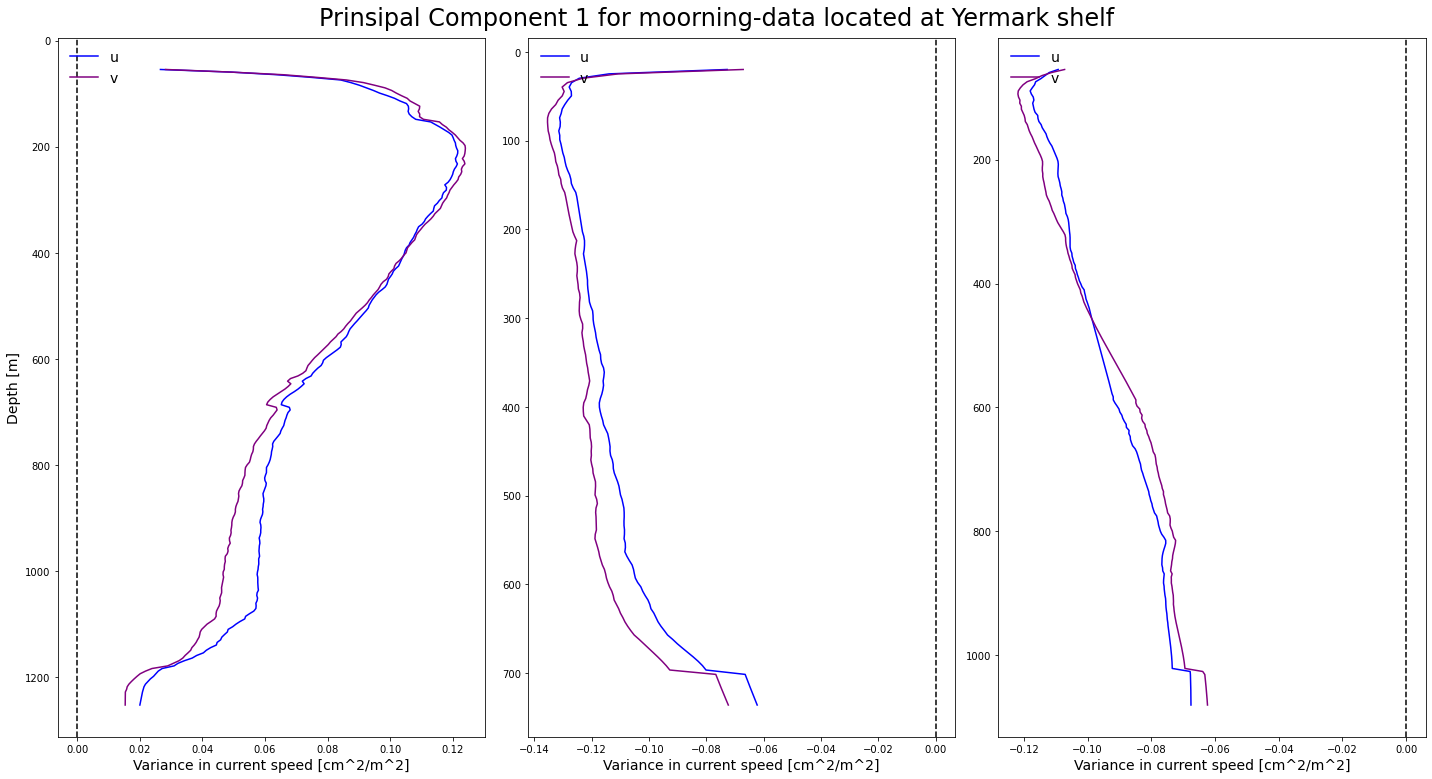

In [22]:
fig, axs = plt.subplots(1,3,figsize=(20,11))
yl = [(u1,v1),(u2,v2),(u3,v3)]
plt.suptitle('Prinsipal Component 1 for moorning-data located at Yermark shelf', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, yl):
    #for axs, p in zip(axes.flat, range(len((punkt_list)))):
    U =y[0]
    V = y[1]
    valu, vecu = PCz_yermark(U)
    valv, vecv = PCz_yermark(V)
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.DEPTH, label='u', color='b')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.DEPTH, label='v', color='purple')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Variance in current speed [cm^2/m^2]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

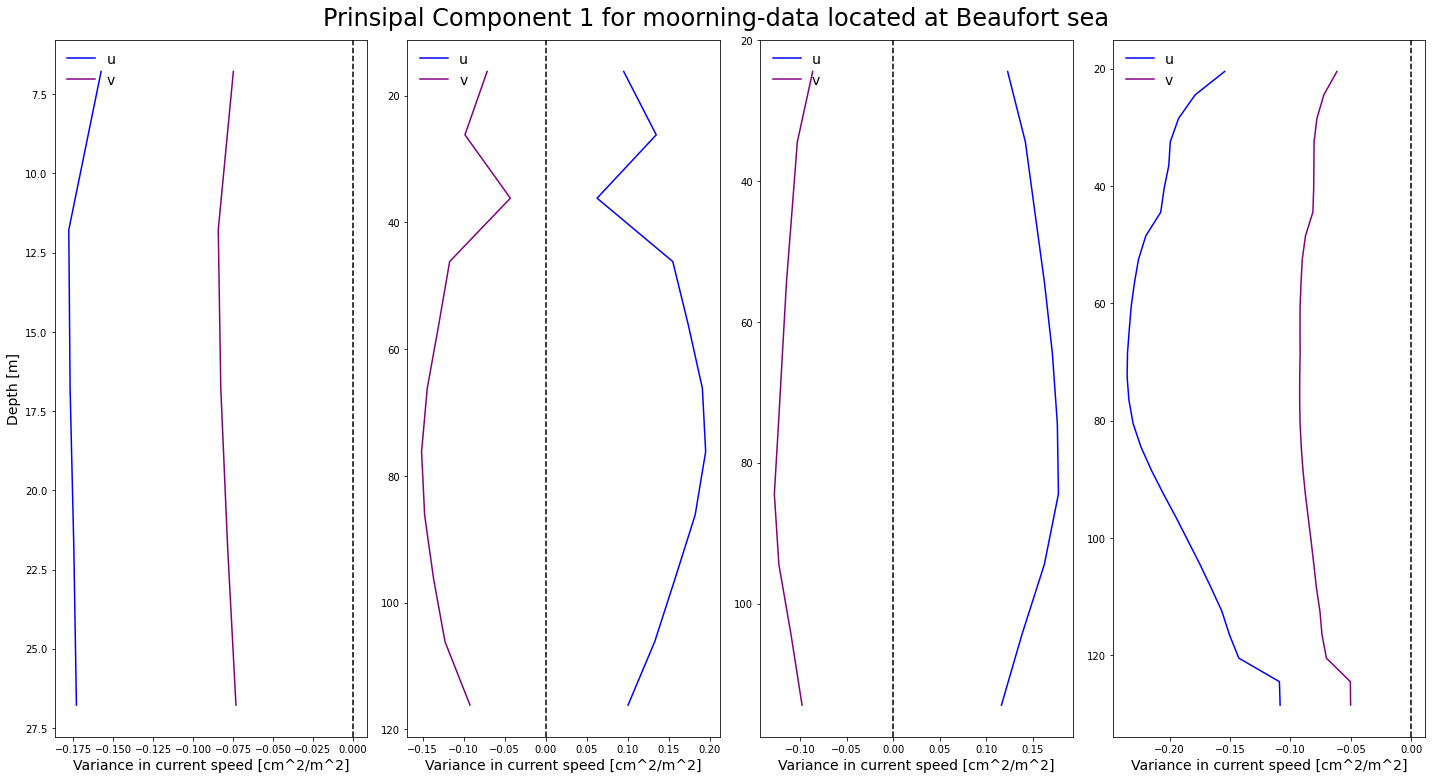

In [23]:
fig, axs = plt.subplots(1,4,figsize=(20,11))
ANO = [(u12,v12),(u14,v14),(u16,v16),(u18,v18)]
plt.suptitle('Prinsipal Component 1 for moorning-data located at Beaufort sea', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, y in zip(axs.flat, ANO):
    #for axs, p in zip(axes.flat, range(len((punkt_list)))):
    U =y[0]
    V = y[1]
    valu, vecu = PCz(U)
    valv, vecv = PCz(V)
    axs.plot(np.sqrt(valu[0])*vecu[:,0],U.BINDEPTH, label='u', color='b')
    axs.plot(np.sqrt(valv[0])*vecv[:,0],V.BINDEPTH, label='v', color='purple')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Variance in current speed [cm^2/m^2]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

# Vertical PC parallell and orthogonal

In [24]:
# glamt: horizontal scale factors for latitude at the mid point og griddcell
# gphit: horizontal scale factors --''--
zonal_ = scalar.glamt.isel(x=slice(200,1399),y=slice(650,1799)).squeeze(axis=0)
merd_ = scalar.gphit.isel(x=slice(200,1399),y=slice(650,1799)).squeeze(axis=0)

In [27]:
d_hbx = bathym.isel(y=slice(0,1149)).diff(dim='x')
d_hby = bathym.isel(x=slice(0,1199)).diff(dim='y')

d_hbxg = d_hbx.rolling(x= 10,).mean()
d_hbyg = d_hby.rolling(y= 10,).mean()

len_batg = np.sqrt((d_hbxg/zonal_)**2 + (d_hbyg/merd_)**2)

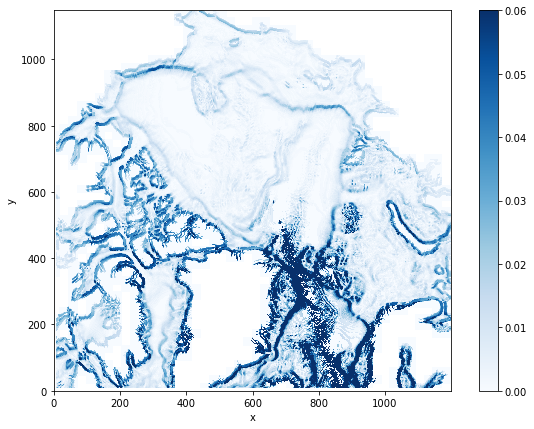

In [28]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,1,figsize=(10,7))
c = len_batg.plot(vmin=0, vmax=0.06, add_colorbar=False, cmap=plt.get_cmap('Blues'))
axs.set_aspect('equal')
fig.colorbar(c)

(915, 157)
(935, 143)
(938, 144)
(934, 141)


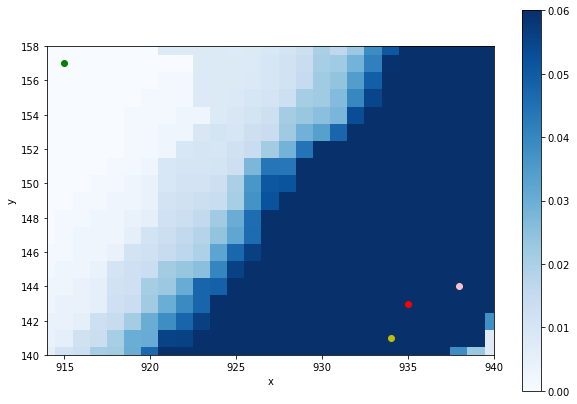

In [29]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,1,figsize=(10,7))
c = len_batg.plot(vmin=0, vmax=0.06, add_colorbar=False, cmap=plt.get_cmap('Blues'))
ml = [(915, 157),(935, 143),(938, 144),(934, 141)]
clist = ['g', 'r', 'pink', 'y']
i = 0
for m in ml:
    print(m)
    y=m[1]
    x=m[0]
    plt.plot(x, y, color=clist[i], marker='o')
    i+=1
axs.set_aspect('equal')
axs.set_xlim(914,940)
axs.set_ylim(140,158)
fig.colorbar(c)

In [180]:
for m in ml: 
    y=m[1]
    x=m[0] 
    print(len_batg.isel(x=x,y=y).values)

0.0
0.1546922583514978
0.14405098419932033
0.19824362372061569


In [30]:
'Making a function for the vertical PC'
def PCz_op(up,vp,x,y):
    
    zonalp = zonal_.isel(y=y, x=x)
    merdp = merd_.isel(y=y, x=x)

    d_hbx_p = d_hbxg.isel(y=y, x=x)
    d_hby_p = d_hbyg.isel(y=y, x=x)
    
    # lag lengde scalar av bathym og dele u_o og u_p på 

    vel_ort = ((up*(d_hbx_p/zonalp) + vp*(d_hby_p/merdp))/np.sqrt(d_hbx_p**2 + d_hby_p**2))#*np.sqrt(dz) # delt på lengden av bathymetrien
    vel_par = ((up*(d_hby_p/merdp)  - vp*(d_hbx_p/zonalp))/np.sqrt(d_hbx_p**2 + d_hby_p**2))#*np.sqrt(dz)
    
    cov_o = np.cov(vel_ort.T, bias=True) # uten .T ble den en 73x73 matrise 
    cov_p = np.cov(vel_par.T, bias=True)
    
    values_o, vectors_o = np.linalg.eig(cov_o)
    order_o = values_o.argsort()[::-1]
    values_o, vectors_o = values_o[order_o], vectors_o[:, order_o]
    values_p, vectors_p = np.linalg.eig(cov_p)
    order_p = values_p.argsort()[::-1]
    values_p, vectors_p = values_p[order_p], vectors_p[:, order_p]
    
    PCp = (np.sqrt(values_p[0])*vectors_p[:,0])#*(1/np.sqrt(dz[:int(d_p)-1]))
    PCo = (np.sqrt(values_o[0])*vectors_o[:,0])#*(1/np.sqrt(dz[:int(d_p)-1]))
    
    return PCp, PCo

In [31]:
'error searching '
yl = [(ub,vb),(uw,vw),(un,vn),(us,vs)]
#ml = [(915, 157),(935, 143),(938, 144),(934, 141)]
ml = [(923, 155),(936, 143),(938, 144),(934, 141)]
up = yl[1][0]
vp = yl[1][1]
y=ml[1][1]
x=ml[1][0]
zonalp = zonal_.isel(y=y, x=x)
merdp = merd_.isel(y=y, x=x)

d_hbx_p = d_hbxg.isel(y=y, x=x)
d_hby_p = d_hbyg.isel(y=y, x=x)

print(d_hbx_p.values)
print(d_hby_p.values)
print(zonalp.values)
print(merdp.values)
print('------------------------')

vel_ort = ((up*(d_hbx_p/zonalp) + vp*(d_hby_p/merdp))/np.sqrt(d_hbx_p**2 + d_hby_p**2))#*np.sqrt(dz) # delt på lengden av bathymetrien
vel_par = ((up*(d_hby_p/merdp)  - vp*(d_hbx_p/zonalp))/np.sqrt(d_hbx_p**2 + d_hby_p**2))

print(vel_ort.values)
print('-------------------------')
print(vel_par.values)

-2.0
-0.1
12.92947
68.55487
------------------------
[[-3.60548631e-03 -5.34198841e-03 -1.43811639e-03 ... -1.52644044e-03
  -1.57298418e-03 -1.61952792e-03]
 [-1.28178638e-03 -1.21952051e-03 -1.42511294e-03 ... -1.42218579e-03
  -1.46891317e-03 -1.51564055e-03]
 [-9.95014262e-05 -1.00244223e-04 -2.20990548e-04 ... -8.18565258e-04
  -8.53537108e-04 -8.88508959e-04]
 ...
 [-9.22049158e-03 -9.24024118e-03 -8.78265126e-03 ... -8.97842227e-03
  -9.10284357e-03 -9.22726487e-03]
 [-9.08666776e-03 -4.41562387e-03 -1.37276476e-03 ... -1.01217583e-02
  -1.02609105e-02 -1.04000628e-02]
 [-7.77800483e-03 -7.77502073e-03 -1.39222413e-02 ... -1.05484588e-02
  -1.07122761e-02 -1.08760933e-02]]
-------------------------
[[1.11596264e-02 8.70578062e-03 7.78854105e-03 ... 2.53025537e-03
  2.57277763e-03 2.61529988e-03]
 [3.49381275e-03 9.50942237e-03 7.77190305e-03 ... 1.67883642e-03
  1.70734481e-03 1.73585320e-03]
 [2.06697899e-03 2.47650526e-03 1.96986626e-05 ... 6.73097743e-04
  6.83623956e-04 6.94

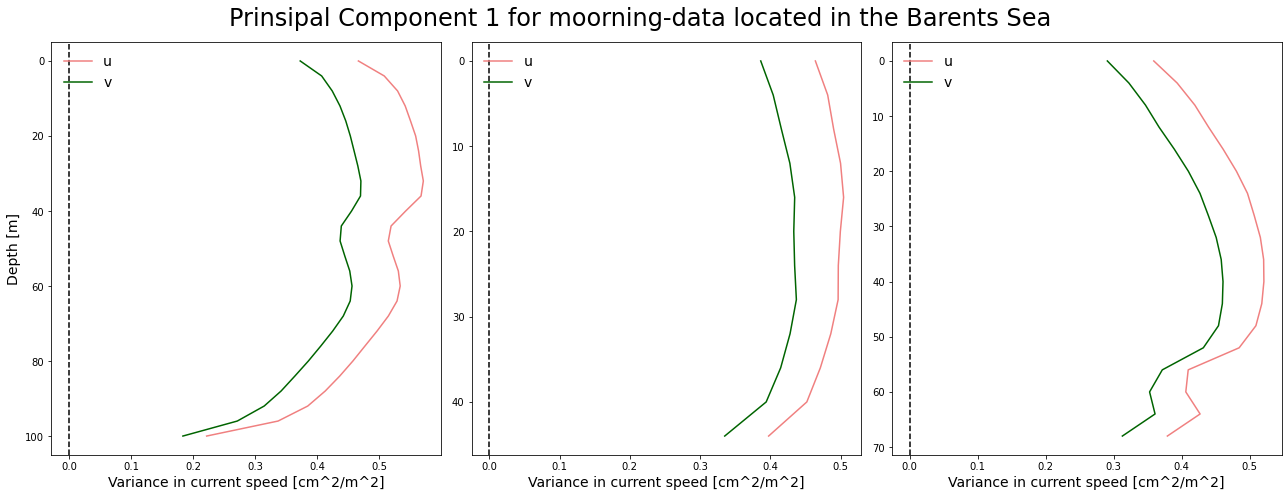

In [32]:
fig, axs = plt.subplots(1,3,figsize=(18,7))
yl = [(u13,v13),(u15,v15),(u17,v17)]
m_l = [(836, 440),(838, 440),(836, 439)]
plt.suptitle('Prinsipal Component 1 for moorning-data located in the Barents Sea ', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(len(yl))):
    y = yl[i]
    U =y[0]
    V = y[1]
    m = m_l[i]
    x = m[0]
    y = m[1]
    
    PCp, PCo = PCz_op(U,V,x,y)
    axs.plot(PCp,U.nDEPTH*4, label= 'u', color='lightcoral')
    axs.plot(PCo,V.nDEPTH*4, label= 'v', color='darkgreen')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Variance in current speed [cm^2/m^2]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

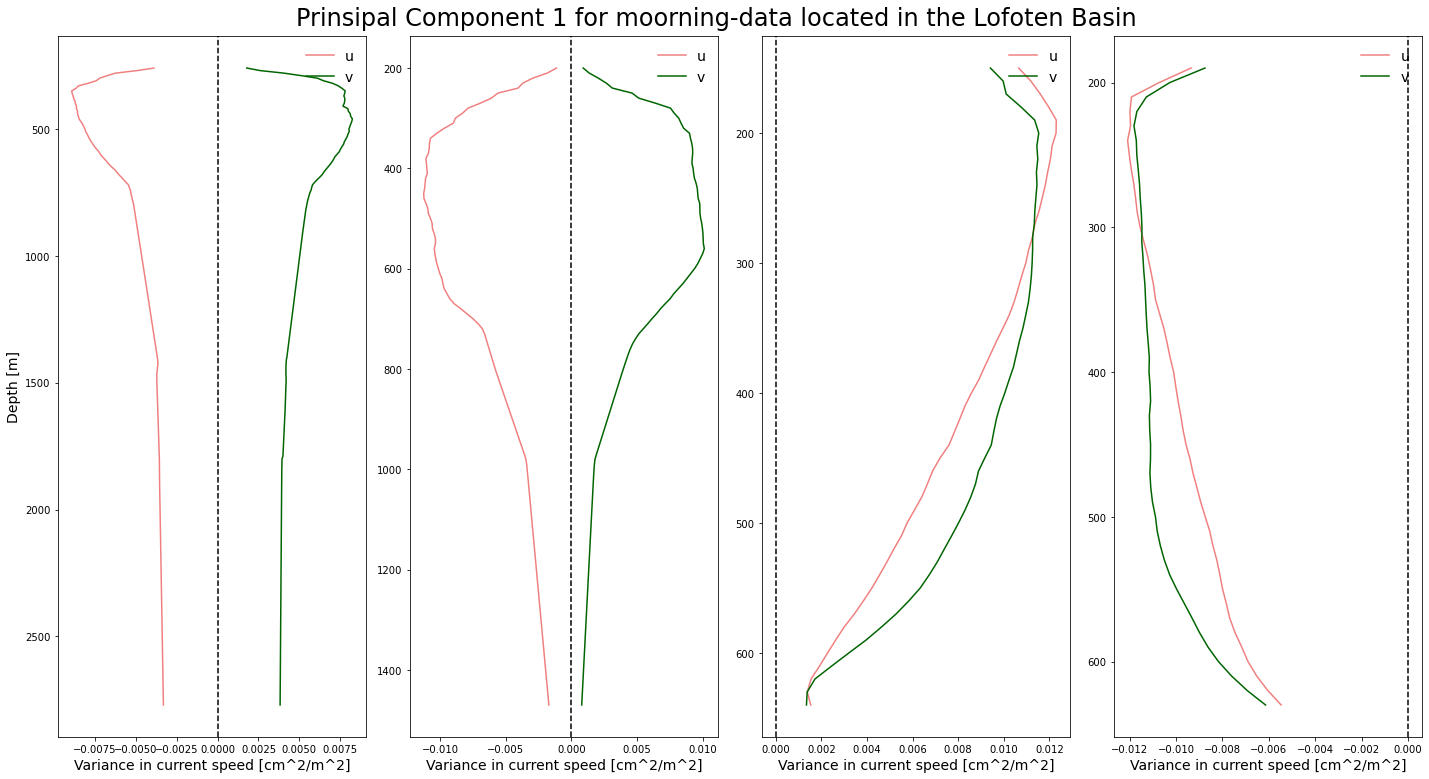

In [33]:
warnings.simplefilter("ignore")
fig, axs = plt.subplots(1,4,figsize=(20,11))
yl = [(ub,vb),(uw,vw),(un,vn),(us,vs)]
ml = [(923, 155),(935, 143),(938, 144),(934, 141)] #ml[0] er endret for å passe griddsystemet fra (915,157)
plt.suptitle('Prinsipal Component 1 for moorning-data located in the Lofoten Basin', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(len(yl))):
    y = yl[i]
    m = ml[i]
    U =y[0]
    V = y[1]
    x = m[0]
    y = m[1]
    PCp, PCo = PCz_op(U,V,x,y)
    axs.plot(PCp,U.DEPTH, label= 'u', color='lightcoral')
    axs.plot(PCo,V.DEPTH, label= 'v', color='darkgreen')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Variance in current speed [cm^2/m^2]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper right")
fig.tight_layout()

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(20,11))
yl = [(u1,v1),(u2,v2),(u3,v3)]
ml = [(774, 344),(766, 358),(773, 346)]
plt.suptitle('Prinsipal Component 1 for moorning-data located at Yermark shelf', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(len(yl))):
    y = yl[i]
    U =y[0]
    V = y[1]
    m = m_l[i]
    x = m[0]
    y = m[1]
    
    PCp, PCo = PCz_op(U,V,x,y)
    axs.plot(PCp,U.nDEPTH*4, label= 'u', color='lightcoral')
    axs.plot(PCo,V.nDEPTH*4, label= 'v', color='darkgreen')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis()
    axs.set_xlabel('Variance in current speed [cm^2/m^2]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(20,11))
ANO = [(u12,v12),(u14,v14),(u16,v16),(u18,v18)]
ml = [(334, 978),(334, 978),(334, 978),(334, 978)]
plt.suptitle('Prinsipal Component 1 for moorning-data located at Beaufort sea', 
             horizontalalignment='center',
            fontsize=24)

axs[0].set_ylabel('Depth [m]', fontsize=14)

for axs, i in zip(axs.flat, range(len(ANO))):
    y = ANO[i]
    U =y[0]
    V = y[1]
    m = ml[i]
    x = m[0]
    y = m[1]
    PCp, PCo = PCz_op(U,V,x,y)
    axs.plot(PCp,U.BINDEPTH, label='u', color='lightcoral')
    axs.plot(PCo,V.BINDEPTH, label='v', color='darkgreen')
    axs.axvline(0, color='k', linestyle = '--')
    axs.invert_yaxis() 
    axs.set_xlabel('Variance in current speed [cm^2/m^2]', fontsize=14)
    axs.legend(frameon=False, fontsize=14, loc="upper left") 
fig.tight_layout()